In [1]:
# ignoring some warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv('Patients_Dataset.csv')
df.head()

id           name  gender   age  weight_kg  height_cm  \
0  62632   Samual Sipes    male  29.0      168.0      186.0   
1  63150      Beau Dach    male  19.0       90.0      200.0   
2  71366  Youlanda Metz  female  20.0       75.0      174.0   
3  63734  Deandre Walsh    male  43.0      102.0      181.0   
4  65619  Rhett Douglas    male  20.0       91.0      170.0   

                 education        marital  income insurance  ... insulin  \
0              preparatory  never married     5.0        no  ...  106.48   
1                      NaN            NaN    15.0       yes  ...     NaN   
2    college or equivalent  never married     3.0       yes  ...     NaN   
3    college or equivalent       divorced     2.0        no  ...     NaN   
4  secondary or equivalent  never married     8.0        no  ...     NaN   

    iron  u_acid  s_cotinine    cpk    ldh     fvc    fev1 fev1_fvc_ratio  \
0   63.0     7.2     159.000  251.0  170.0  5426.0  4434.0       0.817177   
1   83.0     7.3      14.700   99.0  102.0  7175.0  5786.0       0.806411   
2  118.0     4.1       0.011  211.0  142.0  5120.0  4570.0       0.892578   
3   55.0     4.7       0.766  312.0  109.0     NaN     NaN            NaN   
4   62.0     5.7       0.376  163.0  123.0  3870.0  3297.0       0.851938   

  memory  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

[5 rows x 66 columns]

In [4]:
df.drop(['name'], axis=True, inplace=True)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'weight_kg', 'height_cm', 'education', 'marital',
       'income', 'insurance', 'gen_health', 'smoker', 'days_active', 'bmi',
       'waist_cm', 'drinks_day', 'asthma', 'chf', 'cad', 'mi', 'cva', 'copd',
       'cancer', 'hypertension', 'diabetes', 'pulse', 'sys_bp', 'dia_bp',
       'medicines', 'wbc', 'hgb', 'hct', 'platelets', 'alt', 'ast', 'alk_phos',
       'bun', 'cr', 'sodium', 'potassium', 'chloride', 'bicarb', 'ca', 'phos',
       't_bilirubin', 'alb', 't_protein', 'glob', 'glucose', 'glucose.1',
       'alb_cr_ratio', 'trigs', 't_chol', 'hdl', 'ldl_chol', 'a1c', 'insulin',
       'iron', 'u_acid', 's_cotinine', 'cpk', 'ldh', 'fvc', 'fev1',
       'fev1_fvc_ratio', 'memory'],
      dtype='object')

In [6]:
# expelling unwanted features
cols = ['id', 'asthma', 'chf', 'cad', 'mi', 'cva', 'copd',
       'cancer', 'hypertension', 'diabetes', 'pulse', 'sys_bp', 'dia_bp']
df = df[cols]

In [7]:
df.head()

id asthma  chf  cad   mi  cva copd cancer hypertension diabetes  pulse  \
0  62632     no   no   no   no   no   no     no          NaN       no    NaN   
1  63150    yes  NaN  NaN  NaN  NaN  NaN    NaN           no       no    NaN   
2  71366     no   no   no   no   no   no     no           no       no    NaN   
3  63734     no   no  yes  yes   no   no     no          yes      yes    NaN   
4  65619     no   no   no   no  yes   no     no           no       no    NaN   

   sys_bp  dia_bp  
0   110.0    80.0  
1   106.0    68.0  
2   112.0    54.0  
3   130.0    66.0  
4   104.0    64.0

In [8]:
df.shape

(7821, 13)

# Data wrangling

## 1- replacing null cells in categorical features with unknown:

In [9]:
#asthma
df['asthma'][df.asthma.isna()] = 'unknown'

#chf
df['chf'][df.chf.isna()] = 'unknown'

#cad
df['cad'][df.cad.isna()] = 'unknown'

#mi
df['mi'][df.mi.isna()] = 'unknown'

#cva
df['cva'][df.cva.isna()] = 'unknown'

#copd
df['copd'][df.copd.isna()] = 'unknown'

#cancer
df['cancer'][df.cancer.isna()] = 'unknown'

#  hypertension
df['hypertension'][df.hypertension.isna()] = 'unknown'

#diabetes
df['diabetes'][df.diabetes.isna()] = 'unknown'


In [10]:
df.head()

id asthma      chf      cad       mi      cva     copd   cancer  \
0  62632     no       no       no       no       no       no       no   
1  63150    yes  unknown  unknown  unknown  unknown  unknown  unknown   
2  71366     no       no       no       no       no       no       no   
3  63734     no       no      yes      yes       no       no       no   
4  65619     no       no       no       no      yes       no       no   

  hypertension diabetes  pulse  sys_bp  dia_bp  
0      unknown       no    NaN   110.0    80.0  
1           no       no    NaN   106.0    68.0  
2           no       no    NaN   112.0    54.0  
3          yes      yes    NaN   130.0    66.0  
4           no       no    NaN   104.0    64.0

## 2- Changing categorical ordinal data to type categoricalDtype:

In [11]:
#asthma
Asthma_levels = ['yes', 'no', 'unknown']
asthma_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Asthma_levels)
df.asthma = df.asthma.astype(asthma_levels)

#chf
Chf_levels = ['yes', 'no', 'unknown']
chf_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Chf_levels)
df.chf = df.chf.astype(chf_levels)

#cad
Cad_levels = ['yes', 'no', 'unknown']
cad_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cad_levels)
df.cad = df.cad.astype(cad_levels)

#mi
Mi_levels = ['yes', 'no', 'unknown']
mi_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Mi_levels)
df.mi = df.mi.astype(mi_levels)

#cva
Cva_levels = ['yes', 'no', 'unknown']
cva_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cva_levels)
df.cva = df.cva.astype(cva_levels)

#copd
Copd_levels = ['yes', 'no', 'unknown']
copd_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Copd_levels)
df.copd = df.copd.astype(copd_levels)

#cancer
Cancer_levels = ['yes', 'no', 'unknown']
cancer_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cancer_levels)
df.cancer = df.cancer.astype(cancer_levels)

#hypertension
Hypertension_levels = ['yes', 'no', 'hypotension', 'unknown']
hypertension_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Hypertension_levels)
df.hypertension = df.hypertension.astype(hypertension_levels)

#diabetes
Diabetes_levels = ['yes', 'borderline', 'no', 'unknown']
diabetes_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Diabetes_levels)
df.diabetes = df.diabetes.astype(diabetes_levels)

## 3- Clearing all wrong entries in the numerical features of the data

### - heart rate and blood pressures

In [12]:
# nulling heart rate (pulse) cells with values more 140 or less than 30
df['pulse'][df.pulse > 140] = np.nan
df['pulse'][df.pulse < 30] = np.nan

# nulling blood pressure(sys_bp) cells with values more 250 or less than 65
df['sys_bp'][df.sys_bp > 250] = np.nan
df['sys_bp'][df.sys_bp < 65] = np.nan

# nulling blood pressure(dia_bp) cells with values more 150 or less than 40
df['dia_bp'][df.dia_bp > 150] = np.nan
df['dia_bp'][df.dia_bp < 40] = np.nan


# hypertension and pressure values
# First, we depend on the correct pressure values
df['hypertension'][(df.sys_bp >= 120) &(df.dia_bp >=80)] = 'yes'
df['hypertension'][(df.sys_bp < 120) & (df.sys_bp >= 90) &(df.dia_bp < 80) &(df.dia_bp >=60)] = 'no'
df['hypertension'][(df.sys_bp < 90) &(df.dia_bp < 60)] = 'hypotension'


right_hyper_ids = df['id'][((df.sys_bp >= 120) &(df.dia_bp >=80)) | 
                           ((df.sys_bp < 90) &(df.dia_bp < 60)) | 
                           ((df.sys_bp < 120) & (df.sys_bp >= 90) &(df.dia_bp < 80) &(df.dia_bp >=60))]

df['sys_bp'][~(df.id.isin(right_hyper_ids))] = np.nan
df['dia_bp'][~(df.id.isin(right_hyper_ids))] = np.nan

In [14]:
df.head()

id asthma      chf      cad       mi      cva     copd   cancer  \
0  62632     no       no       no       no       no       no       no   
1  63150    yes  unknown  unknown  unknown  unknown  unknown  unknown   
2  71366     no       no       no       no       no       no       no   
3  63734     no       no      yes      yes       no       no       no   
4  65619     no       no       no       no      yes       no       no   

  hypertension diabetes  pulse  sys_bp  dia_bp  
0      unknown       no    NaN     NaN     NaN  
1           no       no    NaN   106.0    68.0  
2           no       no    NaN     NaN     NaN  
3          yes      yes    NaN     NaN     NaN  
4           no       no    NaN   104.0    64.0

# 
# Diseases Analytics

## 1- Single variat analytics 

### asthma

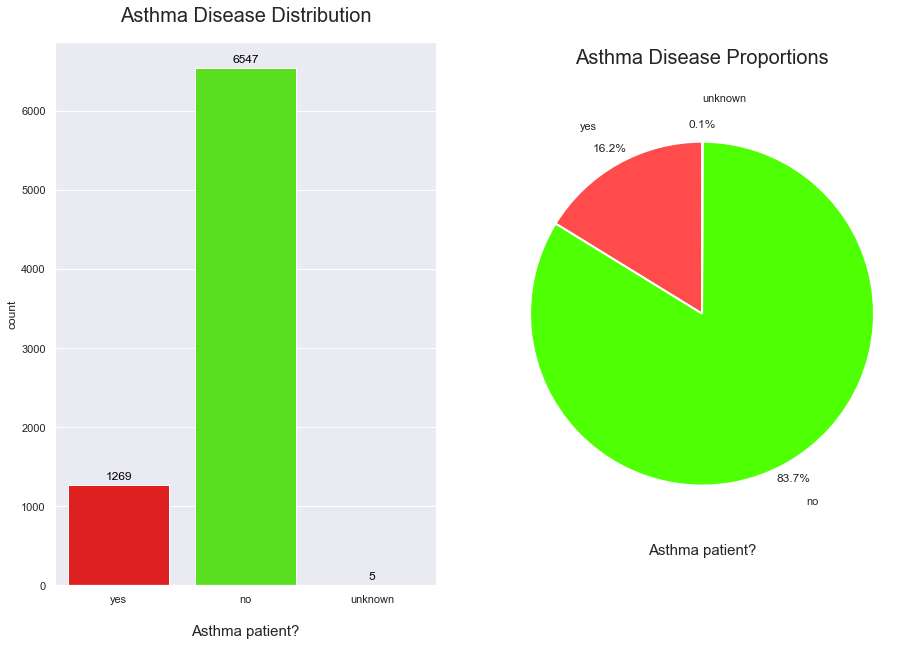

In [15]:
plt.figure(figsize=[15,10])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='asthma', palette = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']);
_counts = df.asthma.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black')

plt.title('Asthma Disease Distribution', fontsize= 20, pad=20)
plt.xlabel('Asthma patient?', fontsize= 15, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7

plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')
plt.xlabel('Asthma patient?', fontsize= 15, labelpad=40)
plt.title('Asthma Disease Proportions', fontsize= 20, pad=60);

### chf Congestive heart failure

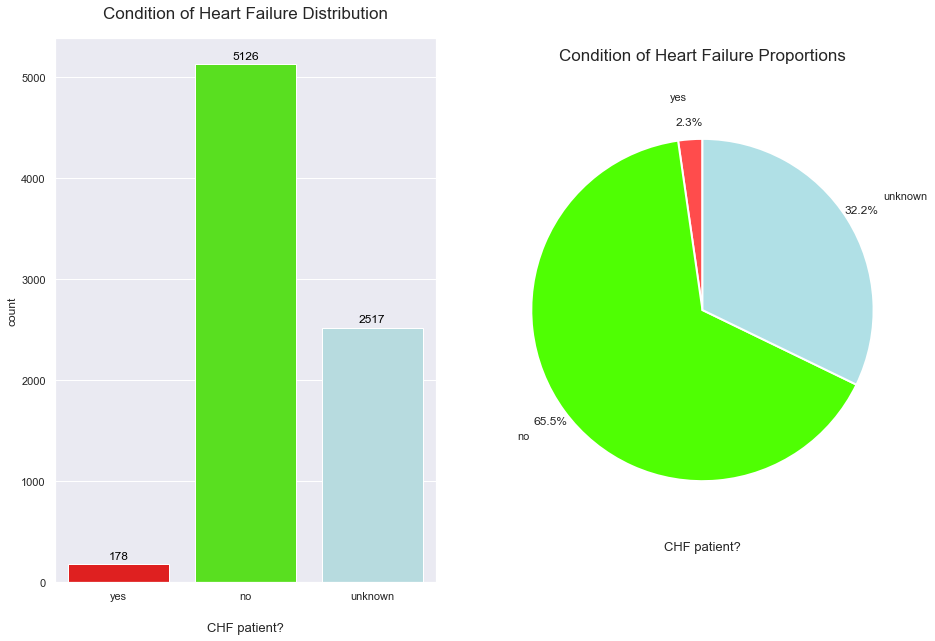

In [16]:
plt.figure(figsize=[15,10])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='chf', palette = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']);
_counts = df.chf.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Condition of Heart Failure Distribution', fontsize= 17, pad=20)
plt.xlabel('CHF patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7

plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')
plt.xlabel('CHF patient?', fontsize= 13, labelpad=40)
plt.title('Condition of Heart Failure Proportions', fontsize= 17, pad=60);

### cad Coronary artery disease

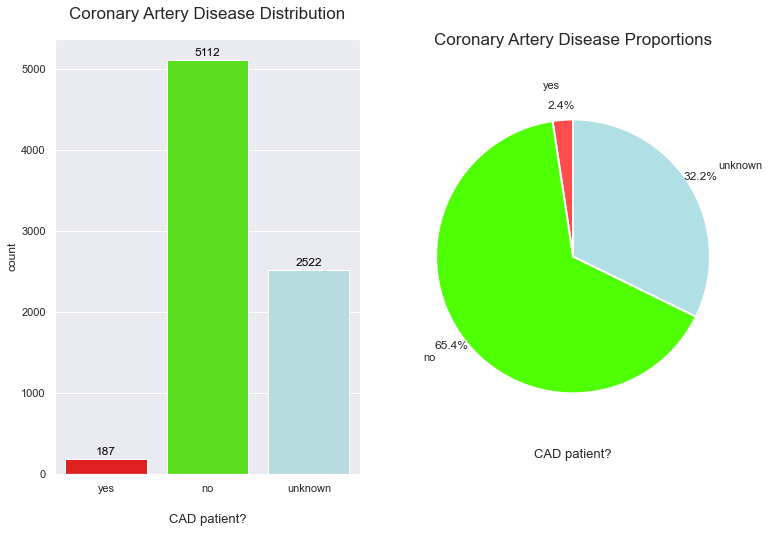

In [17]:
plt.figure(figsize=[12,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='cad', palette = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']);
_counts = df.cad.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Coronary Artery Disease Distribution', fontsize= 17, pad=20)
plt.xlabel('CAD patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7

plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')

plt.title('Coronary Artery Disease Proportions', fontsize= 17, pad=60)
plt.xlabel('CAD patient?', fontsize= 13, labelpad=40);

### mi Myocardial infarction

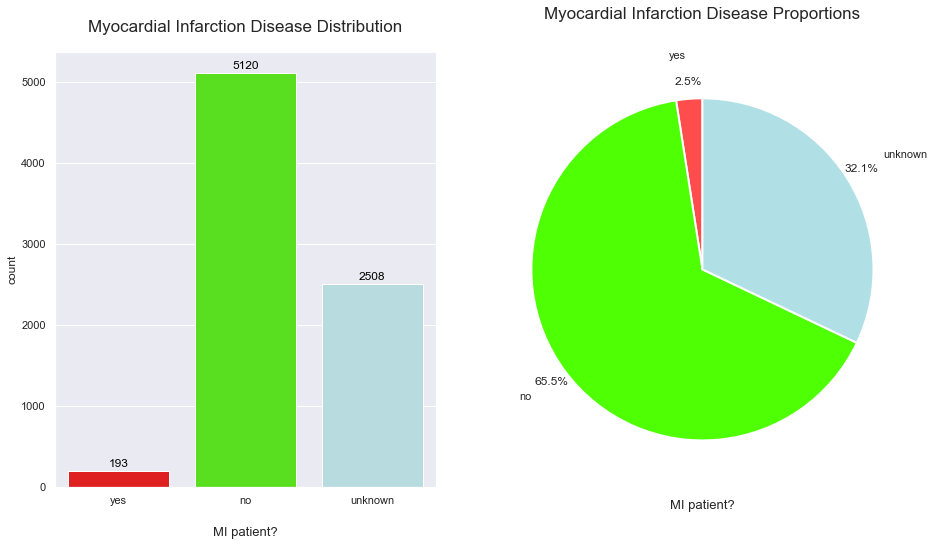

In [18]:
plt.figure(figsize=[15,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='mi', palette = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']);
_counts = df.mi.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Myocardial Infarction Disease Distribution', fontsize= 17, pad=20)
plt.xlabel('MI patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7
    
plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')

plt.title('Myocardial Infarction Disease Proportions', fontsize= 17, pad=60)
plt.xlabel('MI patient?', fontsize= 13, labelpad=40);

### cva Cerebrovascular Accident (Stroke)

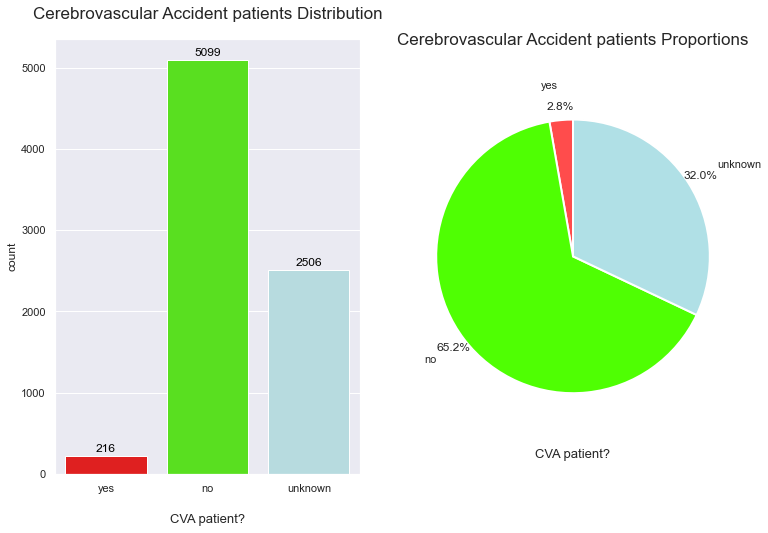

In [19]:
plt.figure(figsize=[12,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='cva', palette = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']);
_counts = df.cva.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Cerebrovascular Accident patients Distribution', fontsize= 17, pad=20)
plt.xlabel('CVA patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7
    
plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')

plt.title('Cerebrovascular Accident patients Proportions', fontsize= 17, pad=60)
plt.xlabel('CVA patient?', fontsize= 13, labelpad=40);

### copd Chronic obstructive pulmonary disease

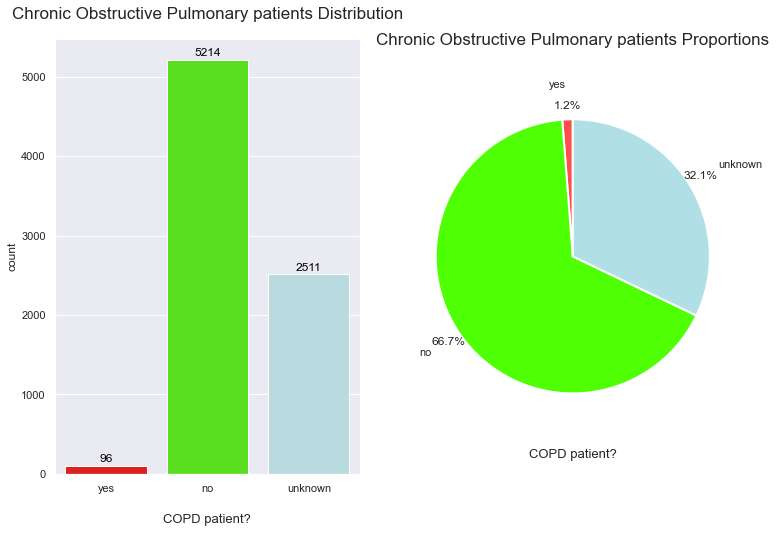

In [20]:
plt.figure(figsize=[12,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='copd', palette = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']);
_counts = df.copd.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Chronic Obstructive Pulmonary patients Distribution', fontsize= 17, pad=20)
plt.xlabel('COPD patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7
    
plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')

plt.title('Chronic Obstructive Pulmonary patients Proportions', fontsize= 17, pad=60)
plt.xlabel('COPD patient?', fontsize= 13, labelpad=40);

### cancer

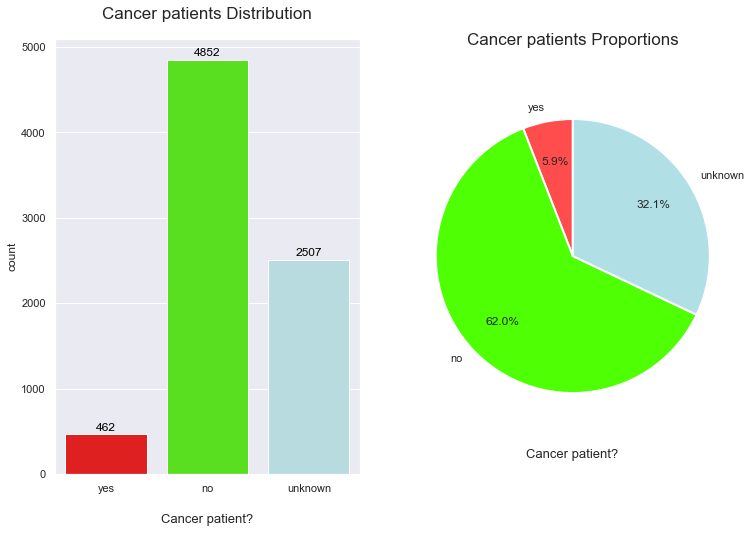

In [21]:
plt.figure(figsize=[12,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='cancer', palette = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']);
_counts = df.cancer.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Cancer patients Distribution', fontsize= 17, pad=20)
plt.xlabel('Cancer patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7
    
plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')

plt.title('Cancer patients Proportions', fontsize= 17, pad=60)
plt.xlabel('Cancer patient?', fontsize= 13, labelpad=40);

### hypertension

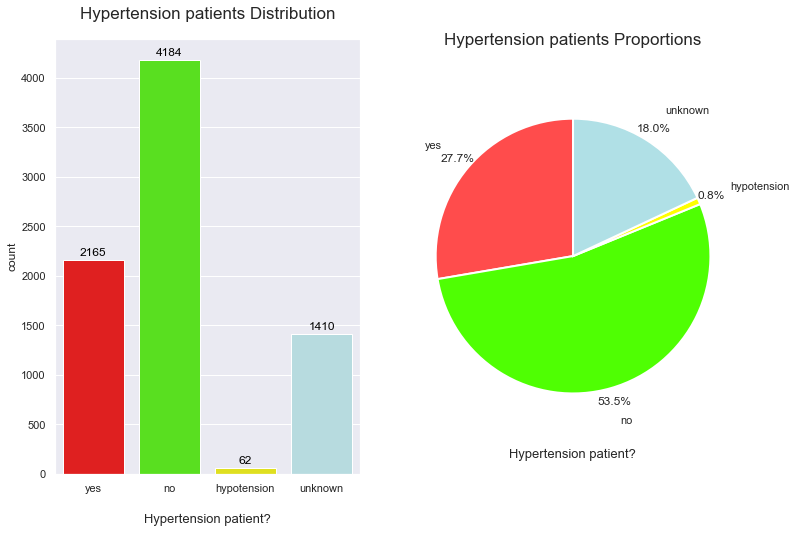

In [22]:
plt.figure(figsize=[12,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='hypertension', palette = [(1,0,0,.7), (.3,1,0,.99), 'yellow', 'powderblue']);
_counts = df.hypertension.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Hypertension patients Distribution', fontsize= 17, pad=20)
plt.xlabel('Hypertension patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), (.3,1,0,.99), 'yellow', 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7
    
plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')

plt.title('Hypertension patients Proportions', fontsize= 17, pad=60)
plt.xlabel('Hypertension patient?', fontsize= 13, labelpad=40);

### diabetes

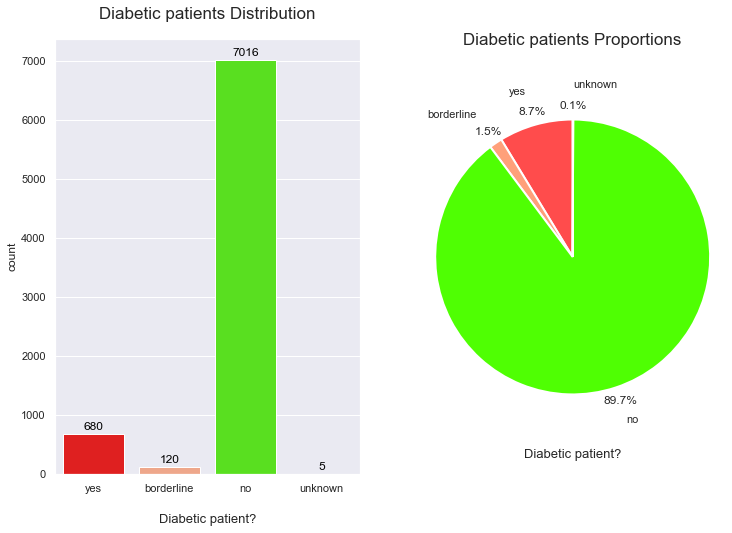

In [23]:
plt.figure(figsize=[12,8])
sb.set_theme(style="darkgrid")

#_______________________________first plot____________________________________
plt.subplot(1,2,1)

sb.countplot(data=df, x='diabetes', palette = [(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'powderblue']);#(1,0,0,.7), (.3,1,0,.99), 'powderblue'
_counts = df.diabetes.value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = _counts[label.get_text()]
    count_string = '{}'.format(count)

    # print the annotation just above the top of the bar
    plt.text(loc, count+(_counts[0]/100), count_string, ha = 'center', color = 'black') #, palette=()

plt.title('Diabetic patients Distribution', fontsize= 17, pad=20)
plt.xlabel('Diabetic patient?', fontsize= 13, labelpad=20)

#__________________________________second plot________________________________________
plt.subplot(1,2,2)

colors = [(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'powderblue']
_counts = _counts.sort_index()

if (round(_counts.values.min()*100 / df.shape[0], 1) < 5):
    labels_dis = 1.25
    prc_dis = 1.1
else:
    labels_dis = 1.1
    prc_dis = .7
    
plt.pie(x=_counts, labels=_counts.index, startangle=90, counterclock=True, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p), 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },  pctdistance=prc_dis, labeldistance=labels_dis)#, textprops={'color':'white'}

plt.axis('square')

plt.title('Diabetic patients Proportions', fontsize= 17, pad=60)
plt.xlabel('Diabetic patient?', fontsize= 13, labelpad=40);

### pulse

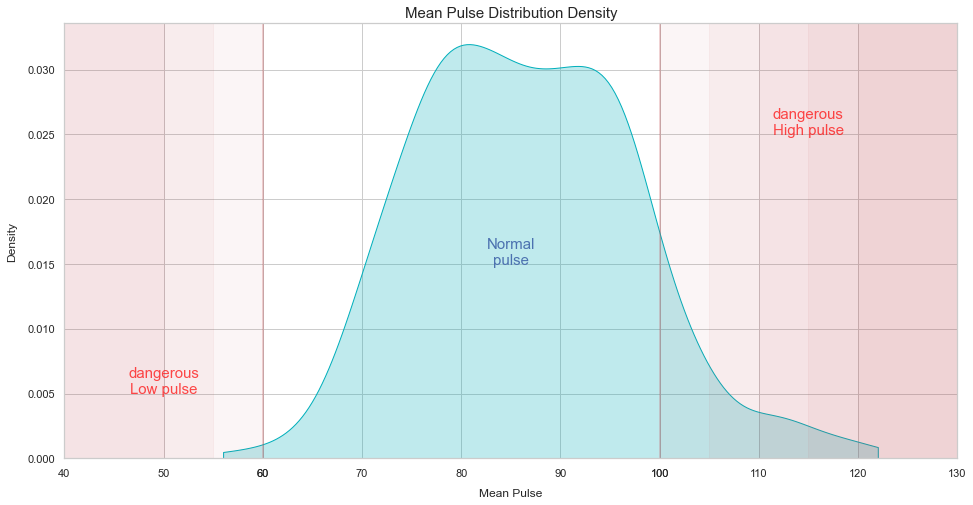

In [24]:
plt.figure(figsize=[16,8])
sb.set_theme(style='whitegrid')

#-------------------------------board--------------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
sb.kdeplot(data=df, x='pulse', cut=0, fill= True, color="#00AFBB");
plt.title('Mean Pulse Distribution Density', fontsize= 15)
plt.ylabel('Density', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.25)



plt.text(115, .025, 'dangerous\nHigh pulse', ha = 'center', color = 'red', fontsize=15, alpha=.7)
plt.text(85, .015, 'Normal\npulse', ha = 'center', color = 'b', fontsize=15, alpha=1)
plt.text(50, .005, 'dangerous\nLow pulse', ha = 'center', color = 'red', fontsize=15, alpha=.7)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);

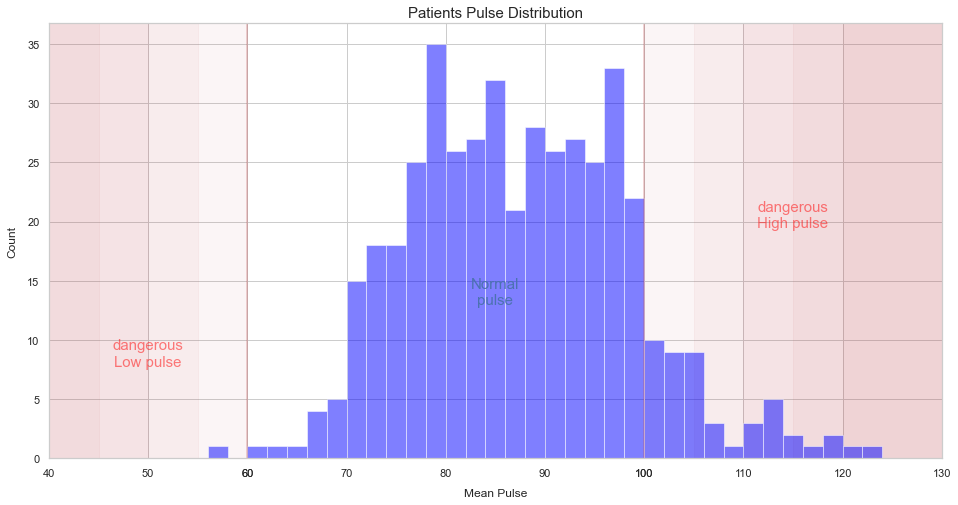

In [25]:
plt.figure(figsize=[16,8])
sb.set_theme(style='whitegrid')

# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df, x='pulse', bins= bins, color="blue", alpha=.5);
plt.title('Patients Pulse Distribution', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.25)



plt.text(115, df.shape[0]/400, 'dangerous\nHigh pulse', ha = 'center', color = 'red', fontsize=15, alpha=.5)
plt.text(85, df.shape[0]/600, 'Normal\npulse', ha = 'center', color = 'b', fontsize=15, alpha=.99)
plt.text(50, df.shape[0]/1000, 'dangerous\nLow pulse', ha = 'center', color = 'red', fontsize=15, alpha=.5)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);

### systolic blood pressure

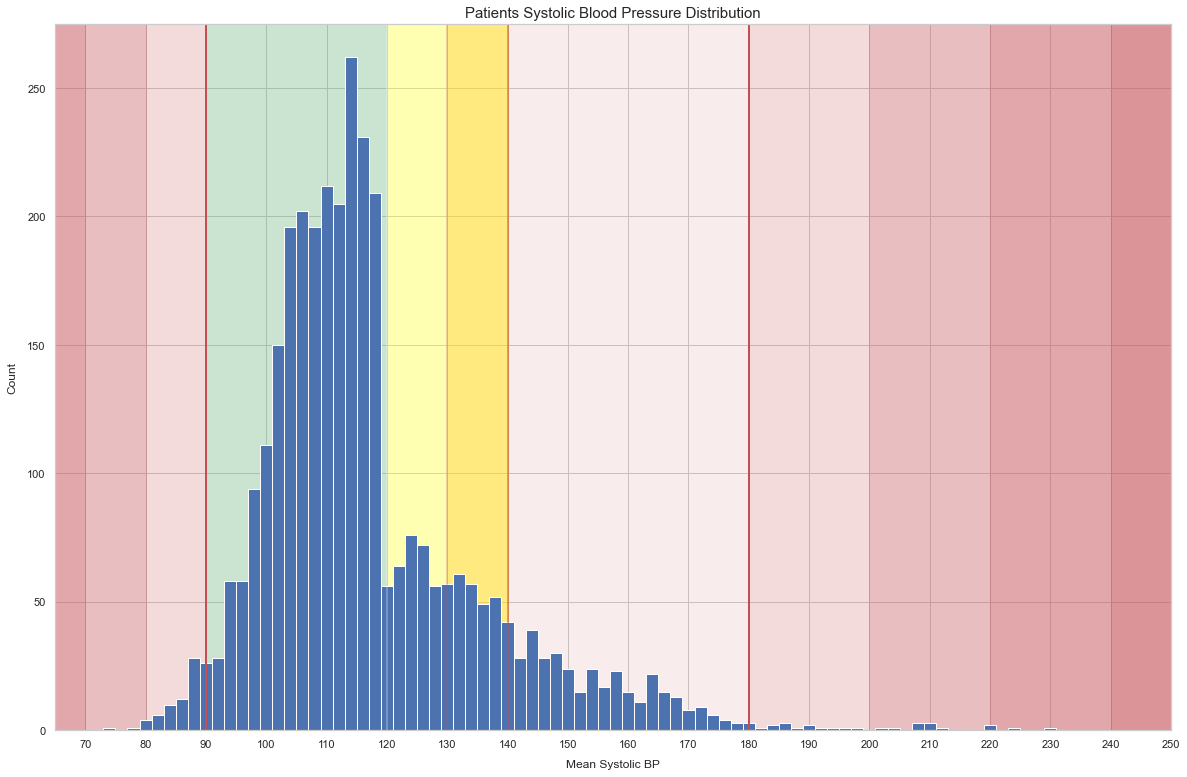

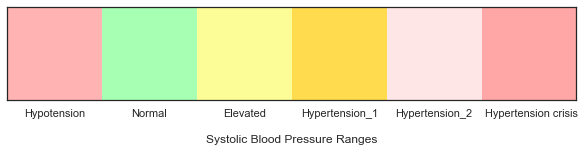

In [26]:
plt.figure(figsize=[20,13])
sb.set_theme(style='whitegrid')


#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.2)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.2)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.1)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------

bins = np.arange(65, 252, 2)

plt.hist(data=df, x='sys_bp', bins= bins, color="b", alpha=1);
plt.title('Patients Systolic Blood Pressure Distribution', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Systolic BP', labelpad=10);

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(65, 250);

sb.set_theme(style='white')
my_palette = [(1,0,0,.3), (0.3,1,.4,.5), (.99,.99,.10,.45), (1,.8,0,.7), (1,0,0,.1), (1,0,0,.35)]
sb.palplot(my_palette, size=1.7)
plt.xlabel('\nSystolic Blood Pressure Ranges')
plt.xticks([0,1,2,3,4,5], ['Hypotension', 'Normal', 'Elevated', 'Hypertension_1', 'Hypertension_2', '  Hypertension crisis']);

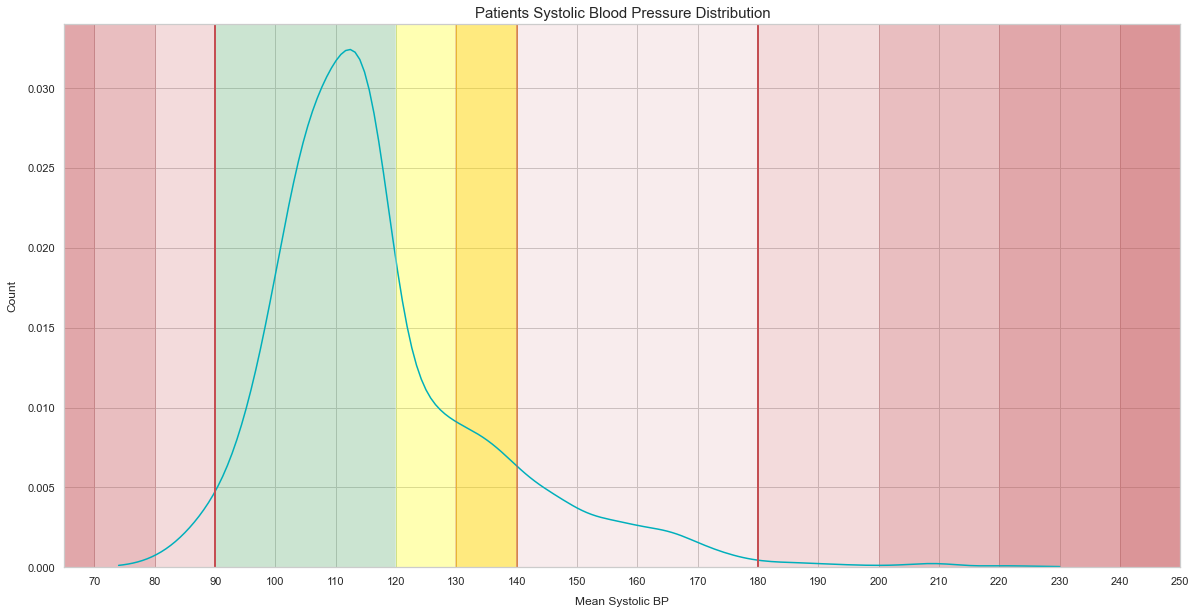

In [27]:
plt.figure(figsize=[20,10])
sb.set_theme(style='whitegrid')


#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.2)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.2)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.1)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------



sb.kdeplot(data=df, x='sys_bp', cut=0, fill= False, color="#00AFBB");
plt.title('Patients Systolic Blood Pressure Distribution', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Systolic BP', labelpad=10);

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(65, 250);

### diastolic blood pressure

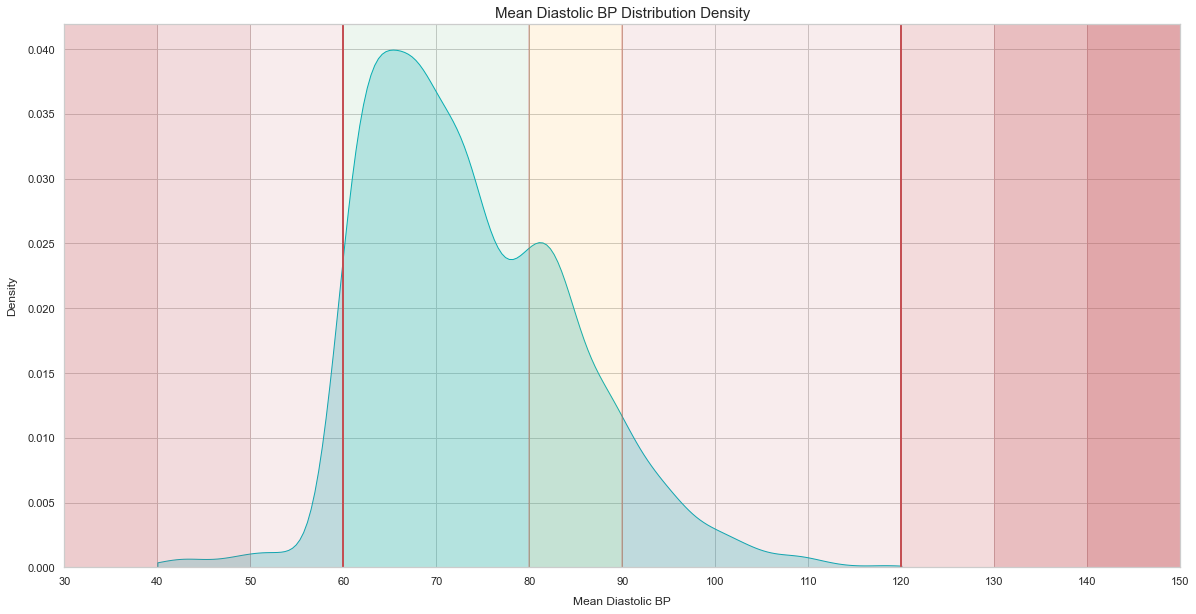

In [28]:
plt.figure(figsize=[20,10])

#_______________________________first plot____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.2)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.1)

sb.kdeplot(data=df, x='dia_bp', cut=0, fill= True, color="#00AFBB");
plt.title('Mean Diastolic BP Distribution Density', fontsize= 15)
plt.ylabel('Density', labelpad=10)
plt.xlabel('Mean Diastolic BP', labelpad=10);

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.99)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=.99)

ticks = np.arange(30, 160, 10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(30, 150);

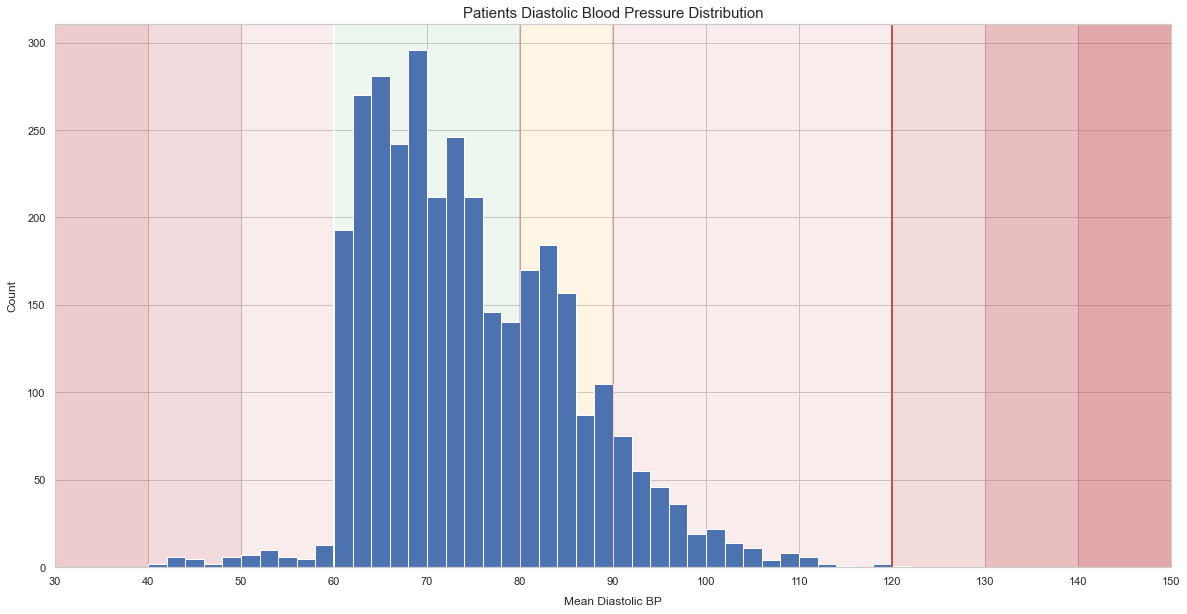

In [29]:
plt.figure(figsize=[20,10])
sb.set_theme(style='whitegrid')

#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.2)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.1)
#----------------------------------------------------------------------

bins = np.arange(30, 152, 2)

plt.hist(data=df, x='dia_bp', bins= bins, color="b", alpha=1);
plt.title('Patients Diastolic Blood Pressure Distribution', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Diastolic BP', labelpad=10);

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='w', alpha=.99)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(30, 150);

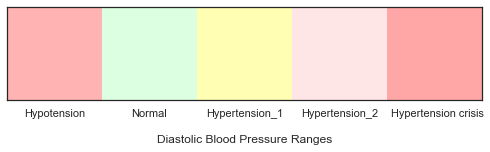

In [30]:
sb.set_theme(style='white')
my_palette = [(1,0,0,.3), (0.3,1,.4,.2), (1,.99,0,.3), (1,0,0,.1), (1,0,0,.35)]
sb.palplot(my_palette, size=1.7)
plt.xlabel('\nDiastolic Blood Pressure Ranges')
plt.xticks([0,1,2,3,4], ['Hypotension', 'Normal', 'Hypertension_1', 'Hypertension_2', '  Hypertension crisis']);

## 2- Bivariate visuals (Diseases)

### asthma

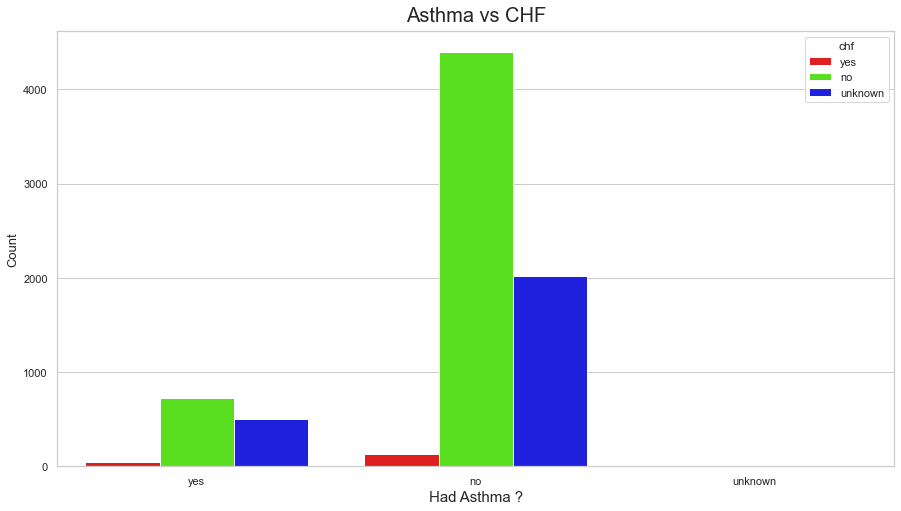

In [31]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='chf', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('Asthma vs CHF', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

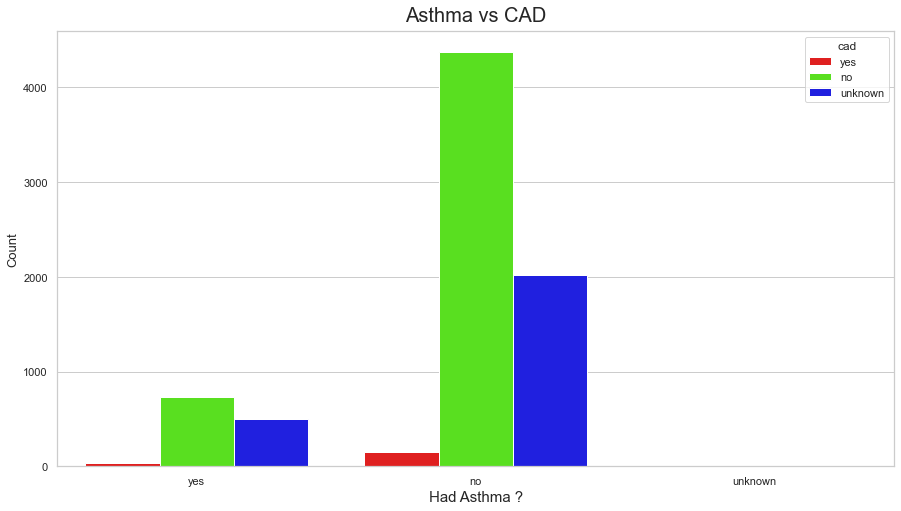

In [32]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='cad', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('Asthma vs CAD', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

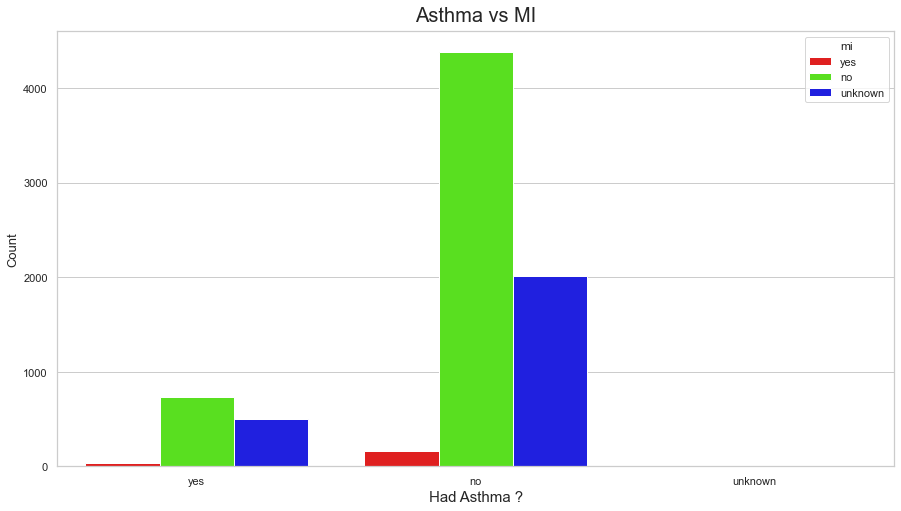

In [33]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='mi', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('Asthma vs MI', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

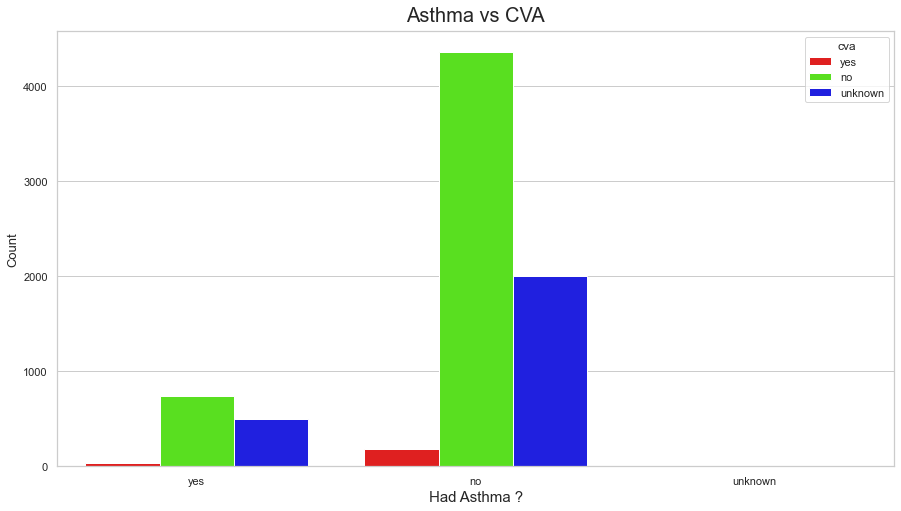

In [34]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='cva', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('Asthma vs CVA', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

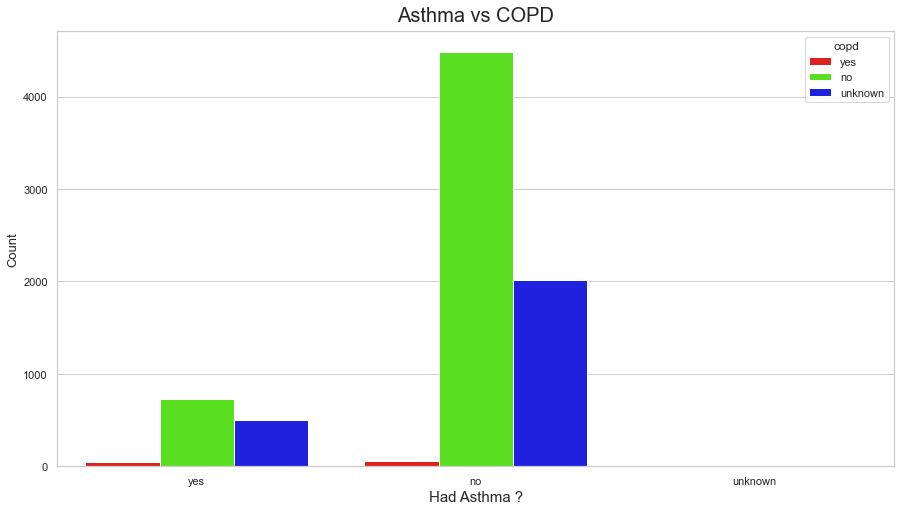

In [35]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='copd', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('Asthma vs COPD', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

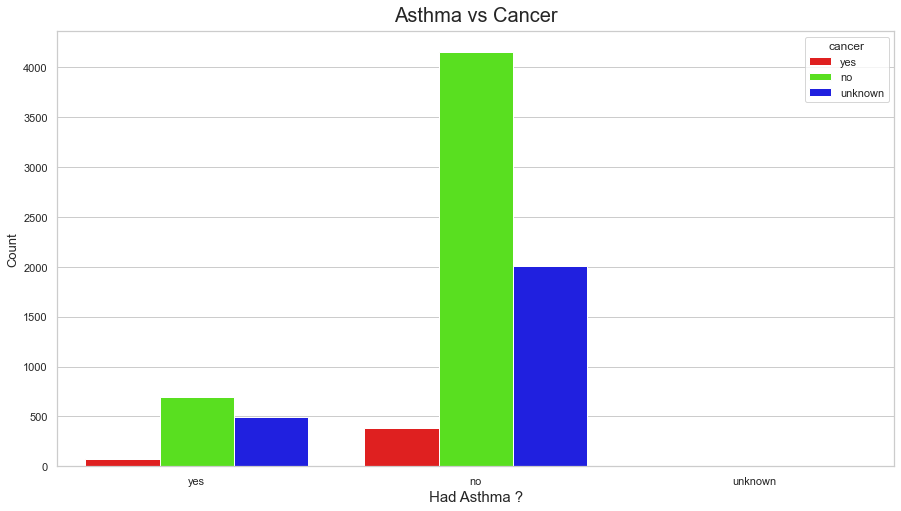

In [36]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='cancer', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('Asthma vs Cancer', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

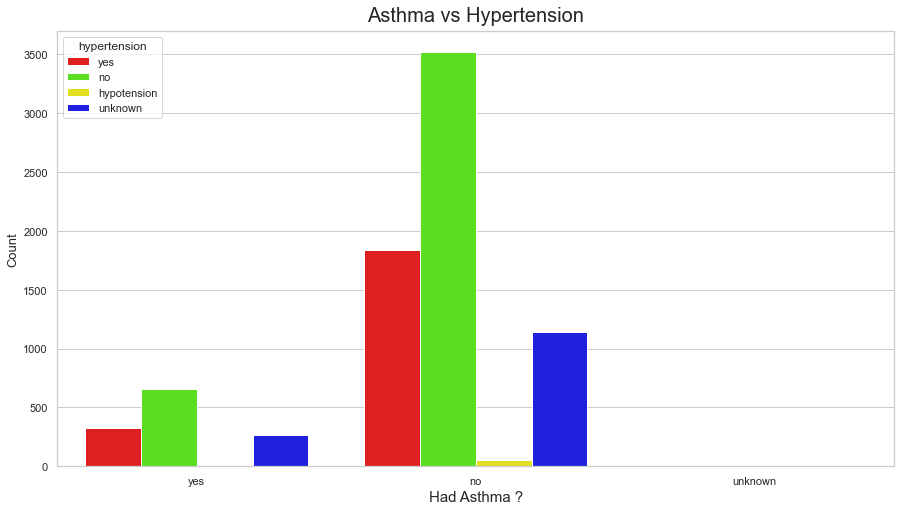

In [37]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='hypertension', palette=[(1,0,0,.7), (.3,1,0,.99), 'yellow', 'blue']);

plt.title('Asthma vs Hypertension', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

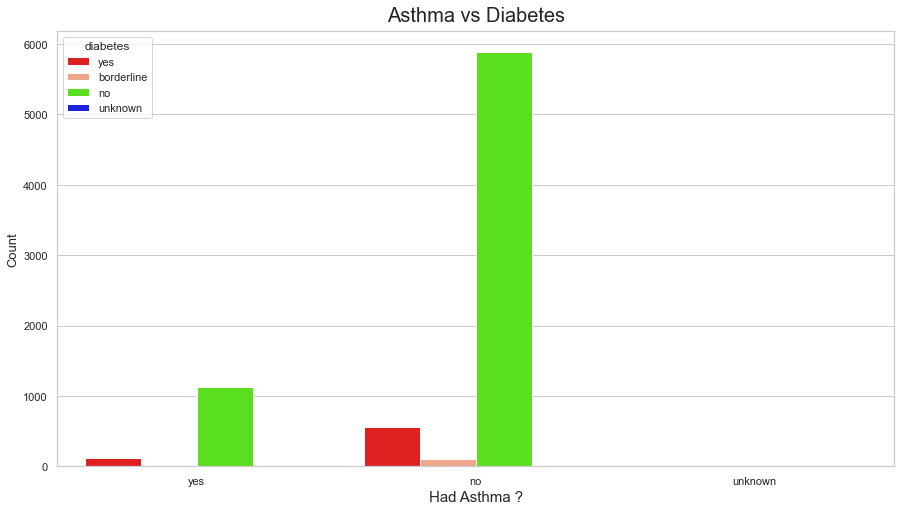

In [38]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='asthma', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('Asthma vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('Had Asthma ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

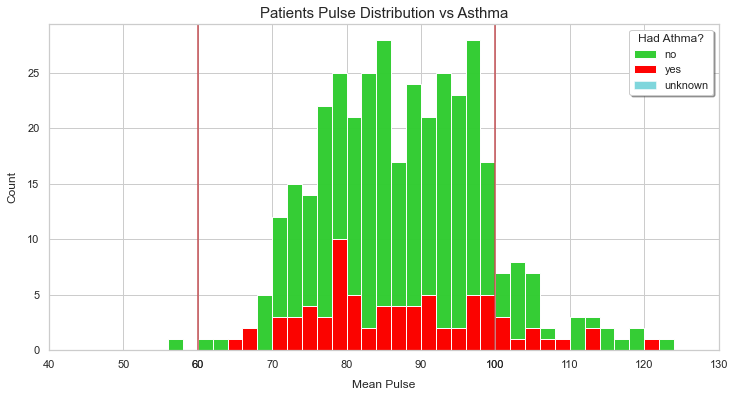

In [39]:
plt.figure(figsize=[12,6])
sb.set_theme(style='whitegrid')

# ------------------------------------------board----------------------


#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.asthma == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.asthma == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.asthma == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Had Athma?', shadow=True)

plt.title('Patients Pulse Distribution vs Asthma', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);

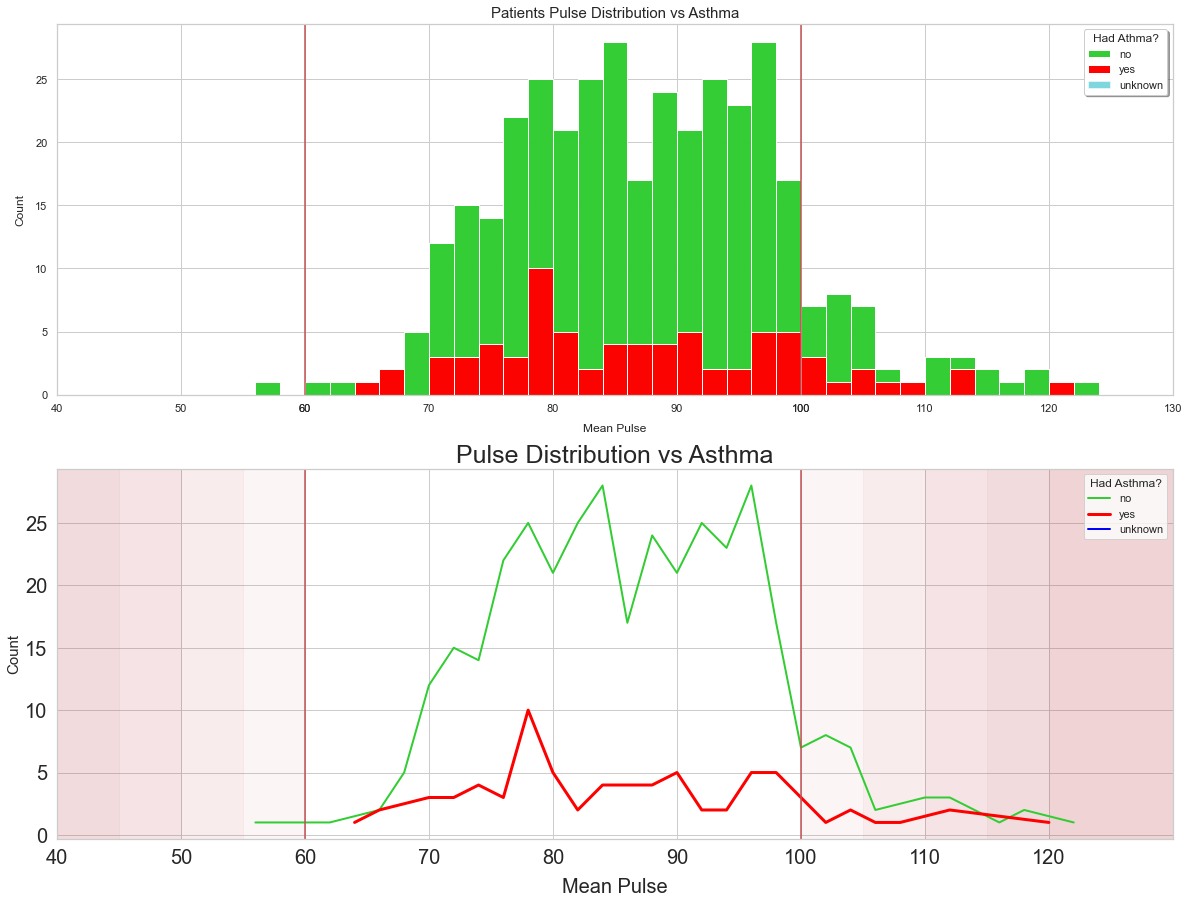

In [40]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')


plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.asthma == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.asthma == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.asthma == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Had Athma?', shadow=True)

plt.title('Patients Pulse Distribution vs Asthma', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)
#----------------------------------------------------------
df['pulse'][df.asthma == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.asthma == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');
df['pulse'][df.asthma == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='Had Asthma?', loc='upper right')

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs Asthma', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

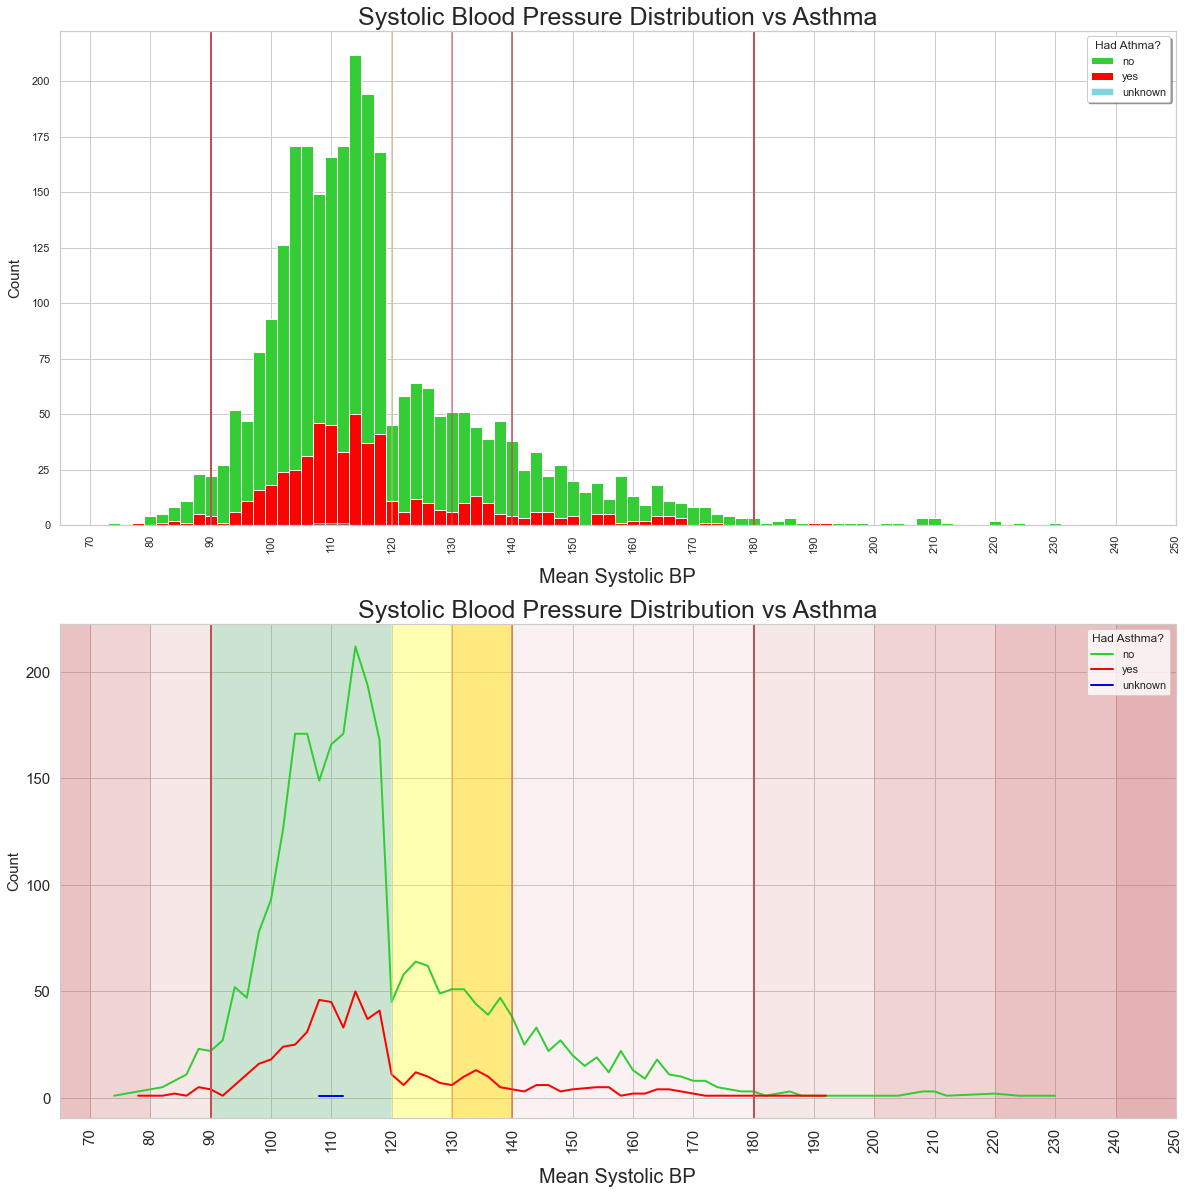

In [41]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')


plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.asthma == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.asthma == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.asthma == 'unknown'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Had Athma?', shadow=True)

plt.title('Patients Systolic BP Distribution vs Asthma', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Systolic BP', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs Asthma', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);



plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.asthma == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.asthma == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.asthma == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='Had Asthma?', loc='upper right')

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs Asthma', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

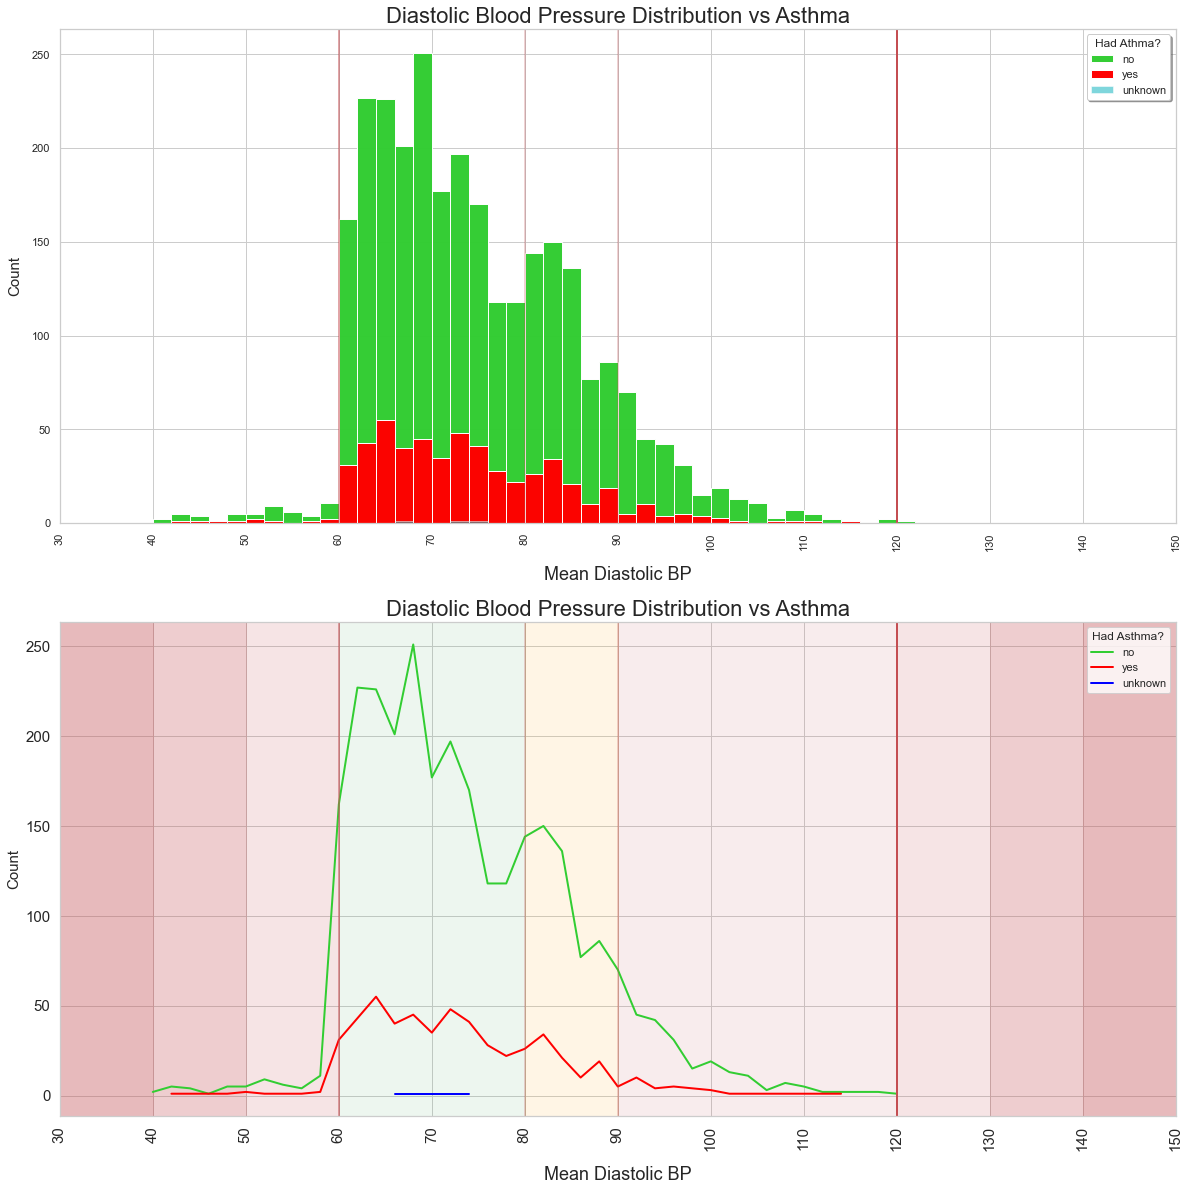

In [42]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.asthma == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.asthma == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.asthma == 'unknown'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Had Athma?', shadow=True)

plt.title('Patients Diastolic BP Distribution vs Asthma', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Diastolic BP', labelpad=10);

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs Asthma', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.asthma == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.asthma == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.asthma == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='Had Asthma?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs Asthma', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(30, 150);

### chf

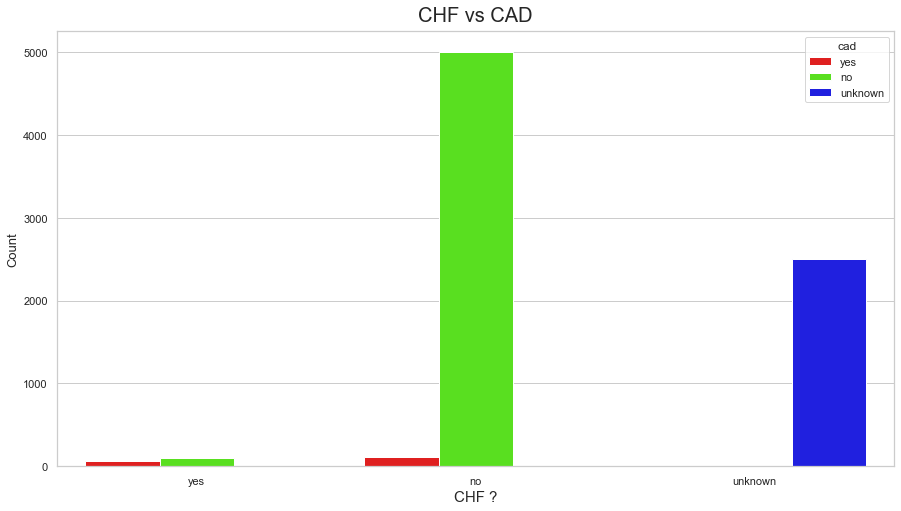

In [43]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='chf', hue='cad', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CHF vs CAD', fontsize= 20, pad=10)
plt.xlabel('CHF ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

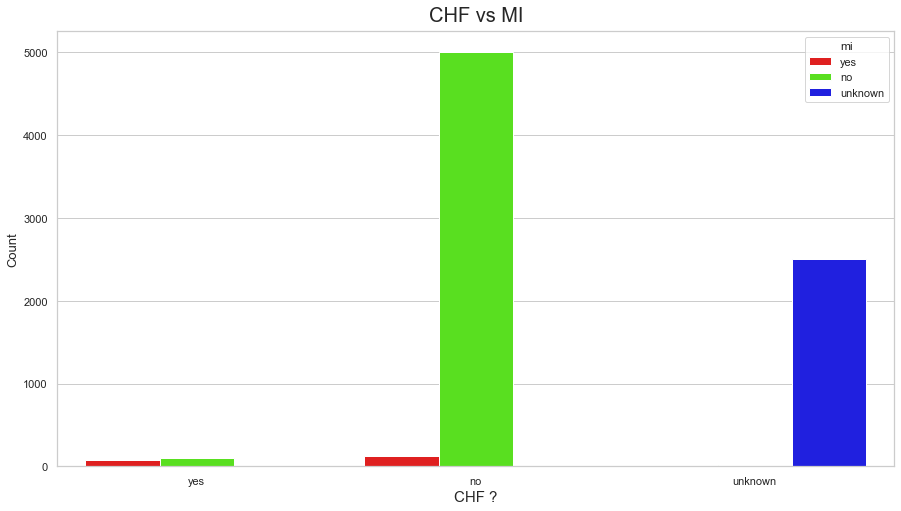

In [44]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='chf', hue='mi', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CHF vs MI', fontsize= 20, pad=10)
plt.xlabel('CHF ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

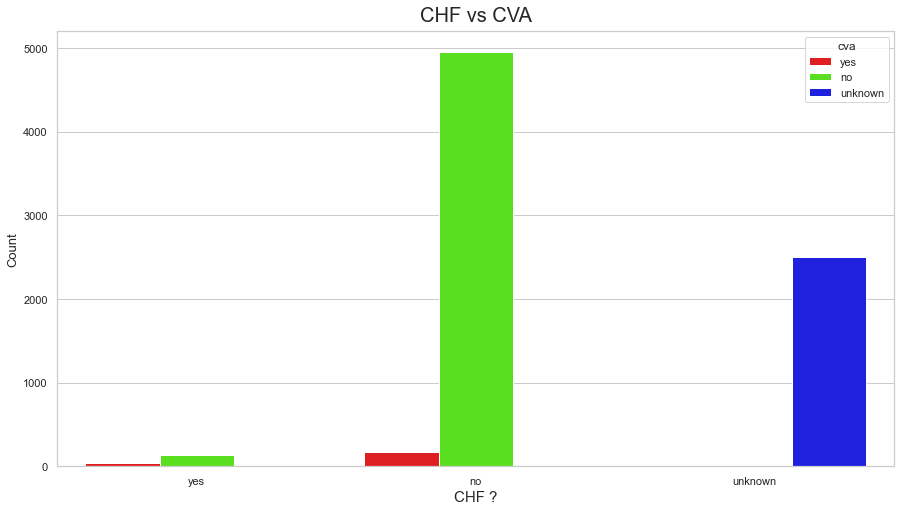

In [45]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='chf', hue='cva', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CHF vs CVA', fontsize= 20, pad=10)
plt.xlabel('CHF ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

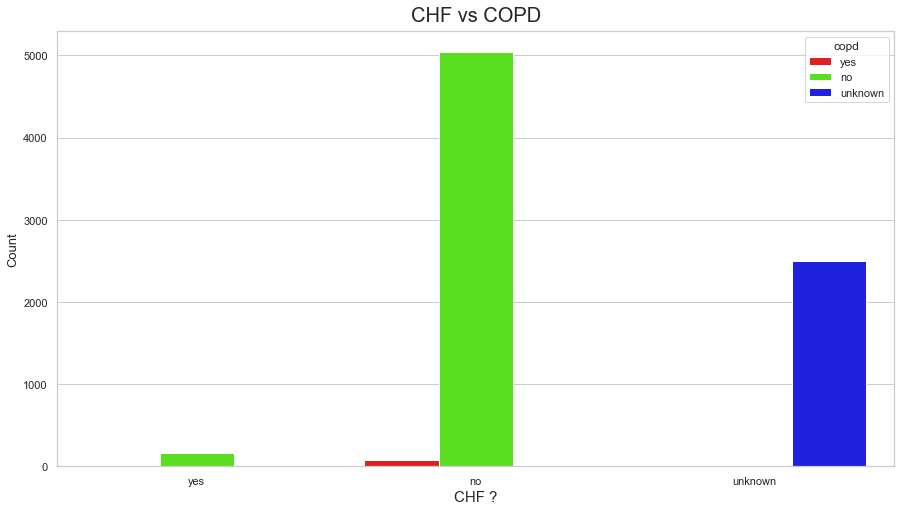

In [46]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='chf', hue='copd', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CHF vs COPD', fontsize= 20, pad=10)
plt.xlabel('CHF ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

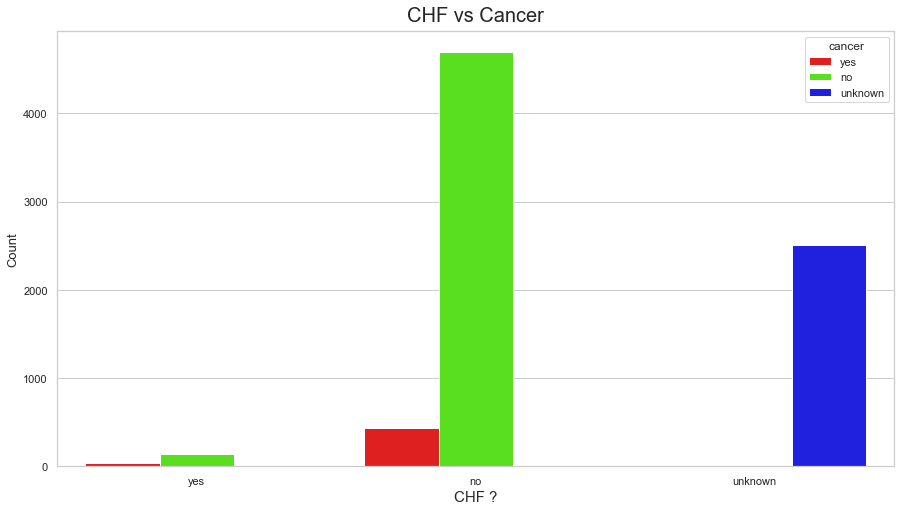

In [47]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='chf', hue='cancer', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CHF vs Cancer', fontsize= 20, pad=10)
plt.xlabel('CHF ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

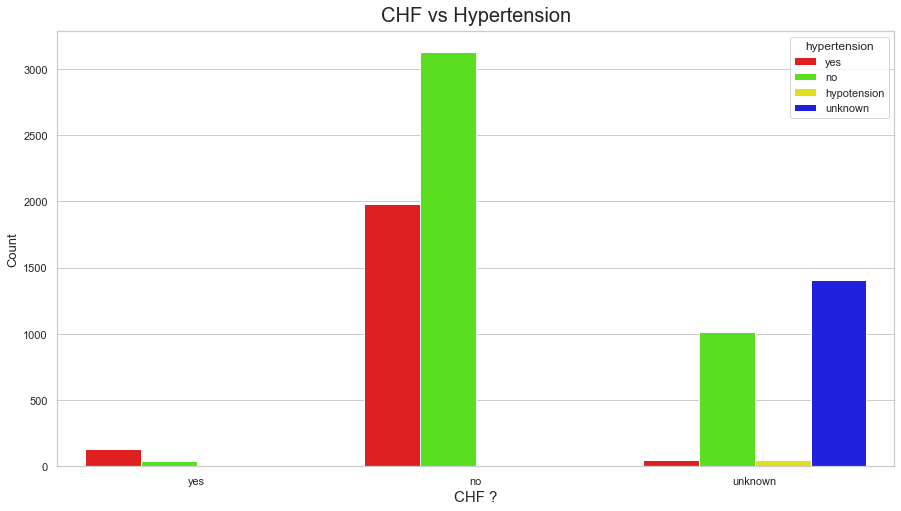

In [48]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='chf', hue='hypertension', palette=[(1,0,0,.7), (.3,1,0,.99), 'yellow', 'blue']);

plt.title('CHF vs Hypertension', fontsize= 20, pad=10)
plt.xlabel('CHF ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

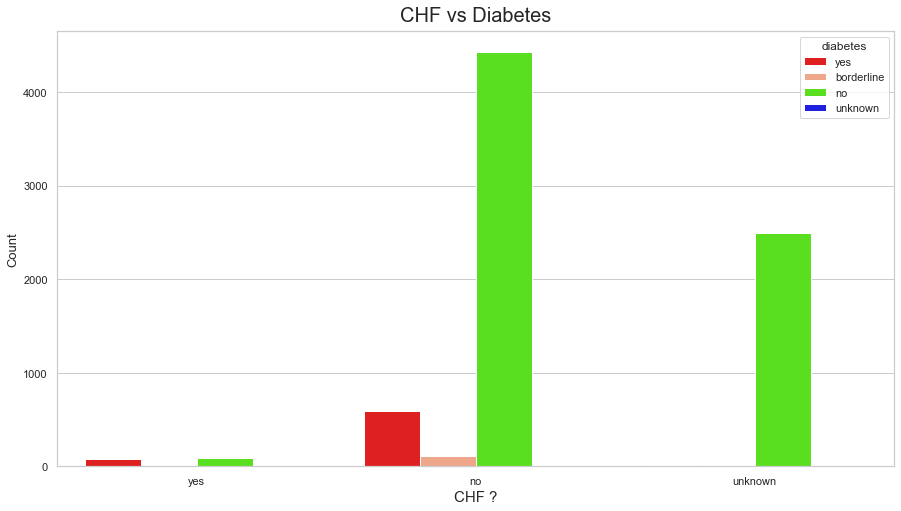

In [49]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='chf', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('CHF vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('CHF ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

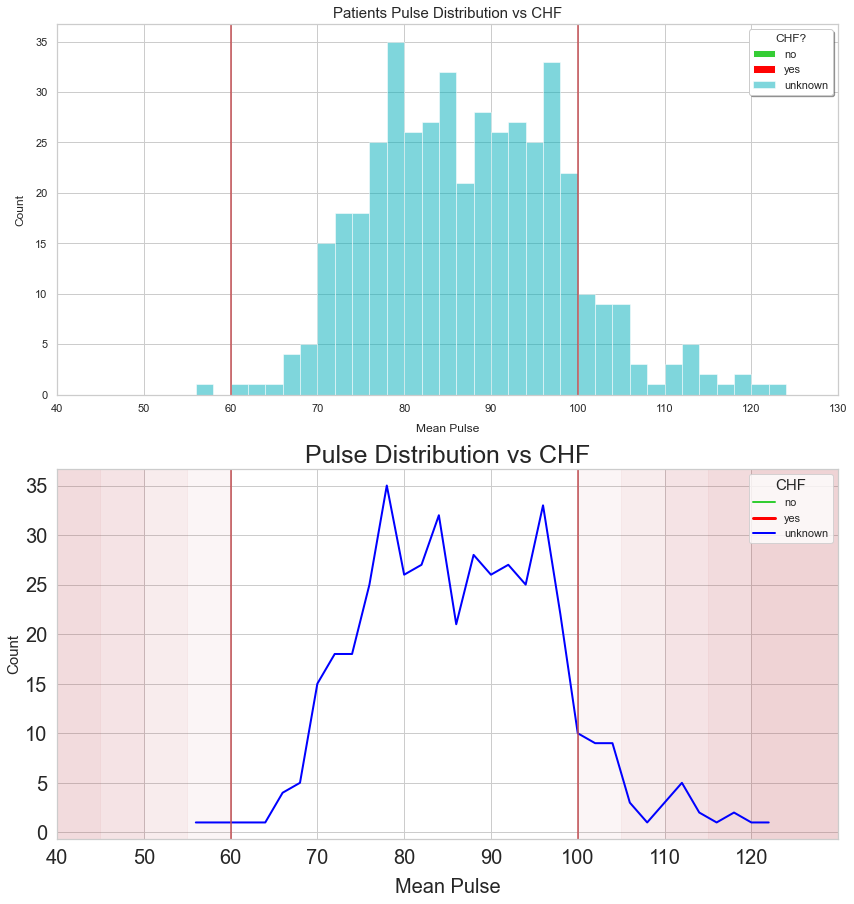

In [50]:
plt.figure(figsize=[14,15])
sb.set_theme(style='whitegrid')


plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.chf == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.chf == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.chf == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CHF?', shadow=True)

plt.title('Patients Pulse Distribution vs CHF', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#----------------------------------------------------------
df['pulse'][df.chf == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.chf == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');

df['pulse'][df.chf == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='CHF', loc='upper right', title_fontsize=15)

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs CHF', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

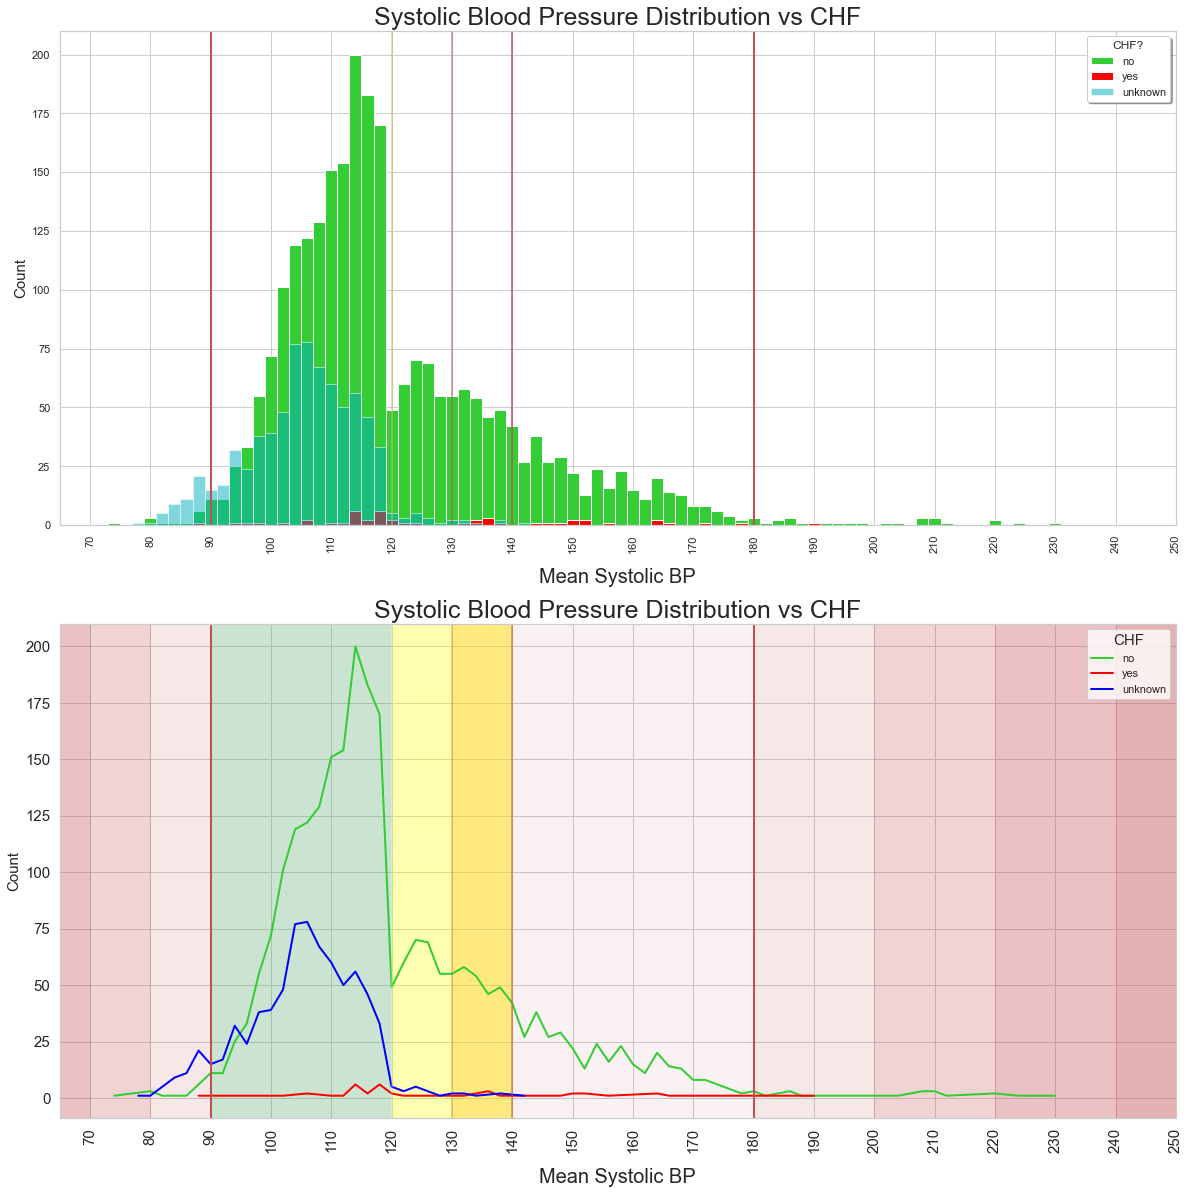

In [51]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.chf == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.chf == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.chf == 'unknown'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CHF?', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs CHF', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);


#==================================second plot===============================
plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.chf == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.chf == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.chf == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='CHF', loc='upper right', title_fontsize=15)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs CHF', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

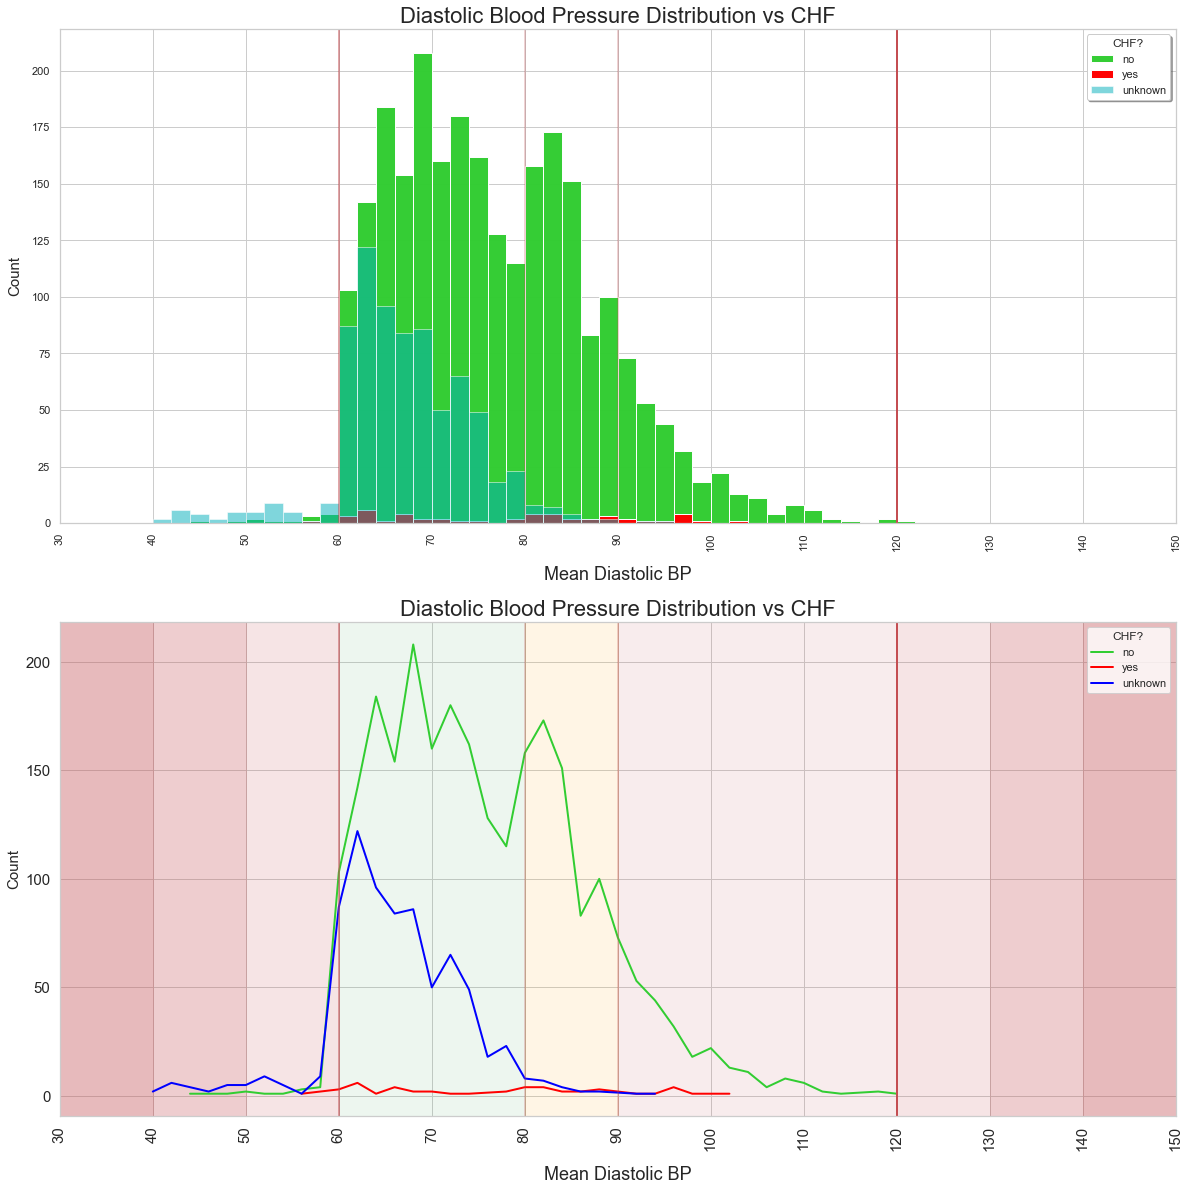

In [52]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.chf == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.chf == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.chf == 'unknown'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CHF?', shadow=True)

plt.title('Patients Diastolic BP Distribution vs CHF', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Diastolic BP', labelpad=10);

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs CHF', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.chf == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.chf == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.chf == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='CHF?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs CHF', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(30, 150);

### cad

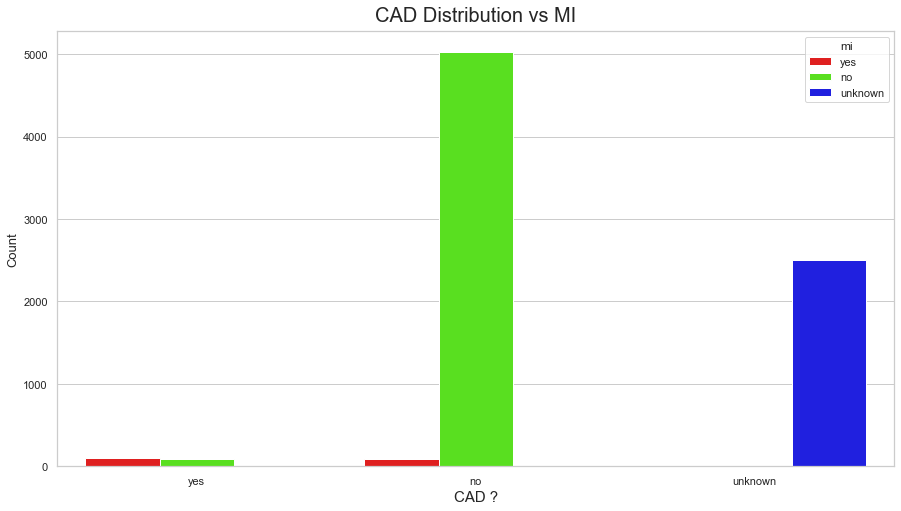

In [53]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='cad', hue='mi', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CAD Distribution vs MI', fontsize= 20, pad=10)
plt.xlabel('CAD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

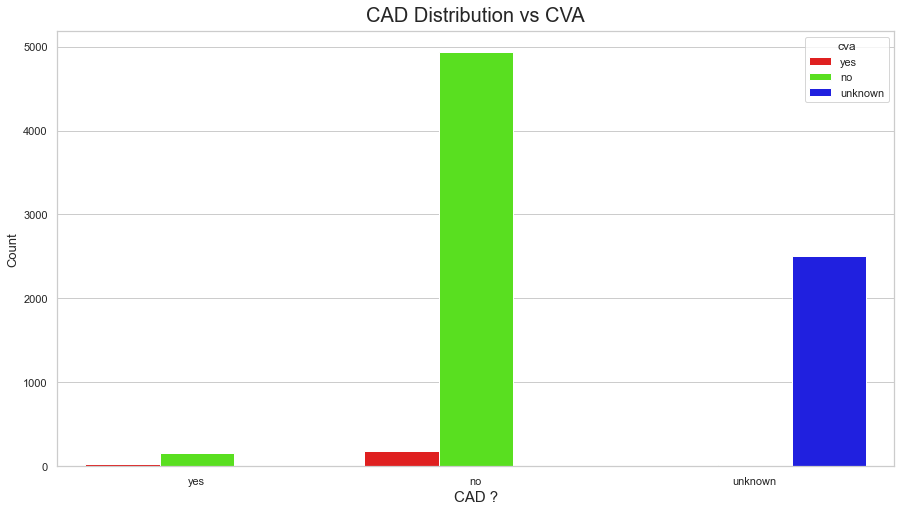

In [54]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='cad', hue='cva', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CAD Distribution vs CVA', fontsize= 20, pad=10)
plt.xlabel('CAD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

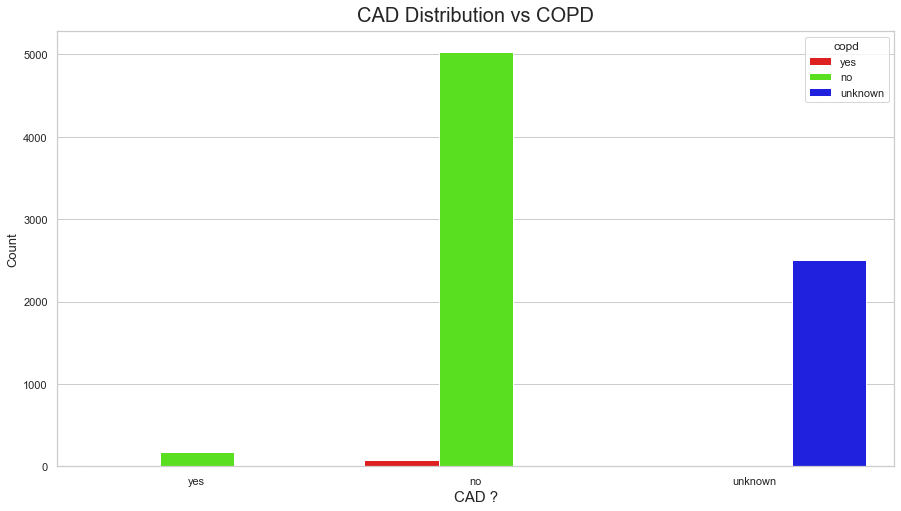

In [55]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='cad', hue='copd', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CAD Distribution vs COPD', fontsize= 20, pad=10)
plt.xlabel('CAD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

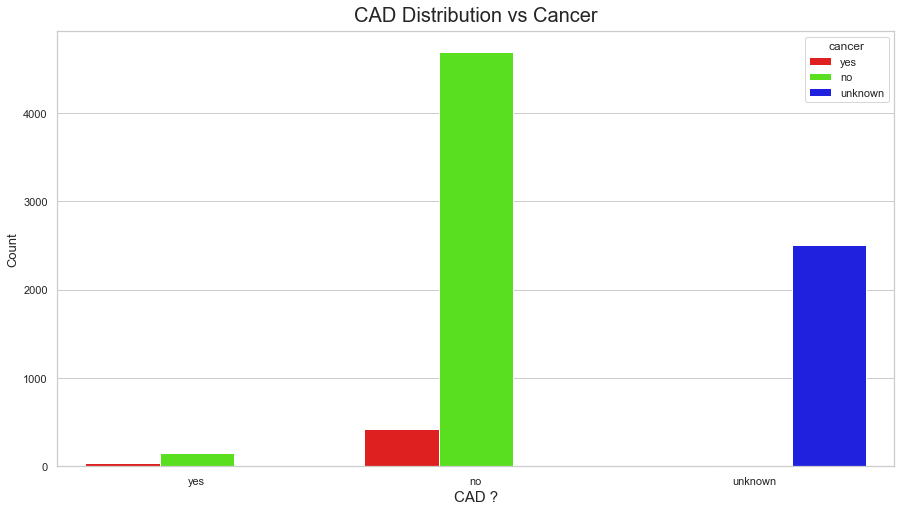

In [56]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='cad', hue='cancer', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CAD Distribution vs Cancer', fontsize= 20, pad=10)
plt.xlabel('CAD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

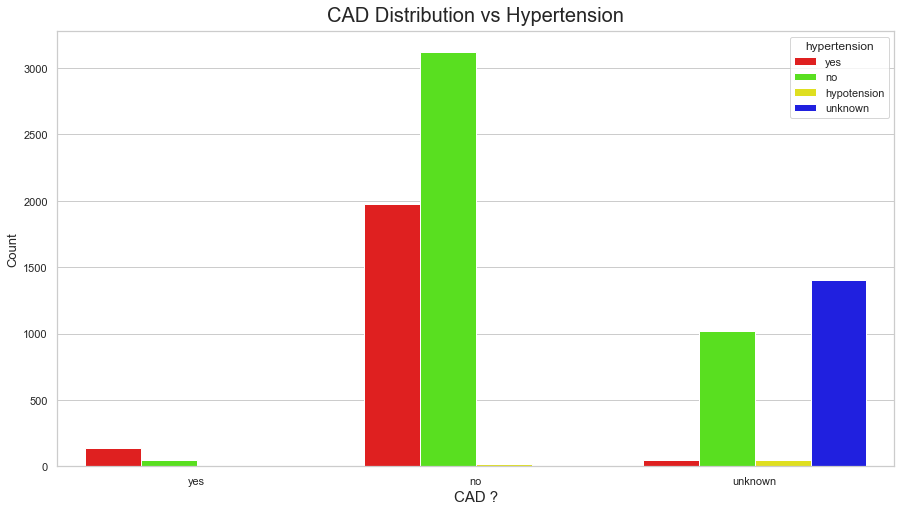

In [57]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='cad', hue='hypertension', palette=[(1,0,0,.7), (.3,1,0,.99), 'yellow', 'blue']);

plt.title('CAD Distribution vs Hypertension', fontsize= 20, pad=10)
plt.xlabel('CAD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

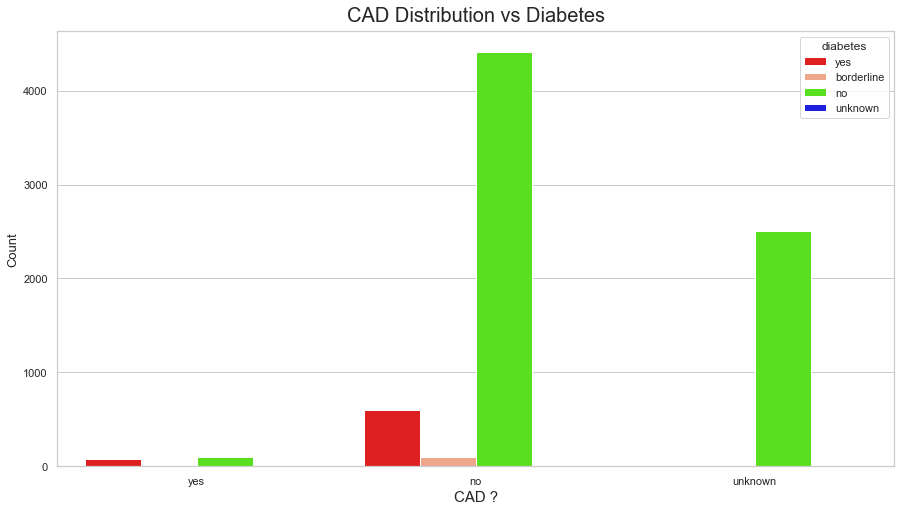

In [58]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='cad', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('CAD Distribution vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('CAD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

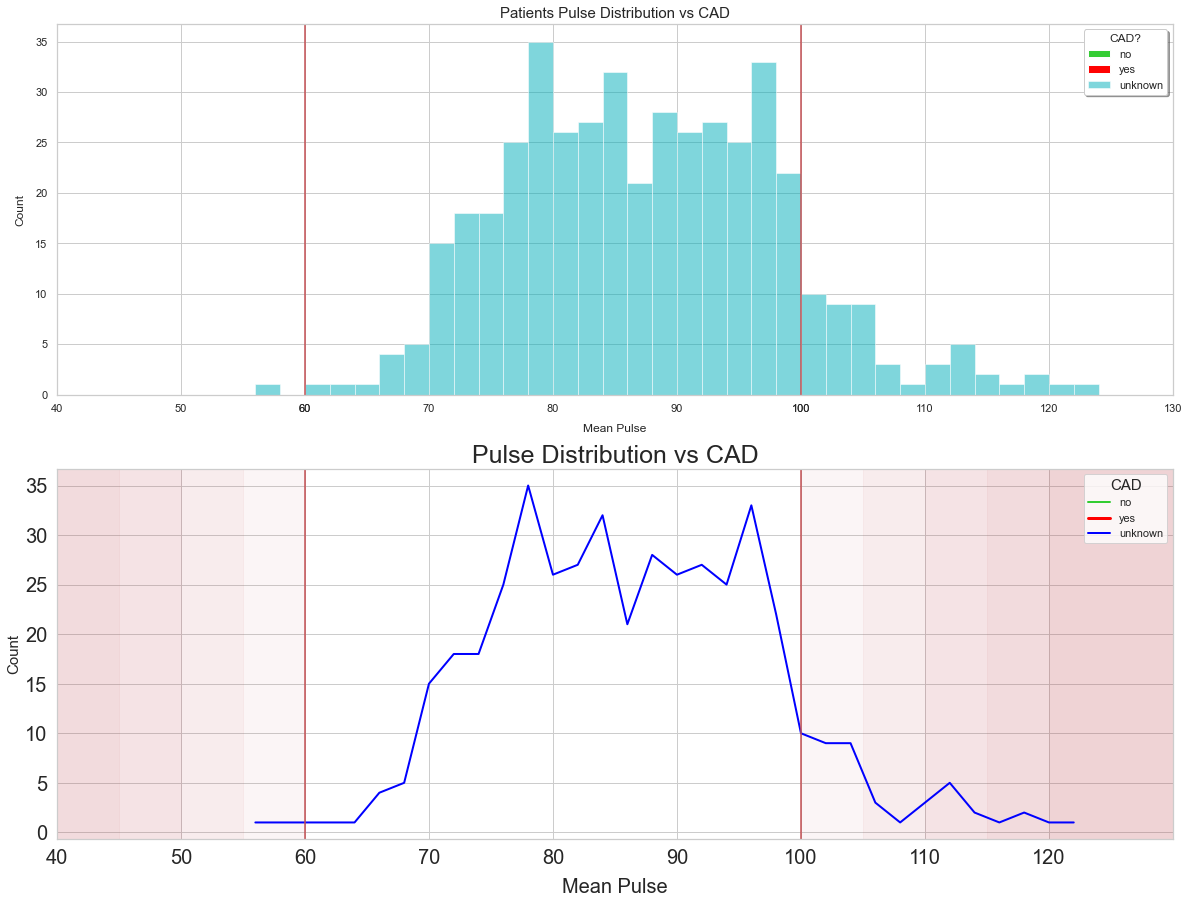

In [59]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.cad == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cad == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cad == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CAD?', shadow=True)

plt.title('Patients Pulse Distribution vs CAD', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


#_______________________________second plot____________________________________
plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#----------------------------------------------------------
df['pulse'][df.cad == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.cad == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');

df['pulse'][df.cad == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='CAD', loc='upper right', title_fontsize=15)

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs CAD', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

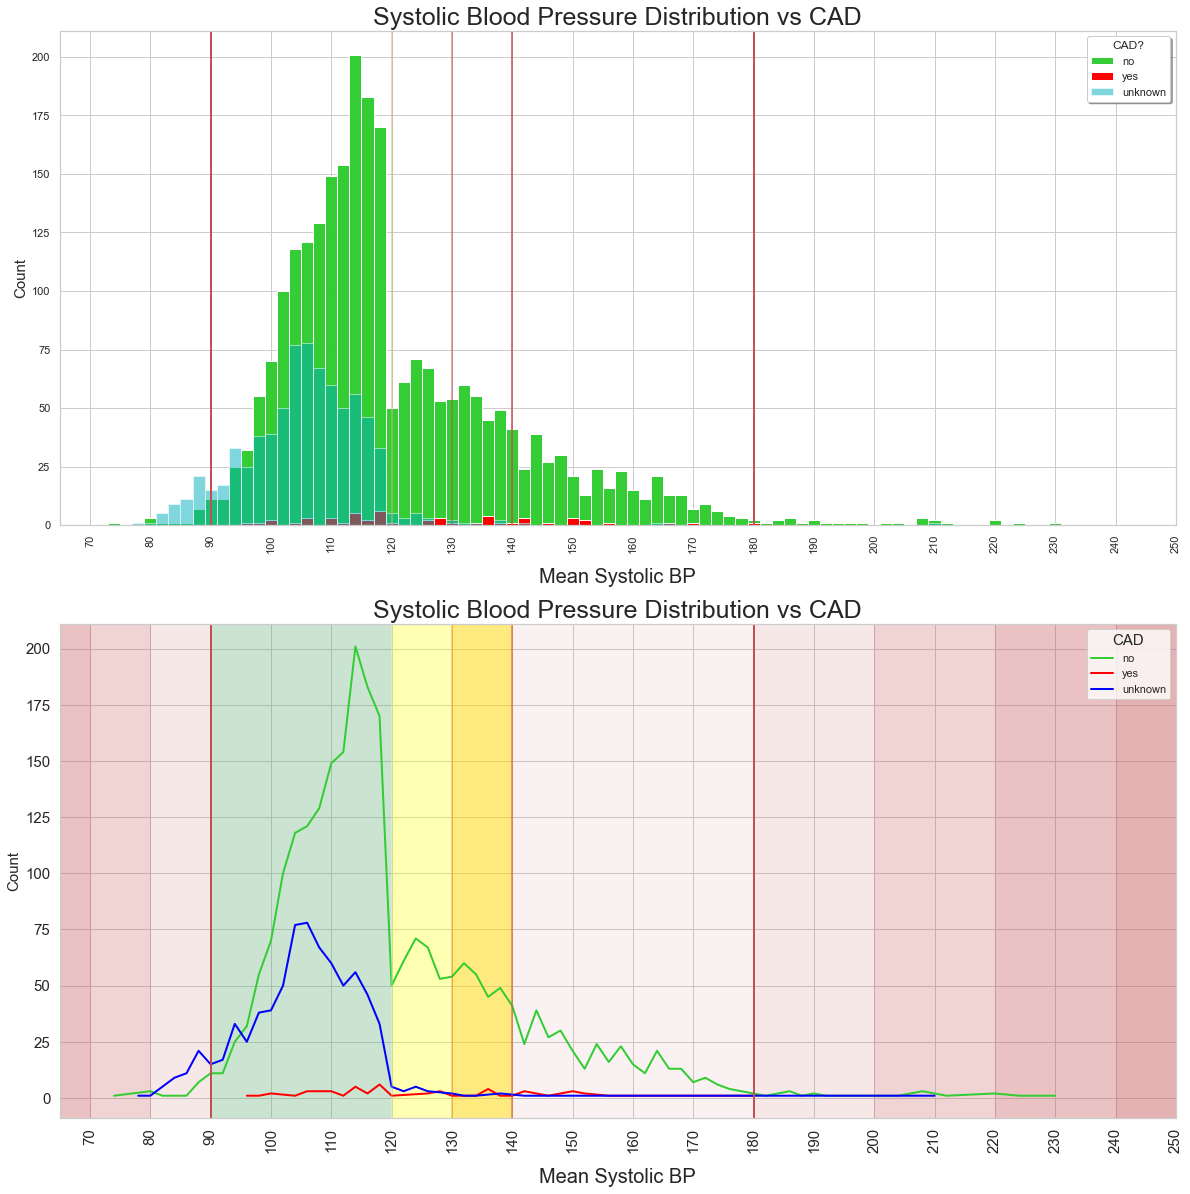

In [60]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.cad == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cad == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cad == 'unknown'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CAD?', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs CAD', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);


#==================================second plot===============================
plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.cad == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.cad == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.cad == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='CAD', loc='upper right', title_fontsize=15)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs CAD', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

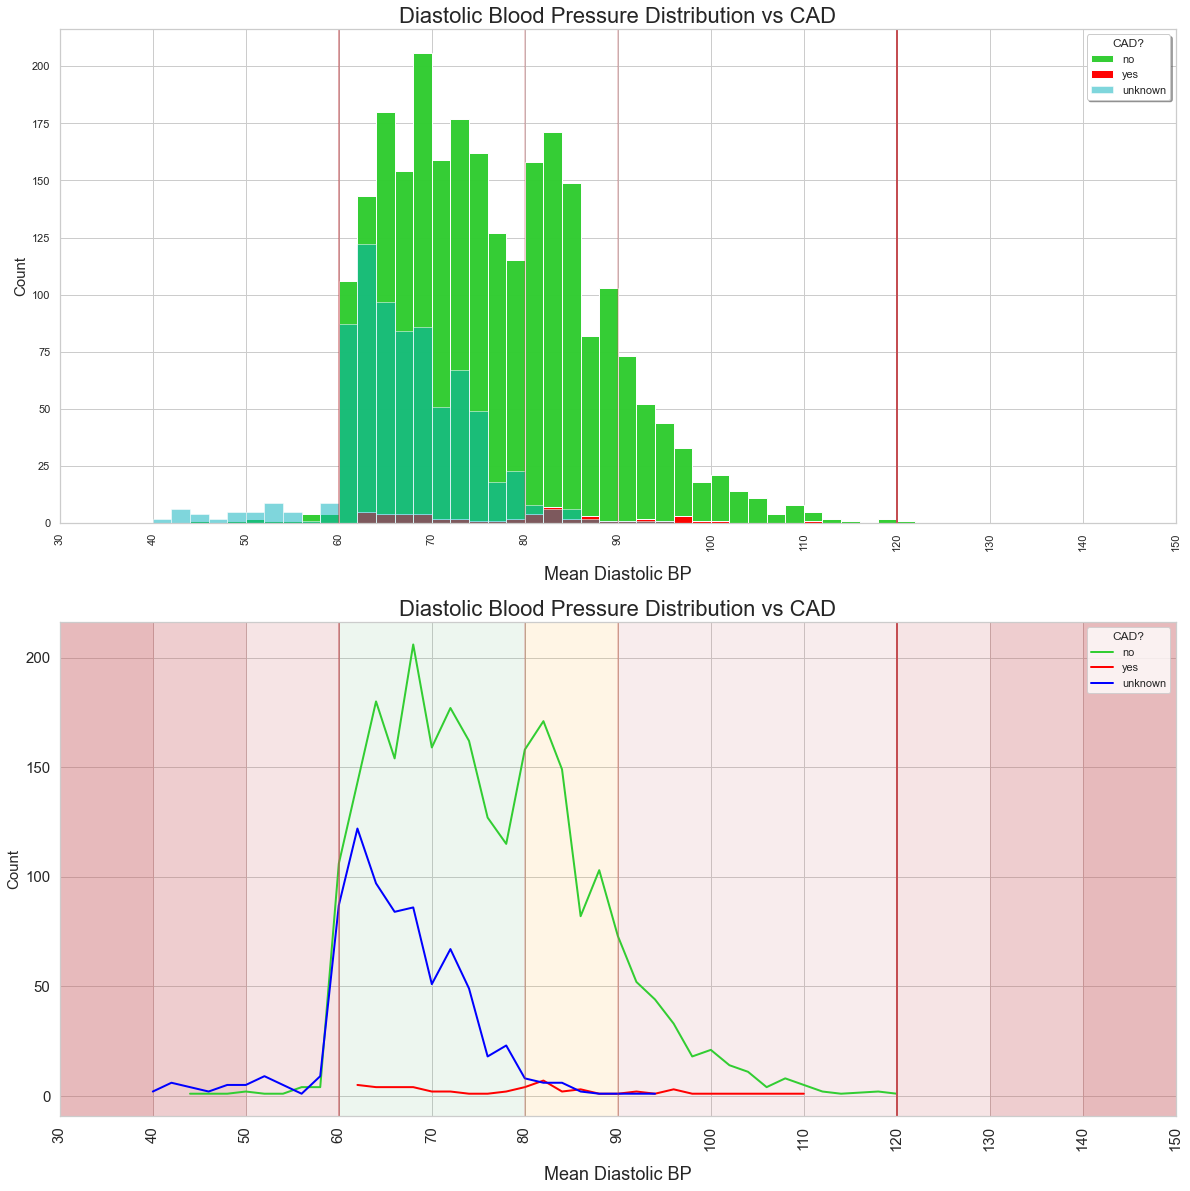

In [61]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.cad == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cad == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cad == 'unknown'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CAD?', shadow=True)

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs CAD', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.cad == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.cad == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.cad == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');
plt.legend(['no','yes', 'unknown'], title='CAD?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs CAD', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

### MI

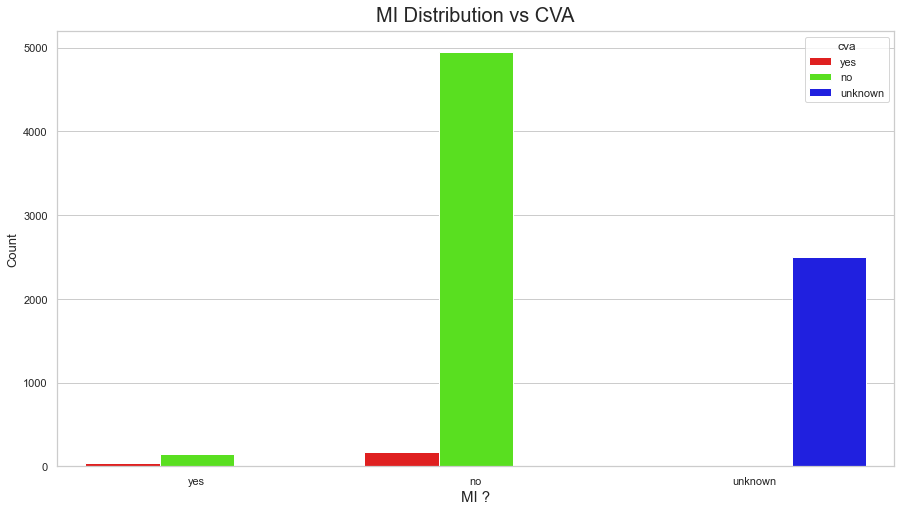

In [62]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='mi', hue='cva', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('MI Distribution vs CVA', fontsize= 20, pad=10)
plt.xlabel('MI ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

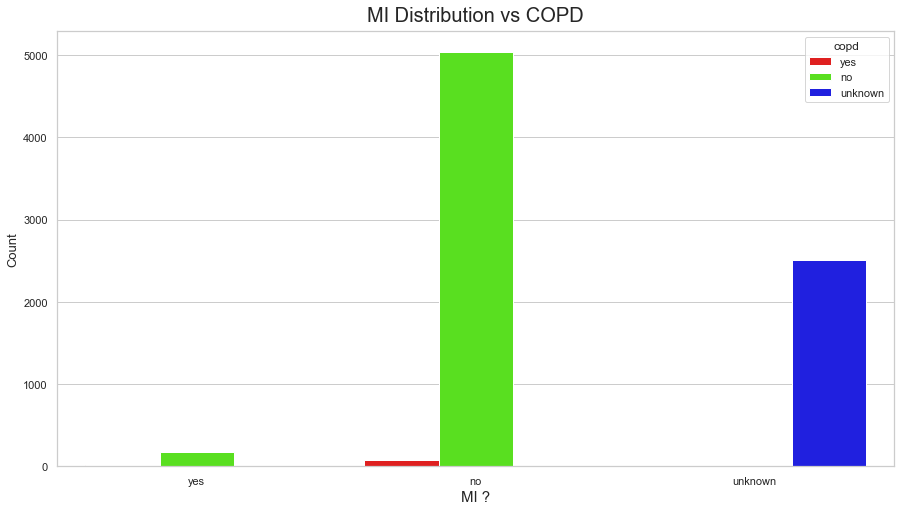

In [63]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='mi', hue='copd', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('MI Distribution vs COPD', fontsize= 20, pad=10)
plt.xlabel('MI ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

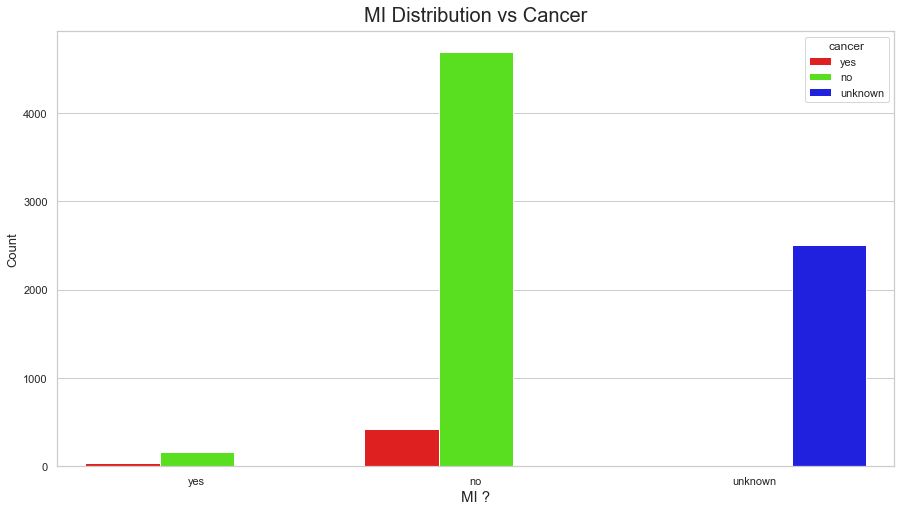

In [64]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='mi', hue='cancer', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('MI Distribution vs Cancer', fontsize= 20, pad=10)
plt.xlabel('MI ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

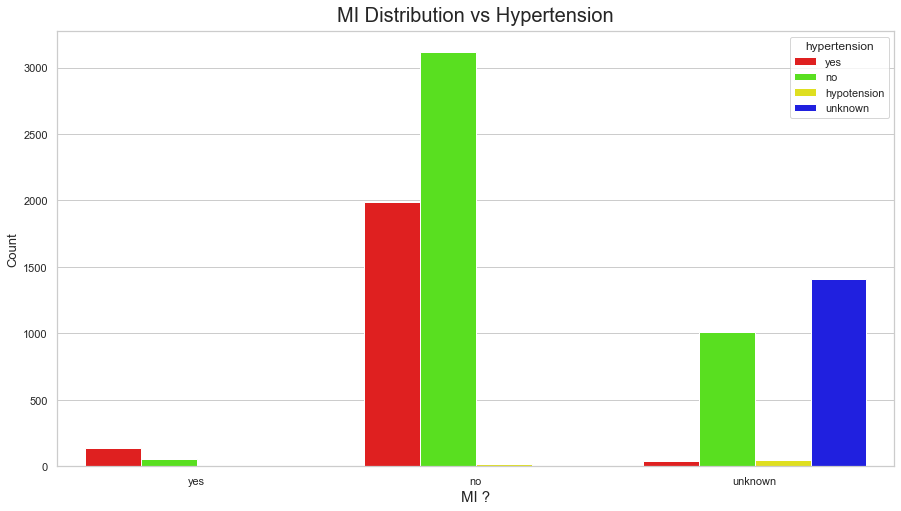

In [65]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='mi', hue='hypertension', palette=[(1,0,0,.7), (.3,1,0,.99), 'yellow', 'blue']);

plt.title('MI Distribution vs Hypertension', fontsize= 20, pad=10)
plt.xlabel('MI ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

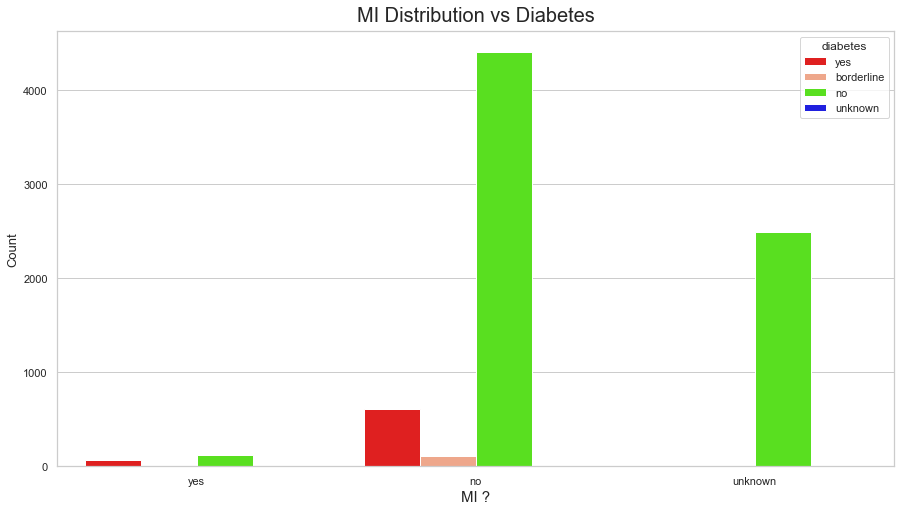

In [66]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[15,8])
sb.countplot(data=df, x='mi', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('MI Distribution vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('MI ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

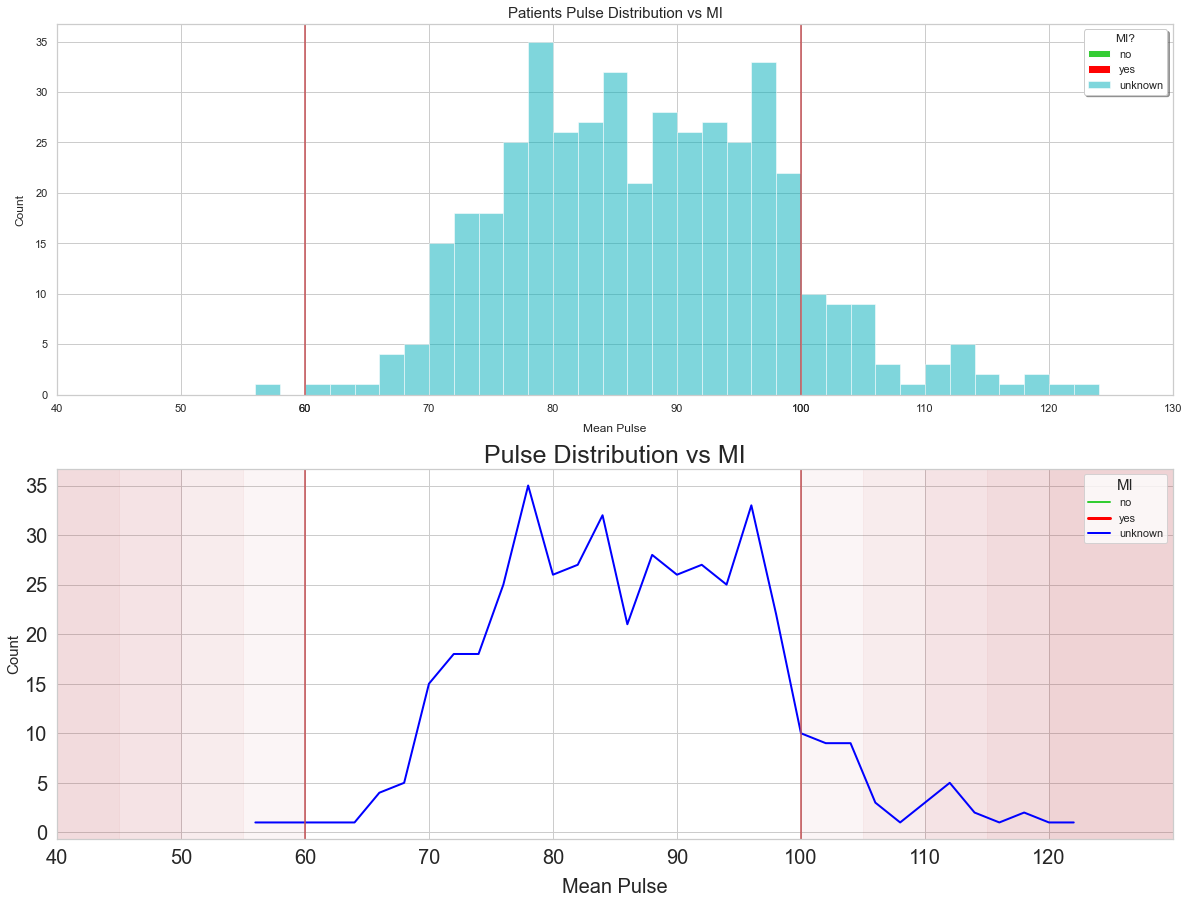

In [67]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.mi == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.mi == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.mi == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='MI?', shadow=True)

plt.title('Patients Pulse Distribution vs MI', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


#_______________________________second plot____________________________________
plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#----------------------------------------------------------
df['pulse'][df.mi == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.mi == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');
df['pulse'][df.mi == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='MI', loc='upper right', title_fontsize=15)

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs MI', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

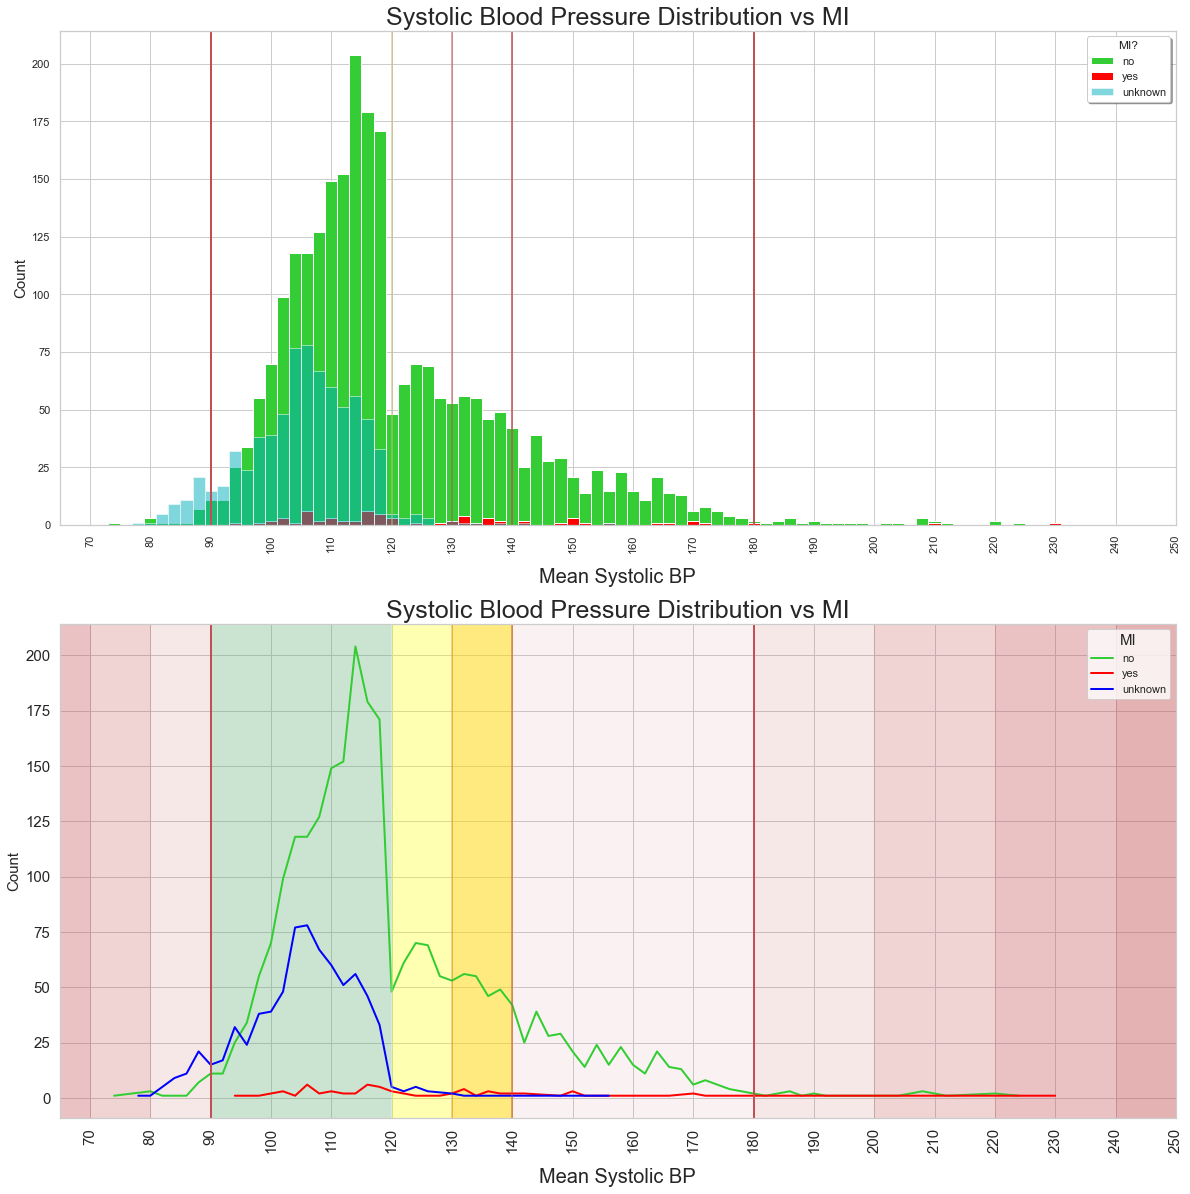

In [68]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.mi == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.mi == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.mi == 'unknown'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='MI?', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs MI', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);


#==================================second plot===============================
plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.mi == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.mi == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.mi == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='MI', loc='upper right', title_fontsize=15)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs MI', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

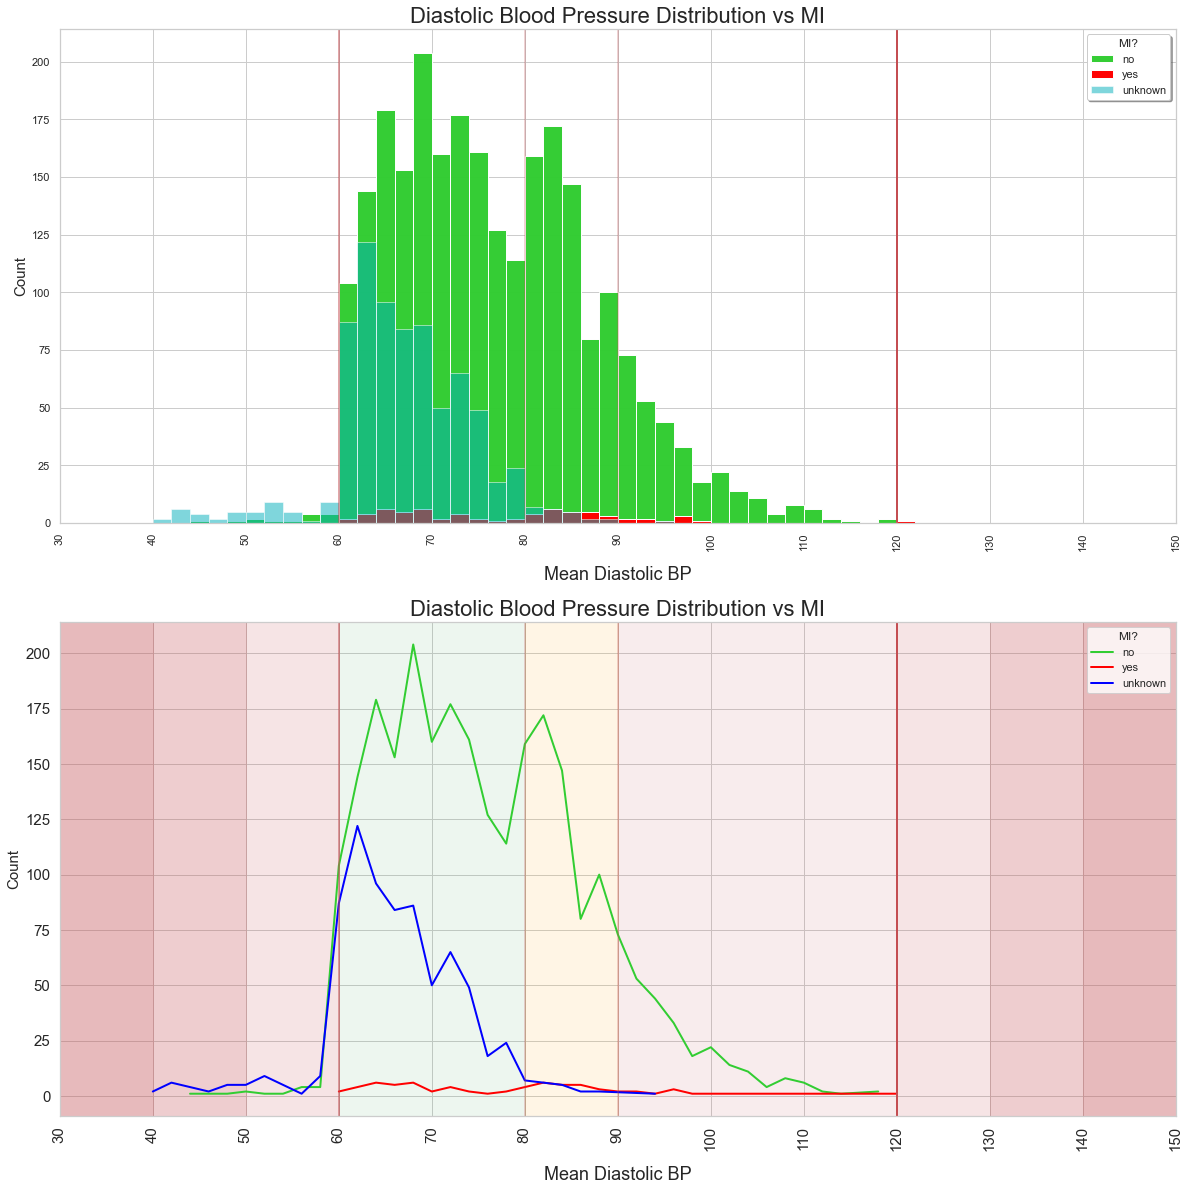

In [69]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.mi == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.mi == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.mi == 'unknown'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='MI?', shadow=True)

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs MI', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.mi == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.mi == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.mi == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');
plt.legend(['no','yes', 'unknown'], title='MI?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs MI', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

### CVA

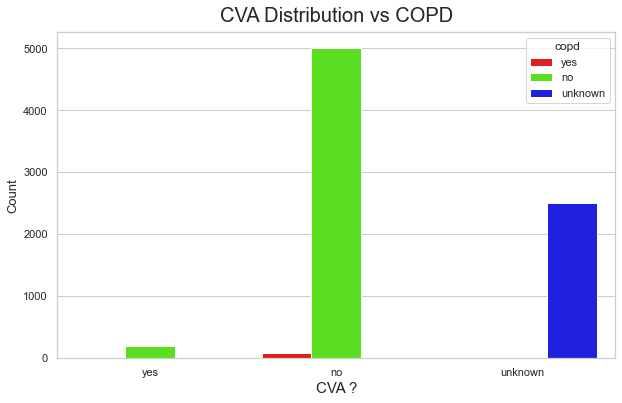

In [70]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='cva', hue='copd', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CVA Distribution vs COPD', fontsize= 20, pad=10)
plt.xlabel('CVA ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

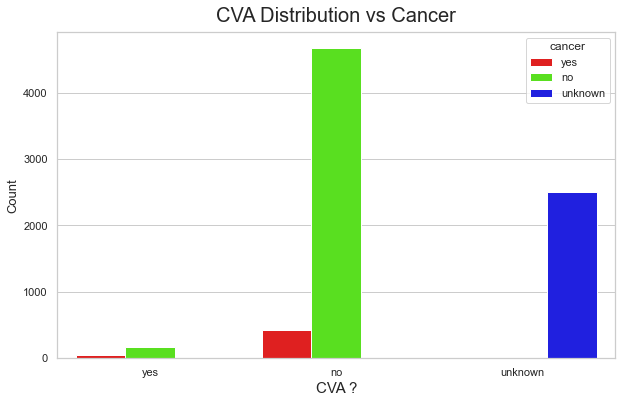

In [71]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='cva', hue='cancer', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('CVA Distribution vs Cancer', fontsize= 20, pad=10)
plt.xlabel('CVA ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

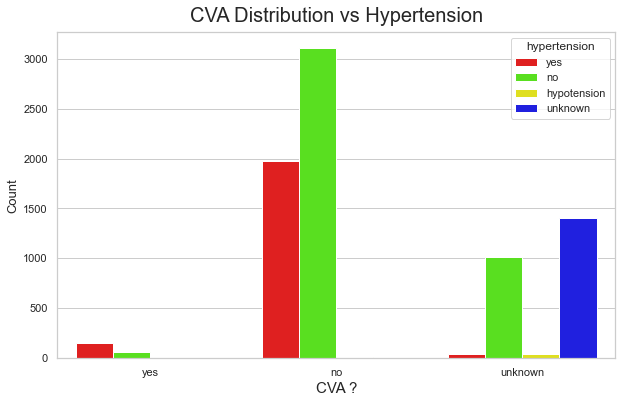

In [72]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='cva', hue='hypertension', palette=[(1,0,0,.7), (.3,1,0,.99), 'yellow', 'blue']);

plt.title('CVA Distribution vs Hypertension', fontsize= 20, pad=10)
plt.xlabel('CVA ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

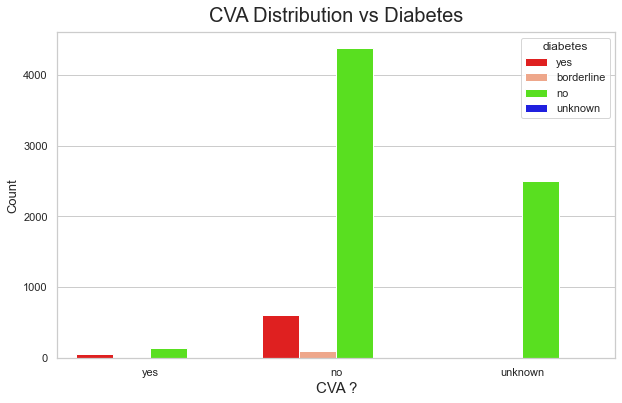

In [73]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='cva', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('CVA Distribution vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('CVA ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

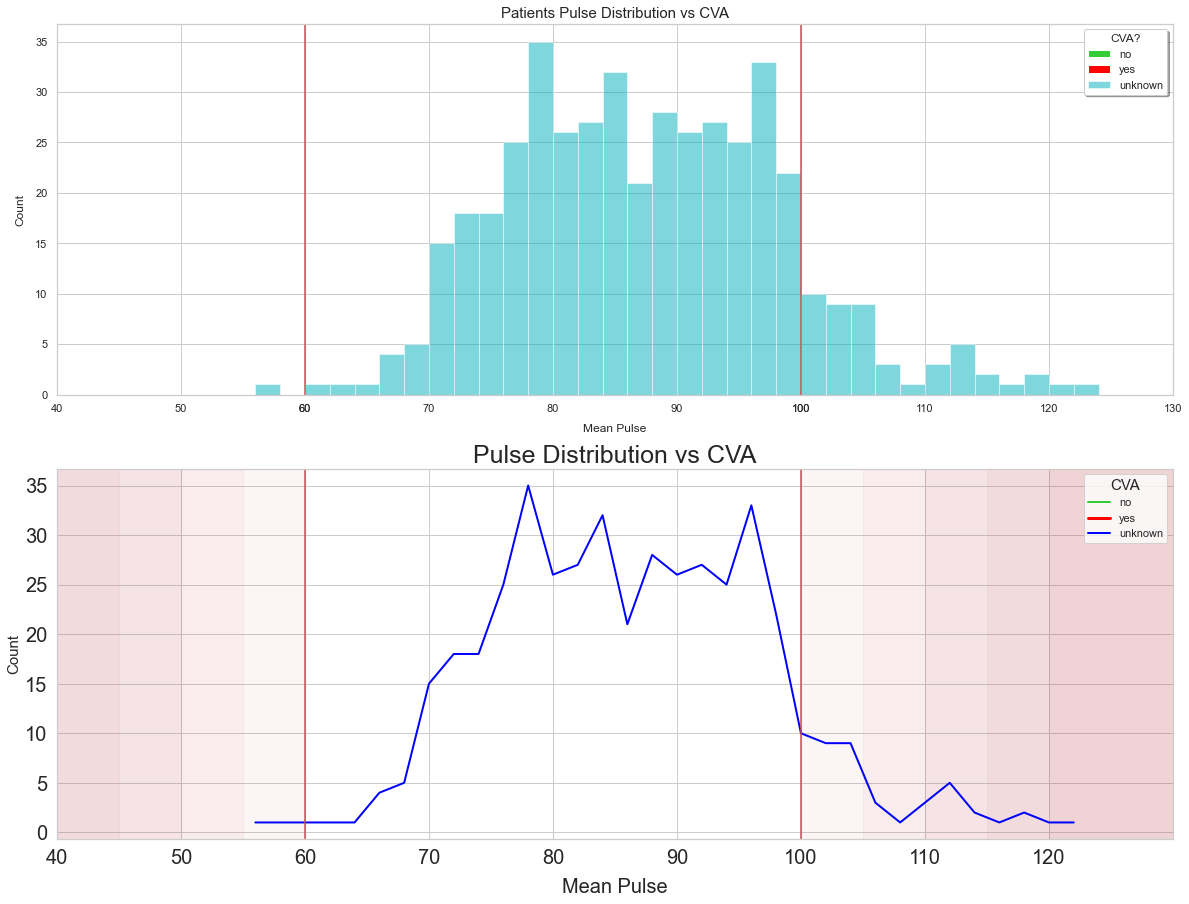

In [74]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.cva == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cva == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cva == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CVA?', shadow=True)

plt.title('Patients Pulse Distribution vs CVA', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


#_______________________________second plot____________________________________
plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#----------------------------------------------------------
df['pulse'][df.cva == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.cva == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');

df['pulse'][df.cva == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='CVA', loc='upper right', title_fontsize=15)

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs CVA', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

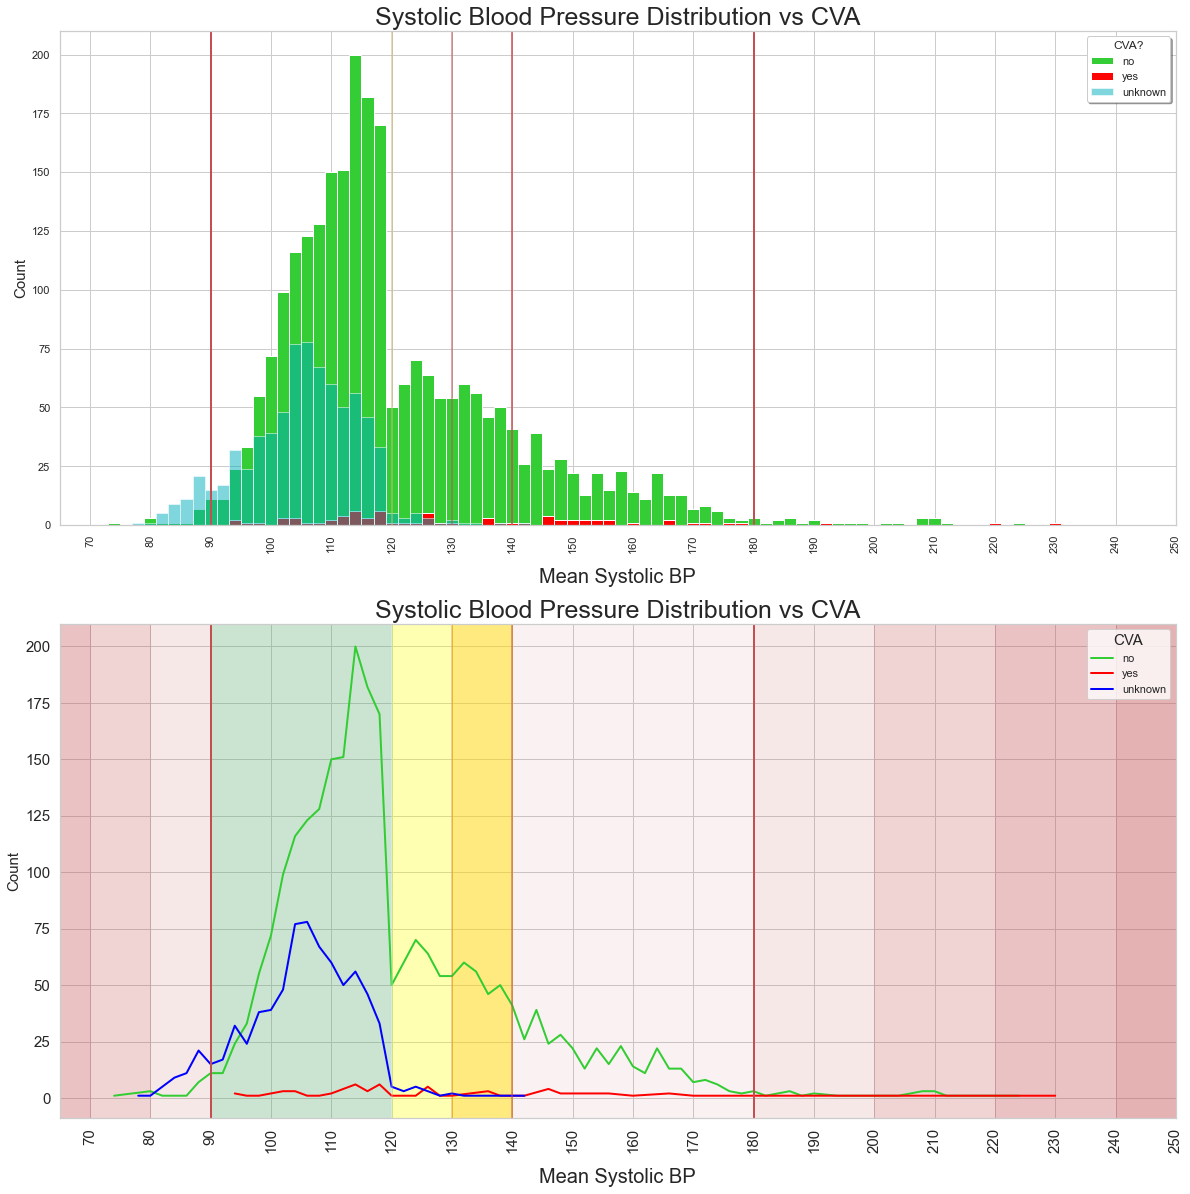

In [75]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.cva == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cva == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cva == 'unknown'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CVA?', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs CVA', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);


#==================================second plot===============================
plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.cva == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.cva == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.cva == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='CVA', loc='upper right', title_fontsize=15)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs CVA', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

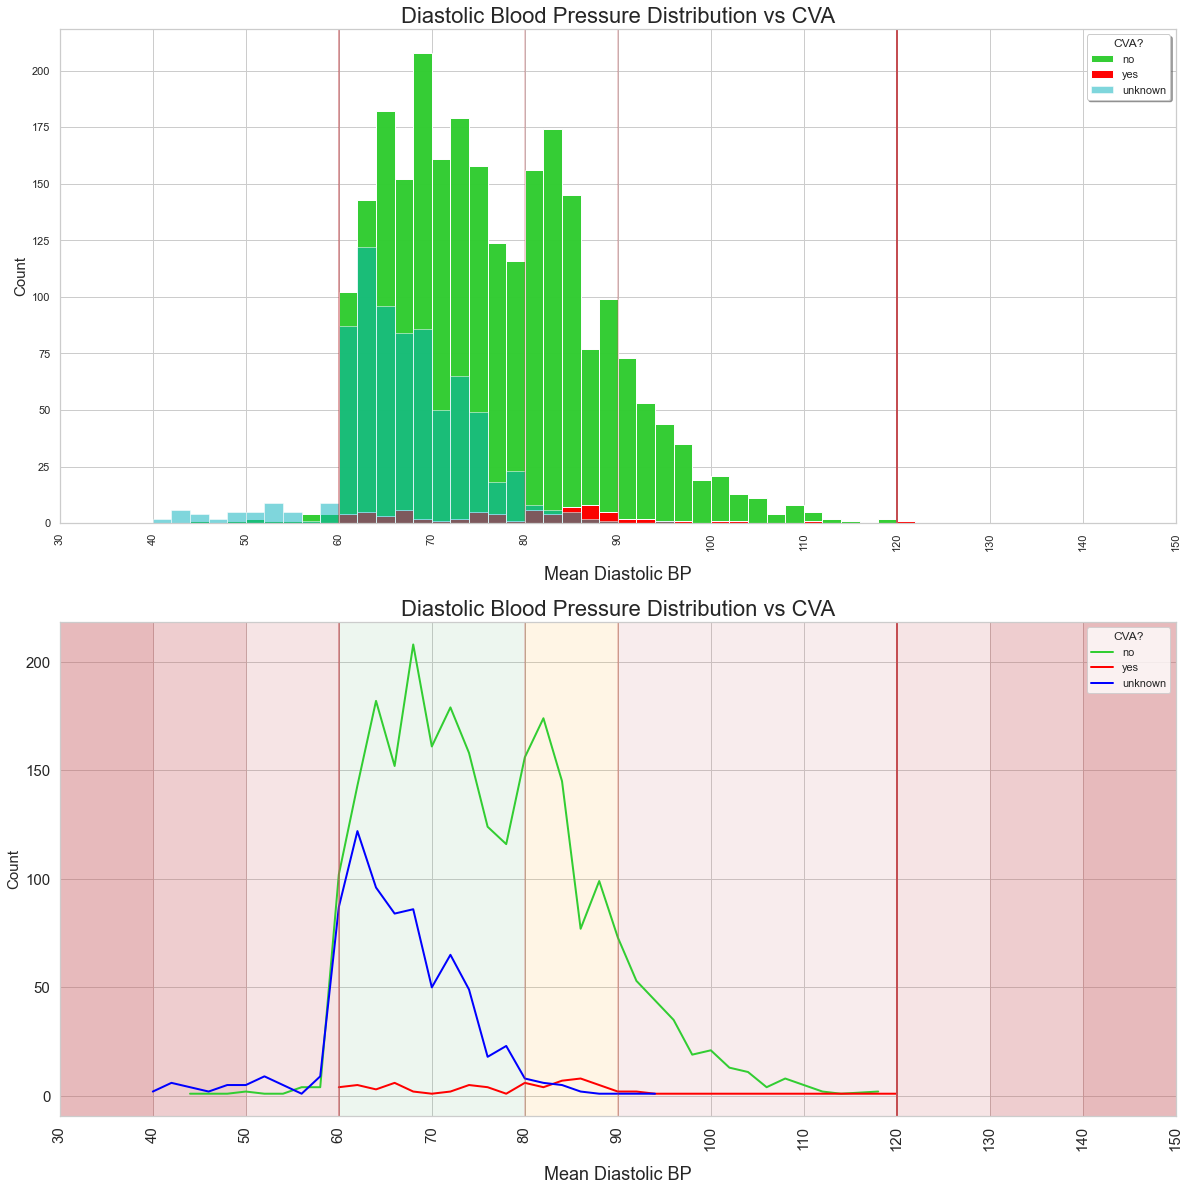

In [76]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.cva == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cva == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cva == 'unknown'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='CVA?', shadow=True)

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs CVA', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.cva == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.cva == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.cva == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');
plt.legend(['no','yes', 'unknown'], title='CVA?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs CVA', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

### COPD

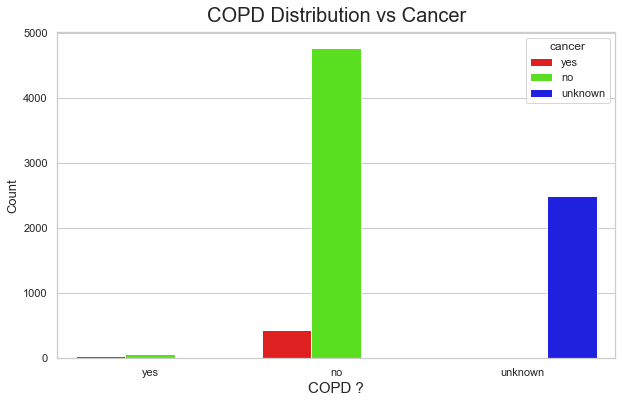

In [77]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='copd', hue='cancer', palette=[(1,0,0,.7), (.3,1,0,.99), 'blue']);

plt.title('COPD Distribution vs Cancer', fontsize= 20, pad=10)
plt.xlabel('COPD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

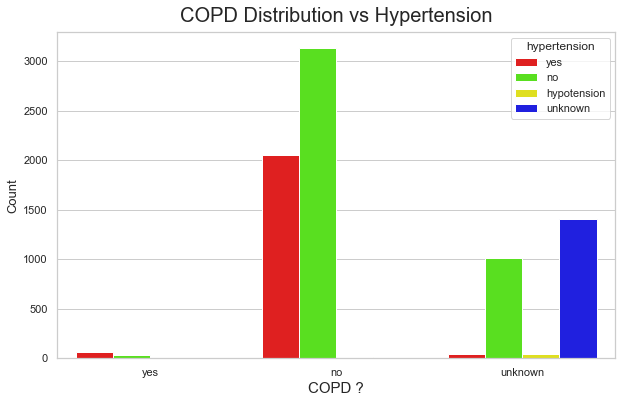

In [78]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='copd', hue='hypertension', palette=[(1,0,0,.7), (.3,1,0,.99), 'yellow', 'blue']);

plt.title('COPD Distribution vs Hypertension', fontsize= 20, pad=10)
plt.xlabel('COPD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

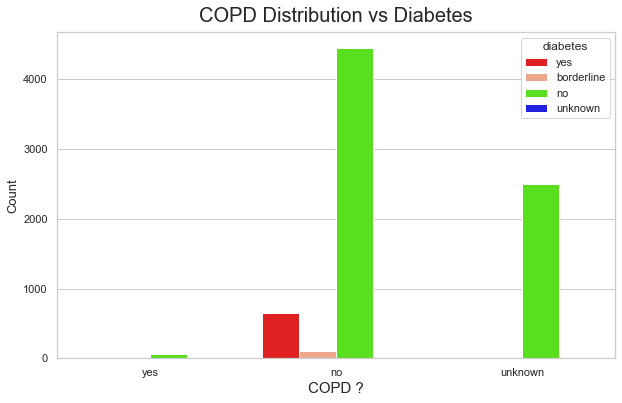

In [79]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='copd', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('COPD Distribution vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('COPD ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

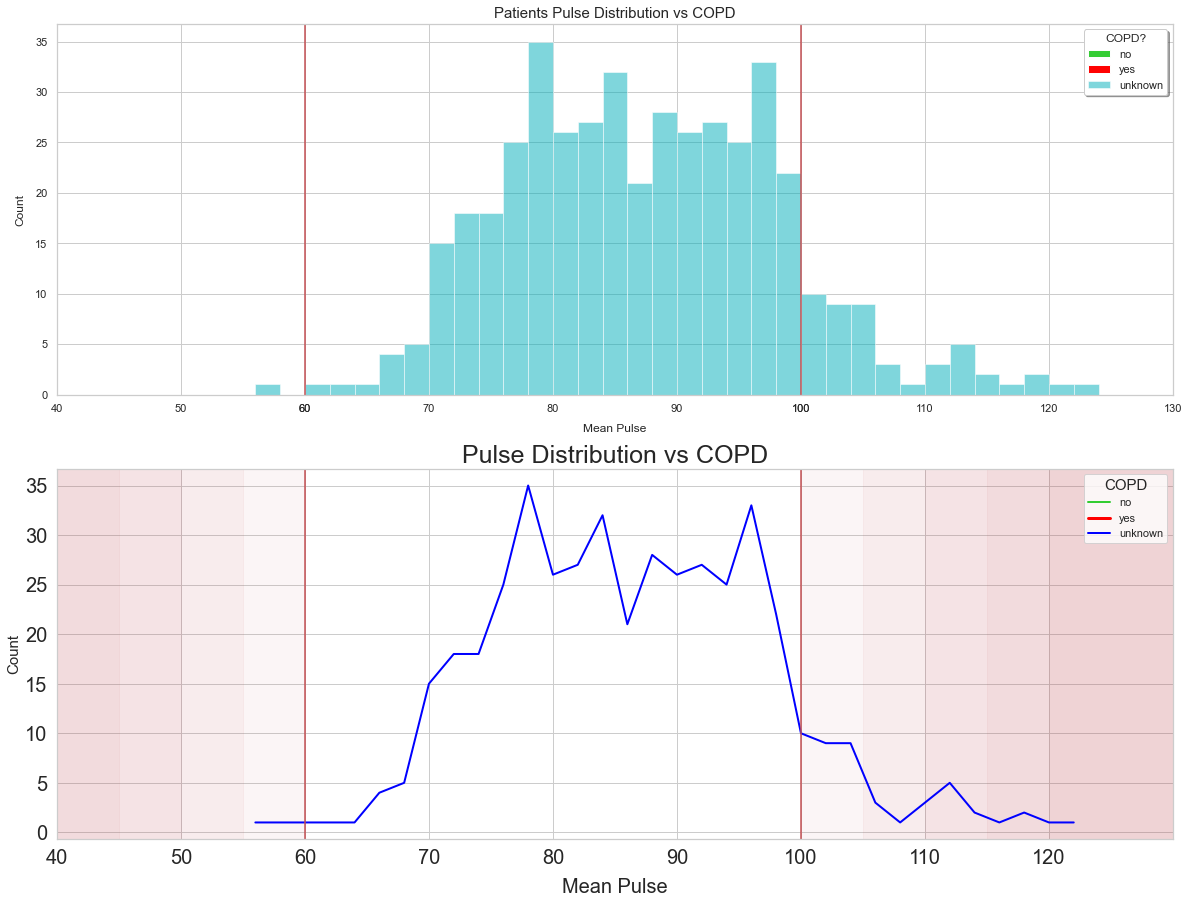

In [80]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.copd == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.copd == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.copd == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='COPD?', shadow=True)

plt.title('Patients Pulse Distribution vs COPD', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


#_______________________________second plot____________________________________
plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#----------------------------------------------------------
df['pulse'][df.copd == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.copd == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');

df['pulse'][df.copd == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='COPD', loc='upper right', title_fontsize=15)

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs COPD', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

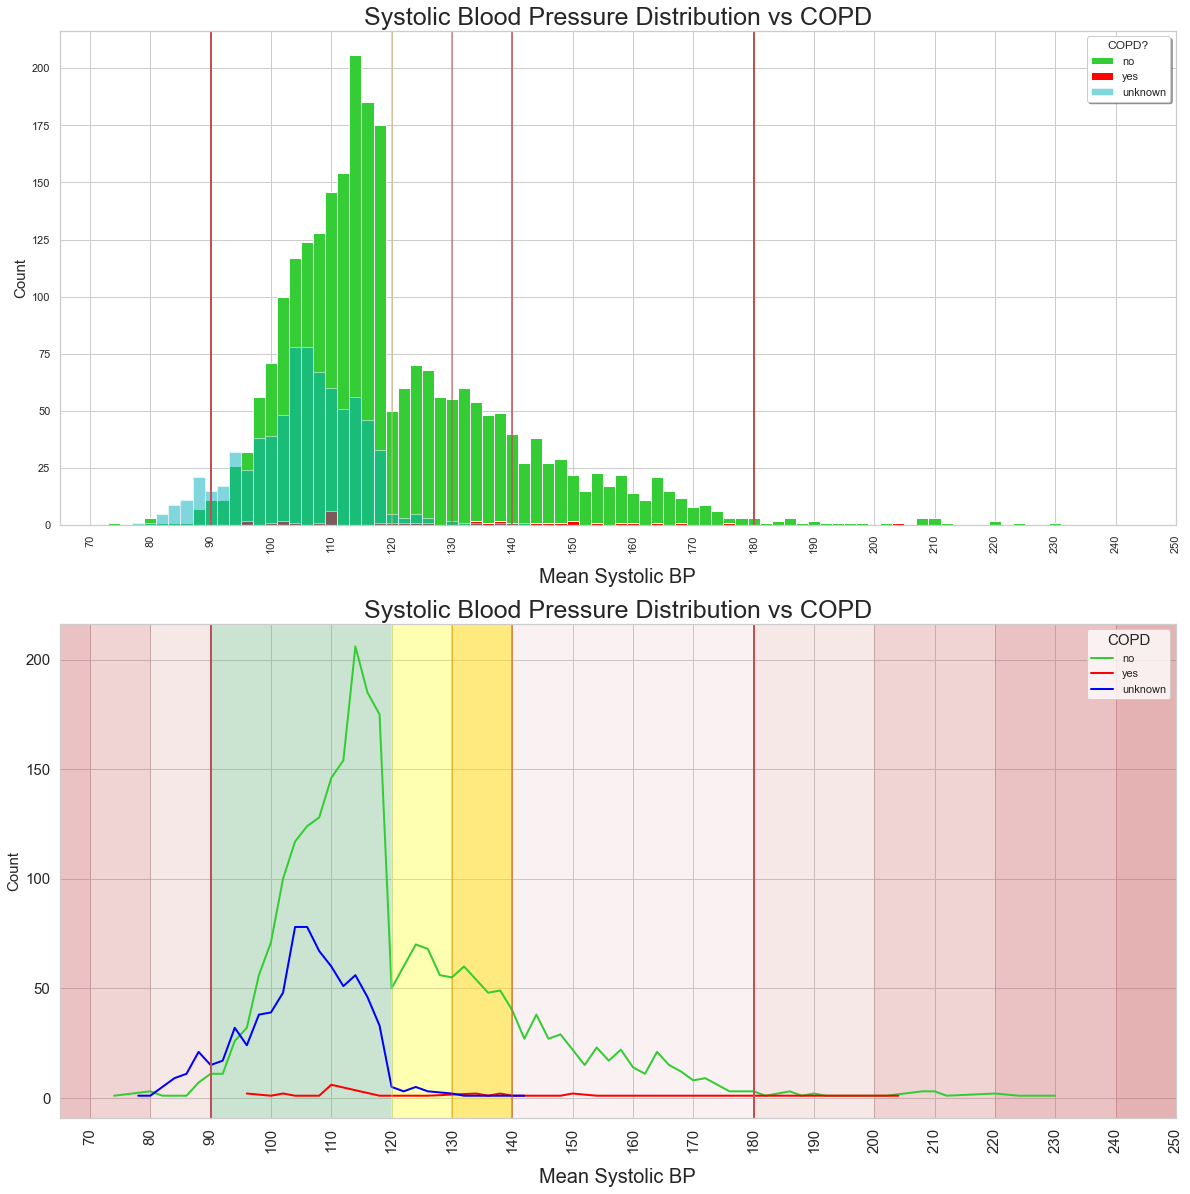

In [81]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.copd == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.copd == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.copd == 'unknown'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='COPD?', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs COPD', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);


#==================================second plot===============================
plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.copd == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.copd == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.copd == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='COPD', loc='upper right', title_fontsize=15)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs COPD', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

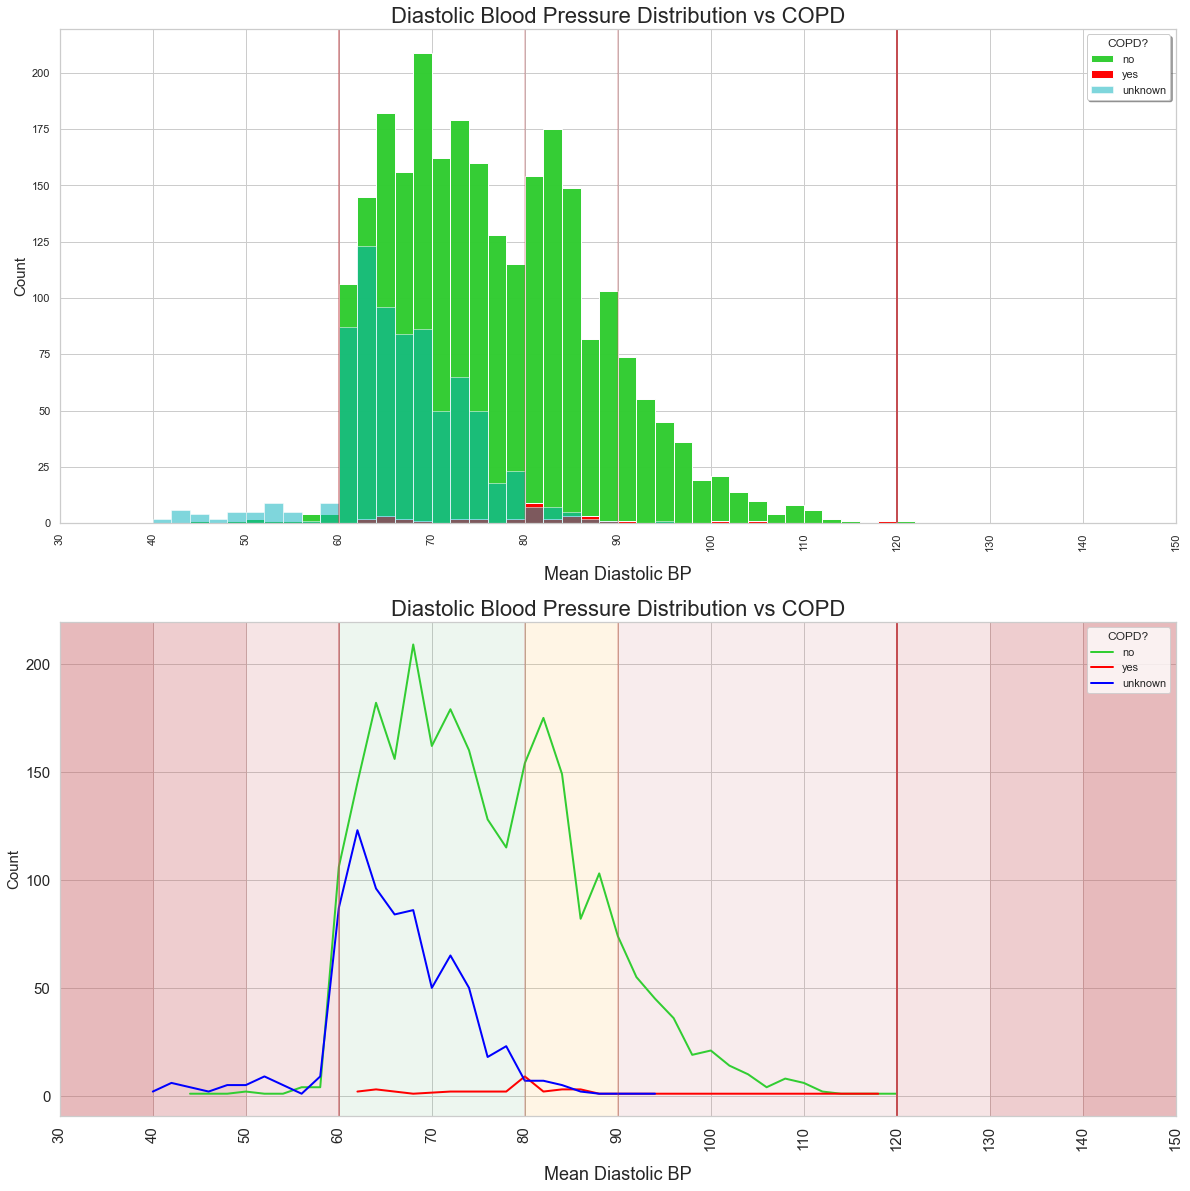

In [82]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.copd == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.copd == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.copd == 'unknown'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='COPD?', shadow=True)

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs COPD', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.copd == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.copd == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.copd == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');
plt.legend(['no','yes', 'unknown'], title='COPD?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs COPD', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

### cancer

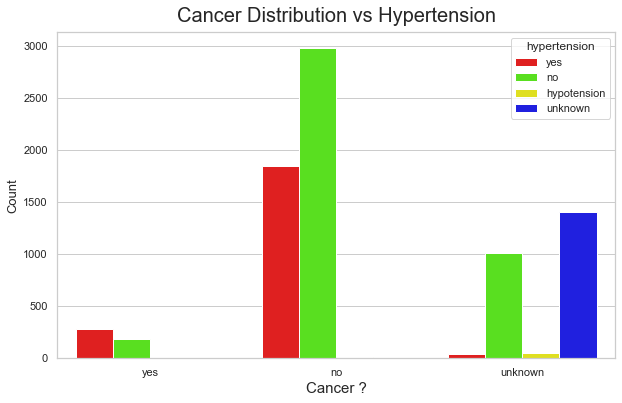

In [83]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='cancer', hue='hypertension', palette=[(1,0,0,.7), (.3,1,0,.99), 'yellow', 'blue']);

plt.title('Cancer Distribution vs Hypertension', fontsize= 20, pad=10)
plt.xlabel('Cancer ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

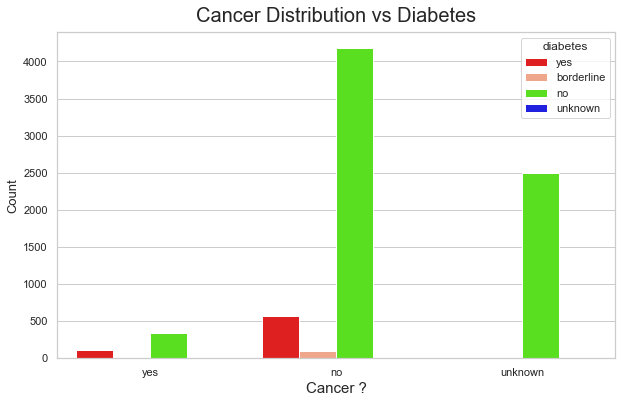

In [84]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='cancer', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('Cancer Distribution vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('Cancer ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

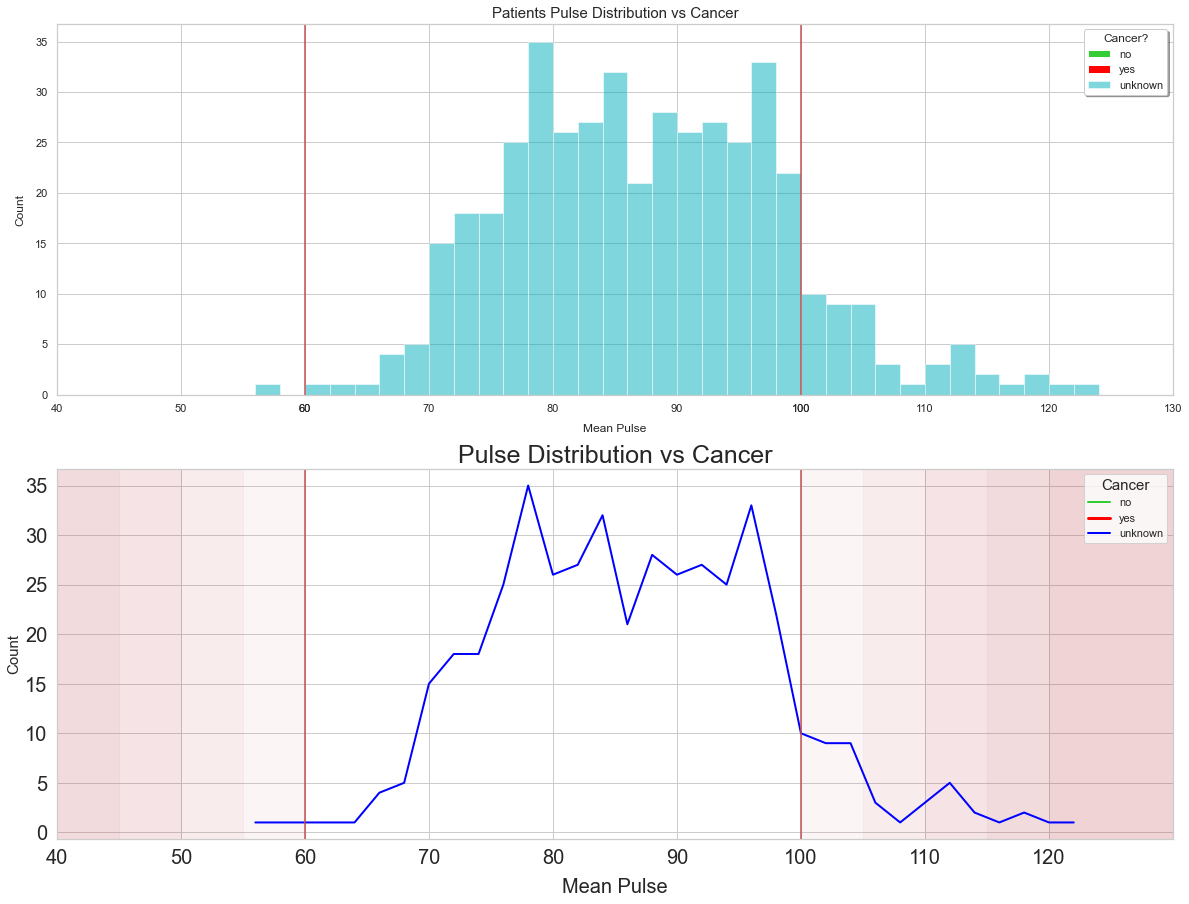

In [85]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.cancer == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cancer == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cancer == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Cancer?', shadow=True)

plt.title('Patients Pulse Distribution vs Cancer', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


#_______________________________second plot____________________________________
plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#----------------------------------------------------------
df['pulse'][df.cancer == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.cancer == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');

df['pulse'][df.cancer == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='Cancer', loc='upper right', title_fontsize=15)

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs Cancer', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

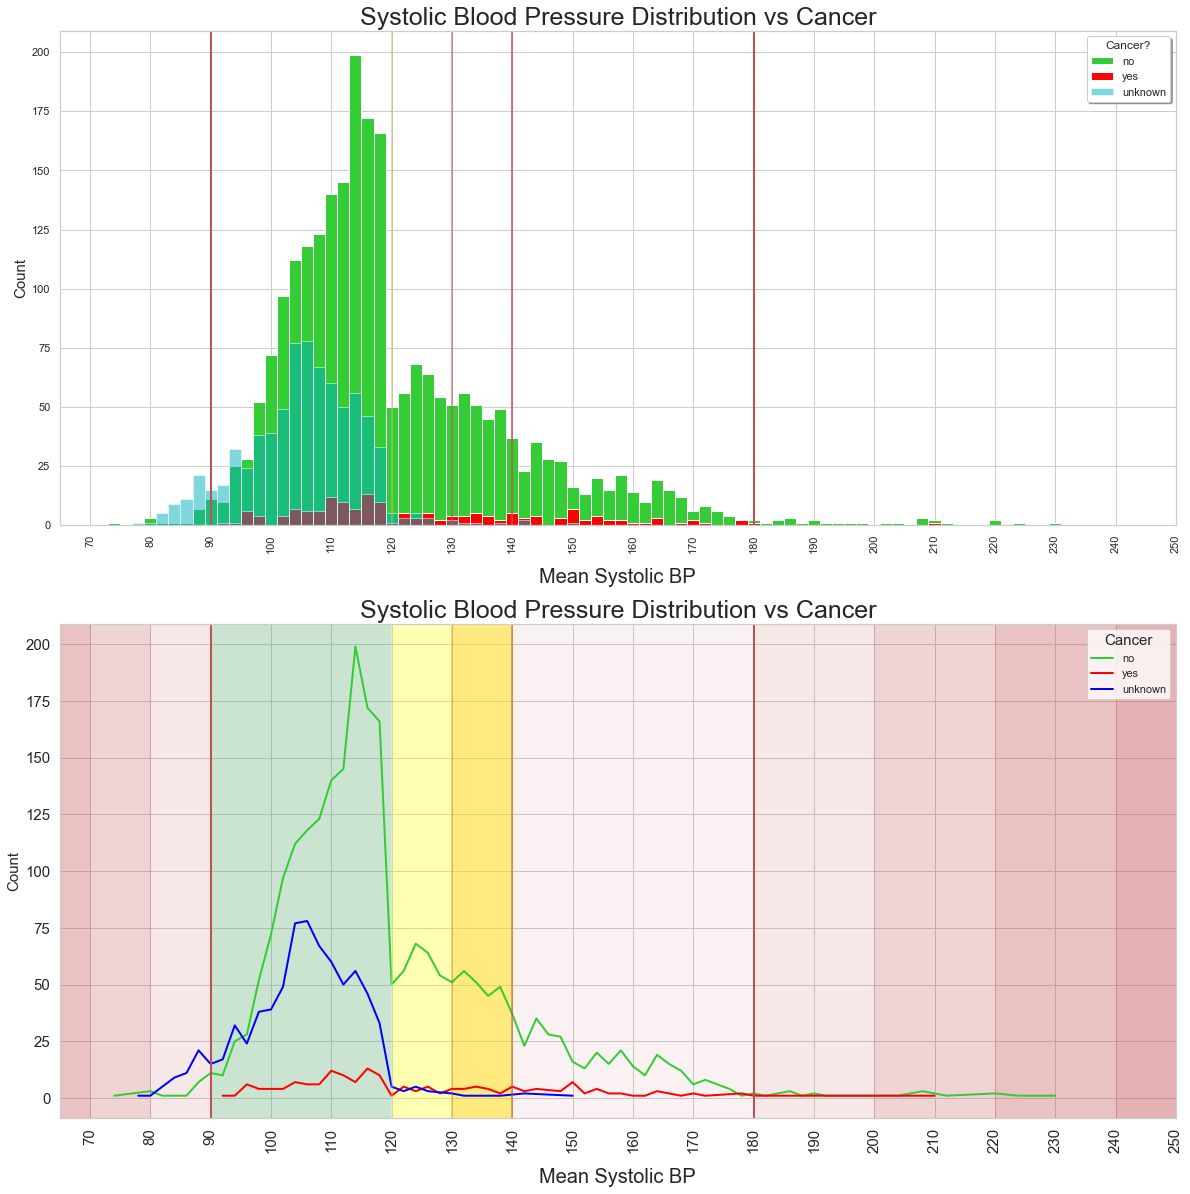

In [86]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________

bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.cancer == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cancer == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cancer == 'unknown'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Cancer?', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs Cancer', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);


#==================================second plot===============================
plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.cancer == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.cancer == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.cancer == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='Cancer', loc='upper right', title_fontsize=15)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs Cancer', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

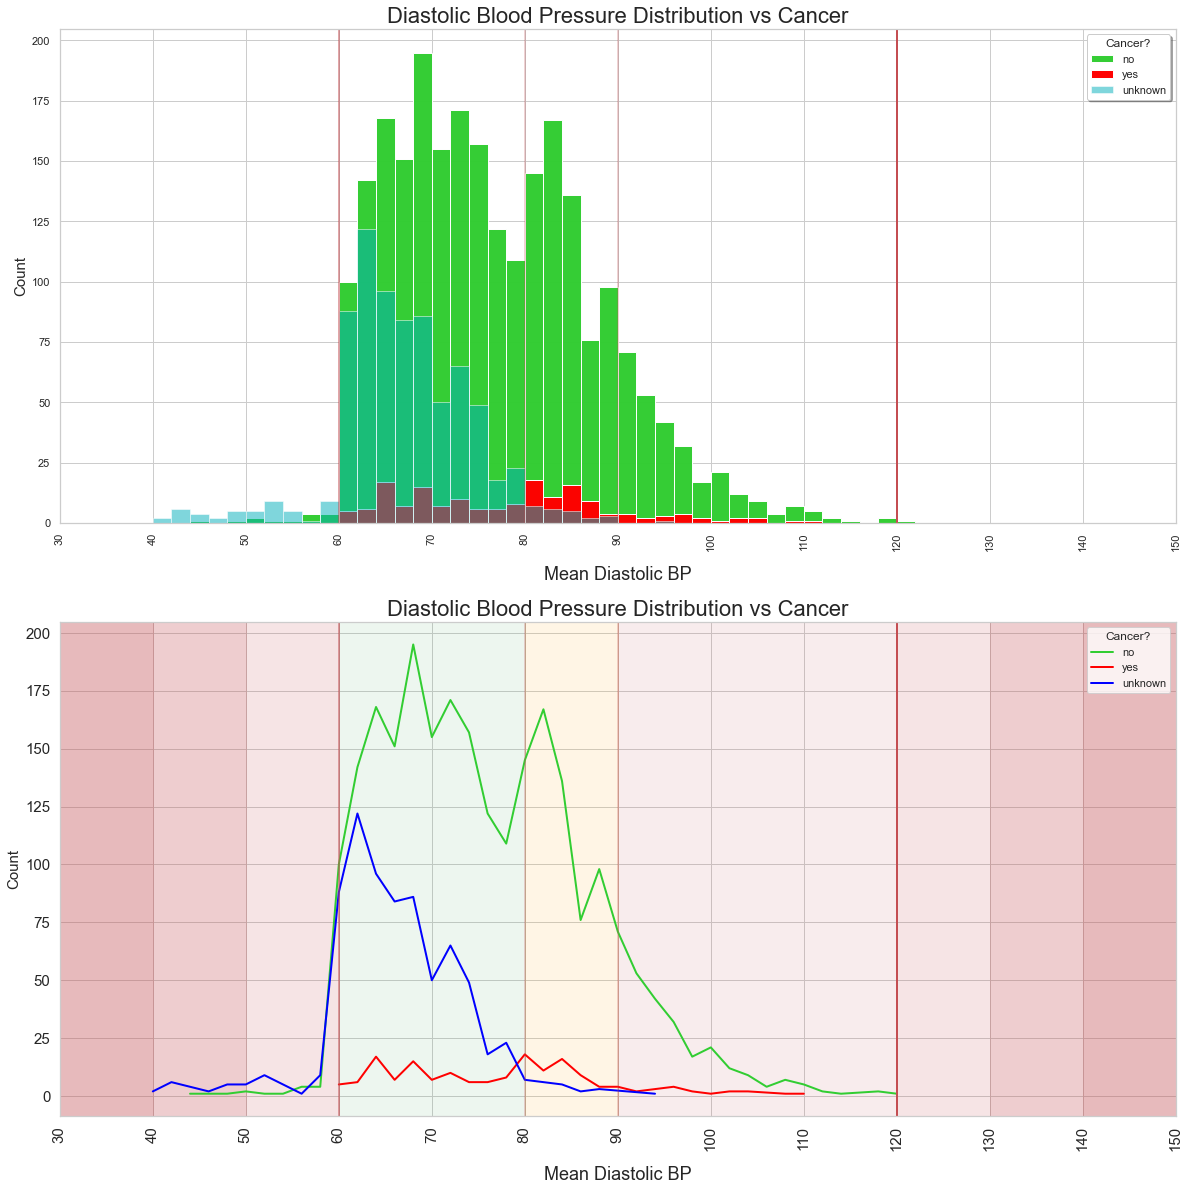

In [87]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.cancer == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.cancer == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.cancer == 'unknown'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Cancer?', shadow=True)

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs Cancer', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.cancer == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.cancer == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.cancer == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');
plt.legend(['no','yes', 'unknown'], title='Cancer?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs Cancer', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

### hypertension

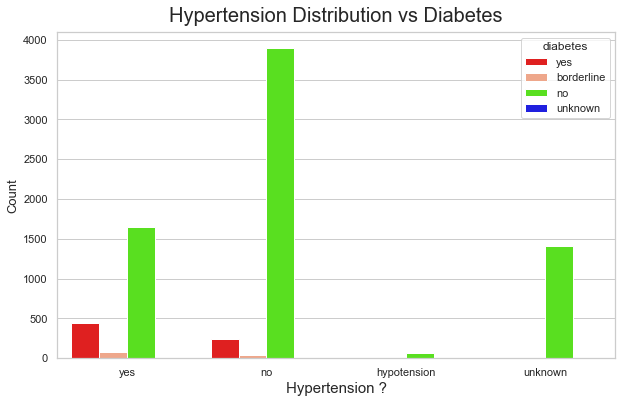

In [88]:
sb.set_theme(style='whitegrid')
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='hypertension', hue='diabetes', palette=[(1,0,0,.7), 'lightsalmon', (.3,1,0,.99), 'blue']);

plt.title('Hypertension Distribution vs Diabetes', fontsize= 20, pad=10)
plt.xlabel('Hypertension ?', fontsize= 15)
plt.ylabel('Count', fontsize= 13);

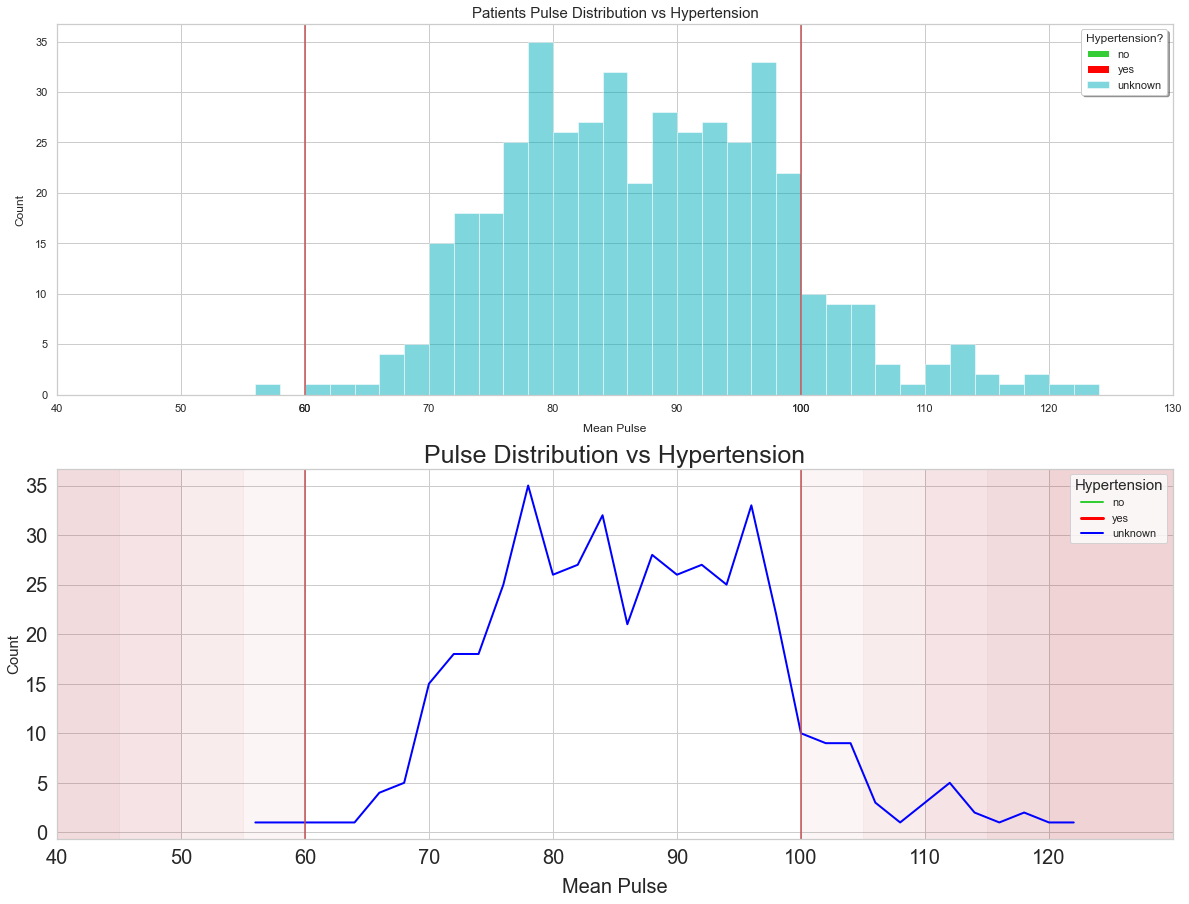

In [89]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(40, 130+2, 2)

plt.hist(data=df[df.hypertension == 'no'], x='pulse', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.hypertension == 'yes'], x='pulse', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.hypertension == 'unknown'], x='pulse', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'unknown'], loc='upper right', title='Hypertension?', shadow=True)

plt.title('Patients Pulse Distribution vs Hypertension', fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Mean Pulse', labelpad=10);
#plt.axvline(x=df.pulse.mean(), linestyle='--', linewidth=2, color='b')
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 140, 10)
ticks = list(ticks)
#ticks.append(df.pulse.mean())
ticks.append(60)
ticks.append(100)
ticks= [int(x) for x in ticks]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlim(40, 130);


#_______________________________second plot____________________________________
plt.subplot(2,1,2)
# ------------------------------------------board----------------------
_ls1 = [100, 105, 110, 115, 120, 130]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=130, color='r', alpha=.05)

_ls2 = [60, 55, 50, 45]
for i in _ls2:
    plt.axvspan(xmin=40,xmax=i, color='r', alpha=.05)

#----------------------------------------------------------
df['pulse'][df.hypertension == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=20, 
                                                                    color='limegreen');
df['pulse'][df.hypertension == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '3', fontsize=20,
                                                                color='red');

df['pulse'][df.hypertension == 'unknown'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=20,
                                                                color='blue');

plt.legend(['no','yes', 'unknown'], title='Hypertension', loc='upper right', title_fontsize=15)

plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=100, linestyle='-', linewidth=2, color='r', alpha=.75)

ticks = np.arange(40, 130, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Pulse Distribution vs Hypertension', fontsize= 25)
plt.xlabel('Mean Pulse', fontsize= 20, labelpad=10)
plt.ylabel('Count', fontsize= 15)

plt.xlim(40,130);

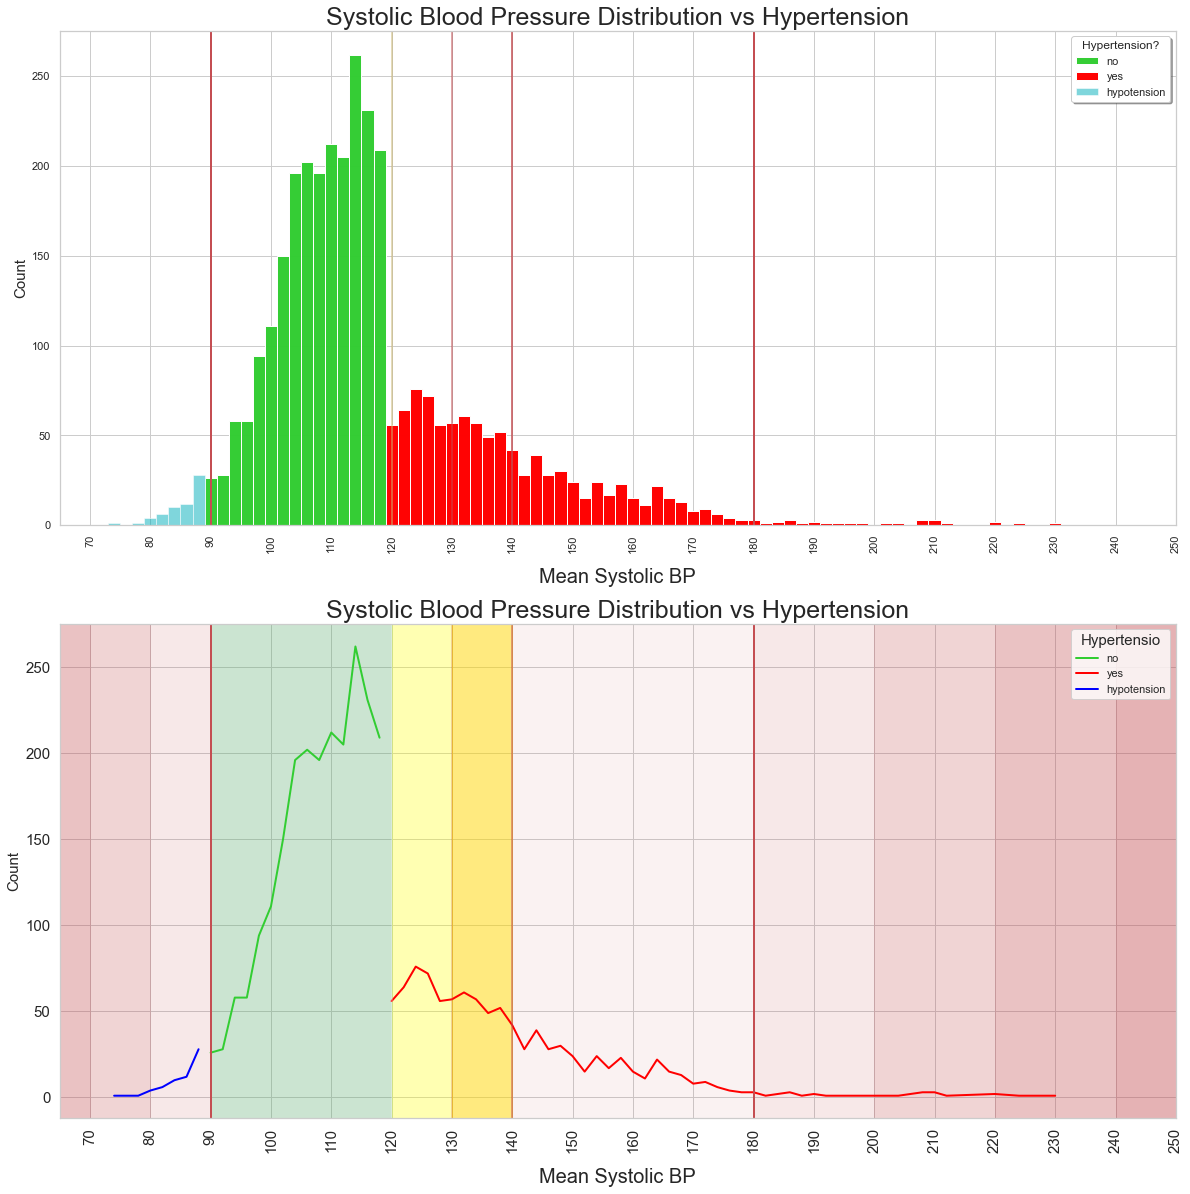

In [90]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
# ------------------------------------------board----------------------

#_______________________________first plot____________________________________
#plt.subplot(1,2,1)
bins = np.arange(65, 250+2, 2)

plt.hist(data=df[df.hypertension == 'no'], x='sys_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.hypertension == 'yes'], x='sys_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.hypertension == 'hypotension'], x='sys_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'hypotension'], loc='upper right', title='Hypertension?', shadow=True)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='y', alpha=.5)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.75)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs Hypertension', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(65, 250);


#==================================second plot===============================
plt.subplot(2,1,2)
#_______________________________board____________________________________
# green background
plt.axvspan(xmin=90,xmax=120, color='g', alpha=.3)

# red background
_ls1 = [180, 200, 220, 240]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=250, color='r', alpha=.13)

_ls2 = [90, 80, 70]
for i in _ls2:
    plt.axvspan(xmin=65,xmax=i, color='r', alpha=.13)

# yellow background
plt.axvspan(xmin=120,xmax=130, color='yellow', alpha=.3)

# orange background
plt.axvspan(xmin=130,xmax=140, color='gold', alpha=.5)

# red background
plt.axvspan(xmin=140,xmax=180, color='r', alpha=.07)

sb.set_theme(style='whitegrid')
#----------------------------------------------------------------------
df['sys_bp'][df.hypertension == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['sys_bp'][df.hypertension == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');

df['sys_bp'][df.hypertension == 'hypotension'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');

plt.legend(['no','yes', 'hypotension'], title='Hypertensio', loc='upper right', title_fontsize=15)

plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=120, linestyle='-', linewidth=2, color='w', alpha=.25)
plt.axvline(x=130, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=140, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=180, linestyle='-', linewidth=2, color='r', alpha=1)

ticks = np.arange(60, 260, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Systolic Blood Pressure Distribution vs Hypertension', fontsize= 25)
plt.xlabel('Mean Systolic BP', fontsize= 20, labelpad=15)
plt.ylabel('Count', fontsize= 15)

plt.xlim(65, 250);

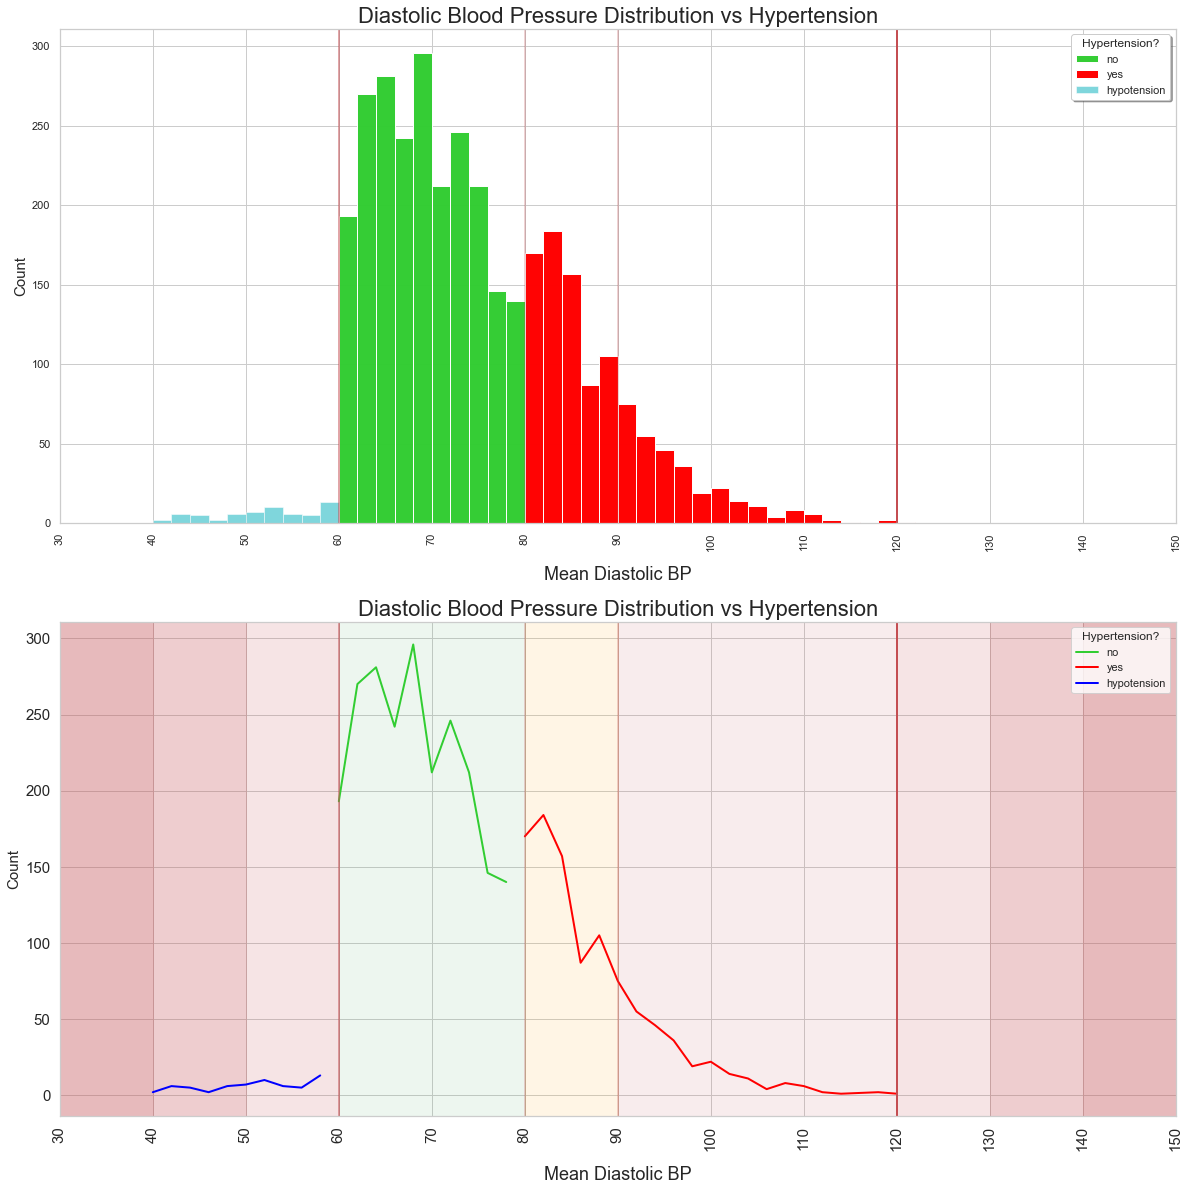

In [91]:
plt.figure(figsize=[20,20])
sb.set_theme(style='whitegrid')

#_______________________________first plot____________________________________
plt.subplot(2,1,1)
# ------------------------------------------board----------------------
#___________________________________________________________________
bins = np.arange(30, 150+2, 2)

plt.hist(data=df[df.hypertension == 'no'], x='dia_bp', bins= bins, color='limegreen', alpha=.99);
plt.hist(data=df[df.hypertension == 'yes'], x='dia_bp', bins= bins, color='red', alpha=.99);
plt.hist(data=df[df.hypertension == 'hypotension'], x='dia_bp', bins= bins, color="#00AFBB", alpha=.5);
plt.legend(['no', 'yes', 'hypotension'], loc='upper right', title='Hypertension?', shadow=True)

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs Hypertension', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

#_______________________________second plot____________________________________
plt.subplot(2,1,2)
#_______________________________board____________________________________
plt.axvspan(xmin=60,xmax=80, color='g', alpha=.1)
plt.axvspan(xmin=80,xmax=90, color='orange', alpha=.1)
plt.axvspan(xmin=90,xmax=120, color='r', alpha=.1)

_ls1 = [120, 130, 140]
for i in _ls1:
    plt.axvspan(xmin=i,xmax=150, color='r', alpha=.15)

_ls2 = [60, 50, 40]
for i in _ls2:
    plt.axvspan(xmin=30,xmax=i, color='r', alpha=.15)
#----------------------------------------------------------------------

df['dia_bp'][df.hypertension == 'no'].value_counts().sort_index().plot(kind='line', 
                                                                    linewidth = '2', fontsize=15, 
                                                                    color='limegreen');
df['dia_bp'][df.hypertension == 'yes'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='red');
df['dia_bp'][df.hypertension == 'hypotension'].value_counts().sort_index().plot(kind='line',
                                                                  linewidth = '2', fontsize=15,
                                                                color='blue');
plt.legend(['no','yes', 'hypotension'], title='Hypertension?', loc='upper right')

plt.axvline(x=120, linestyle='-', linewidth=2, color='r', alpha=1)
plt.axvline(x=60, linestyle='-', linewidth=2, color='r', alpha=.5)
plt.axvline(x=80, linestyle='-', linewidth=2, color='r', alpha=.25)
plt.axvline(x=90, linestyle='-', linewidth=2, color='r', alpha=.25)

ticks = np.arange(30, 160, 10)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Diastolic Blood Pressure Distribution vs Hypertension', fontsize= 22)
plt.xlabel('Mean Diastolic BP', fontsize= 18, labelpad=15)
plt.ylabel('Count', fontsize= 15)
plt.xlim(30, 150);

### pulse, sys_bp, dia_bp

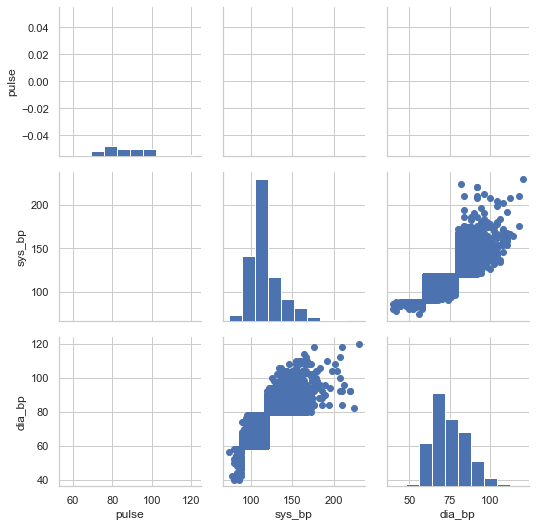

In [92]:
diseases_features = ['pulse', 'sys_bp', 'dia_bp']
g = sb.PairGrid(data=df, vars=diseases_features)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

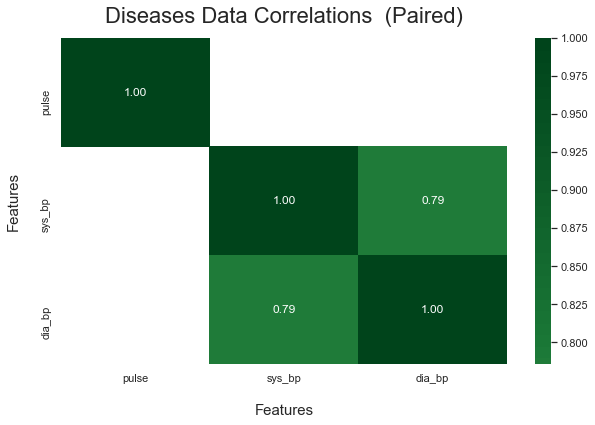

In [93]:
diseases_features = ['pulse', 'sys_bp', 'dia_bp']
correlations = df[diseases_features].corr()

plt.figure(figsize= [10,6])
sb.heatmap(correlations, cmap='PRGn', annot=True, fmt='.2f', center = 0)

plt.title('Diseases Data Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('Features', fontsize= 15, labelpad=20)
plt.ylabel('Features', fontsize= 15, labelpad=20);

## 3- Multivariate Diseases Analytics:

### chf, mi, cad

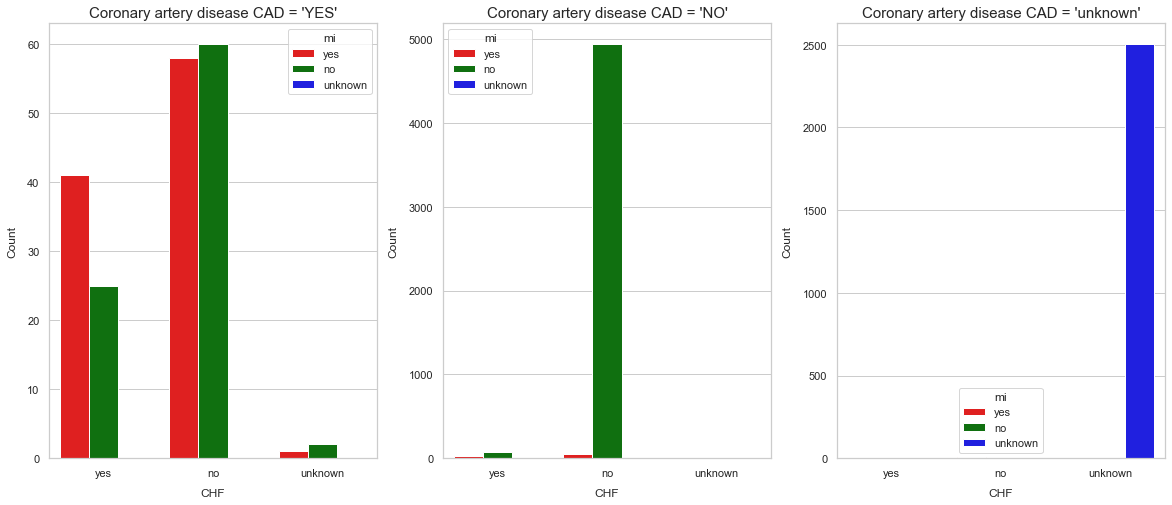

In [94]:
plt.figure(figsize=[20, 8])
sb.set_theme(style='whitegrid')

plt.subplot(1,3,1)
sb.countplot(data=df[(df.cad == 'yes')], x='chf', order=['yes', 'no', 'unknown'], 
             hue='mi', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Coronary artery disease CAD = 'YES'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('CHF', labelpad=10);

# --------------------------------------------------
plt.subplot(1,3,2)
sb.countplot(data=df[(df.cad == 'no')], x='chf', order=['yes', 'no', 'unknown'], 
             hue='mi', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Coronary artery disease CAD = 'NO'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('CHF', labelpad=10);

# --------------------------------------------------
plt.subplot(1,3,3)
sb.countplot(data=df[(df.cad == 'unknown')], x='chf', order=['yes', 'no', 'unknown'], 
             hue='mi', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Coronary artery disease CAD = 'unknown'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('CHF', labelpad=10);

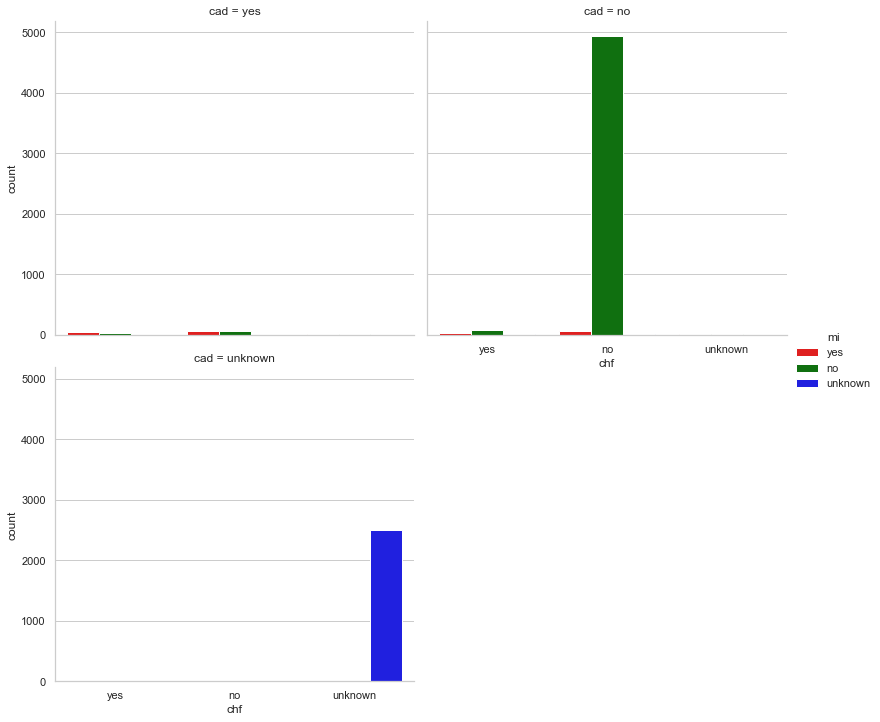

In [95]:
g = sb.catplot(data=df, x="chf", hue="mi", col="cad", col_wrap=2,kind="count",
                height=5, aspect=1.1, palette=['red', 'green', 'blue'])

g.set_xticklabels(rotation=0);

### asthma, copd'emphysema', cancer

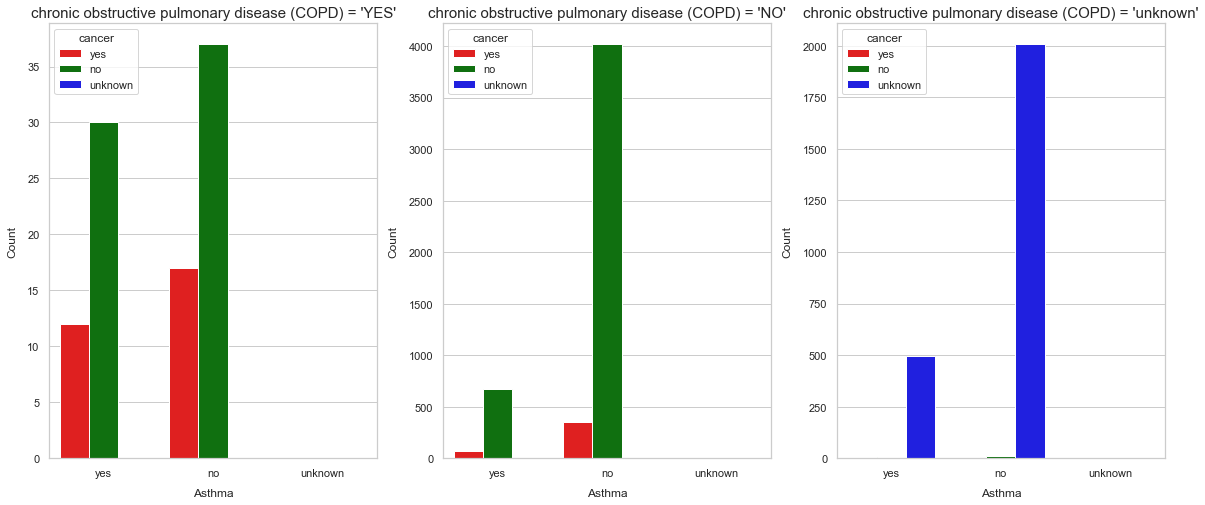

In [96]:
plt.figure(figsize=[20, 8])
sb.set_theme(style='whitegrid')

plt.subplot(1,3,1)
sb.countplot(data=df[(df.copd == 'yes')], x='asthma', order=['yes', 'no', 'unknown'], 
             hue='cancer', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("chronic obstructive pulmonary disease (COPD) = 'YES'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Asthma', labelpad=10);

# --------------------------------------------------
plt.subplot(1,3,2)
sb.countplot(data=df[(df.cad == 'no')], x='asthma', order=['yes', 'no', 'unknown'], 
             hue='cancer', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("chronic obstructive pulmonary disease (COPD) = 'NO'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Asthma', labelpad=10);

# --------------------------------------------------
plt.subplot(1,3,3)
sb.countplot(data=df[(df.cad == 'unknown')], x='asthma', order=['yes', 'no', 'unknown'], 
             hue='cancer', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("chronic obstructive pulmonary disease (COPD) = 'unknown'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Asthma', labelpad=10);

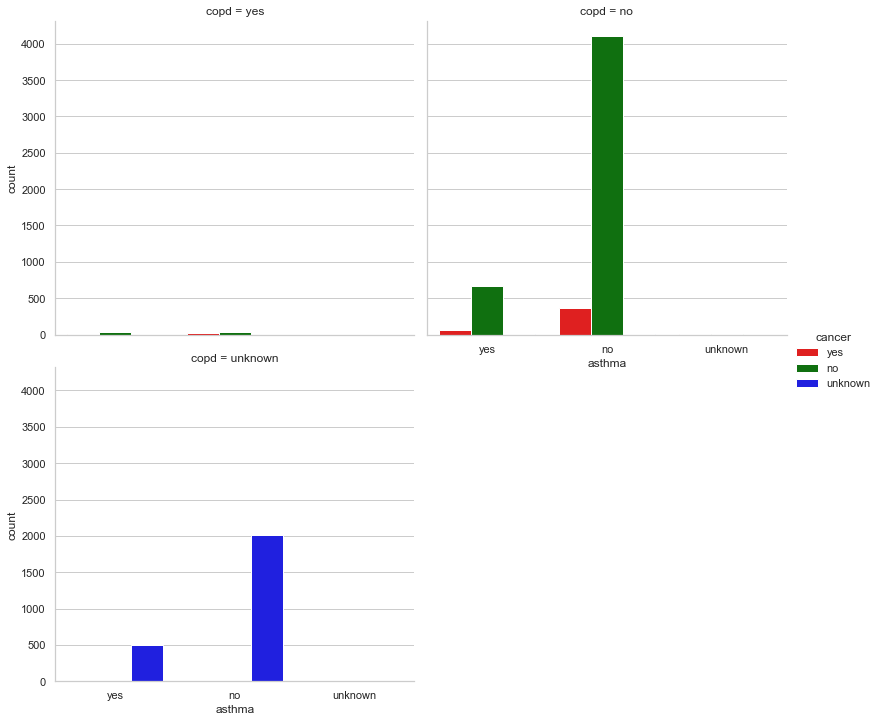

In [97]:
g = sb.catplot(data=df, x="asthma", hue="cancer", col="copd", col_wrap=2,kind="count",
                height=5, aspect=1.1, palette=['red', 'green', 'blue'])

g.set_xticklabels(rotation=0);

### strok(cva), hypertension, diabetes

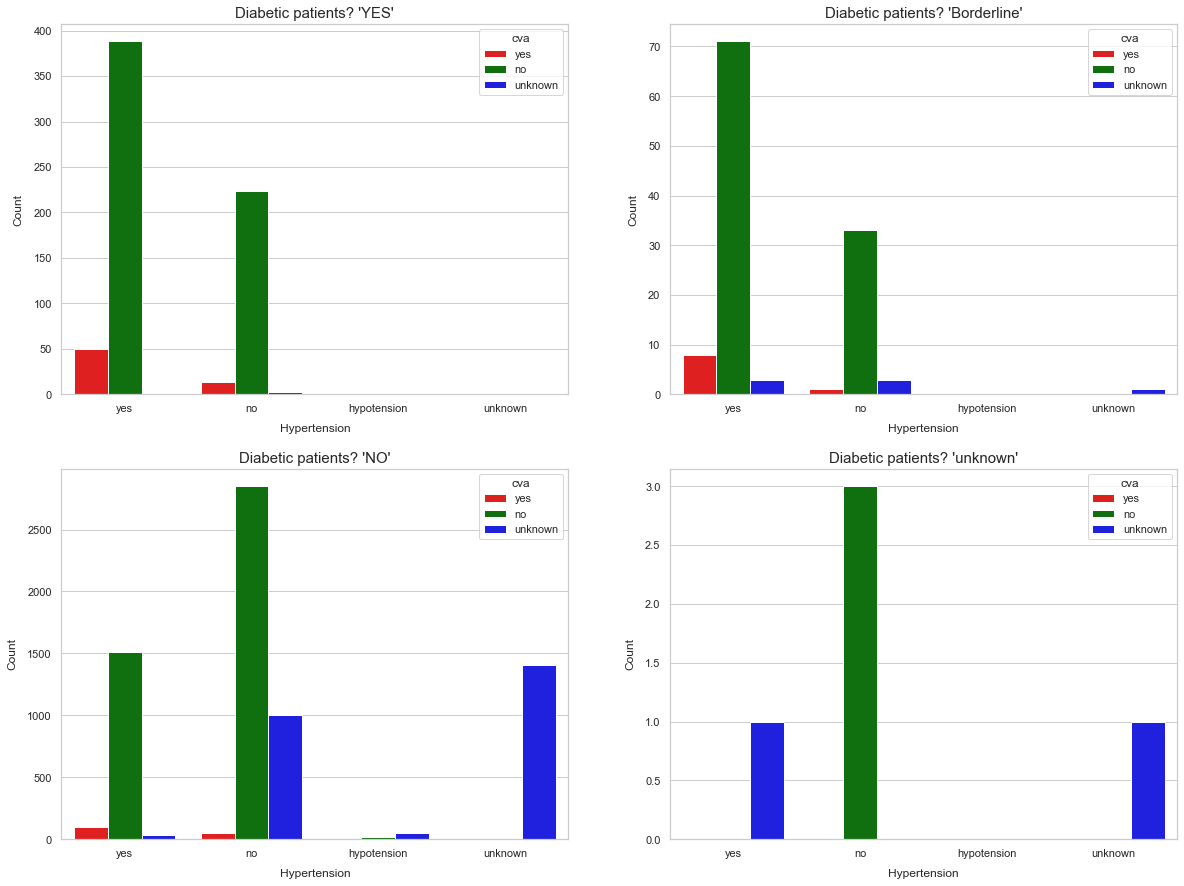

In [98]:
plt.figure(figsize=[20, 15])
sb.set_theme(style='whitegrid')

plt.subplot(2,2,1)
sb.countplot(data=df[(df.diabetes == 'yes')], x='hypertension', order=['yes', 'no', 'hypotension', 'unknown'], 
             hue='cva', palette=['red', 'green', 'blue'])
plt.legend(loc='upper right', title='cva')
plt.xticks(rotation=0)
plt.title("Diabetic patients? 'YES'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Hypertension', labelpad=10);

# --------------------------------------------------
plt.subplot(2,2,2)
sb.countplot(data=df[(df.diabetes == 'borderline')], x='hypertension', order=['yes', 'no', 'hypotension', 'unknown'], 
             hue='cva', palette=['red', 'green', 'blue'])
plt.legend(loc='upper right', title='cva')
plt.xticks(rotation=0)
plt.title("Diabetic patients? 'Borderline'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Hypertension', labelpad=10);

# --------------------------------------------------
plt.subplot(2,2,3)
sb.countplot(data=df[(df.diabetes == 'no')], x='hypertension', order=['yes', 'no', 'hypotension', 'unknown'], 
             hue='cva', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Diabetic patients? 'NO'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Hypertension', labelpad=10);

# --------------------------------------------------
plt.subplot(2,2,4)
sb.countplot(data=df[(df.diabetes == 'unknown')], x='hypertension', order=['yes', 'no', 'hypotension', 'unknown'], 
             hue='cva', palette=['red', 'green', 'blue'])

plt.xticks(rotation=0)
plt.title("Diabetic patients? 'unknown'", fontsize= 15)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Hypertension', labelpad=10);

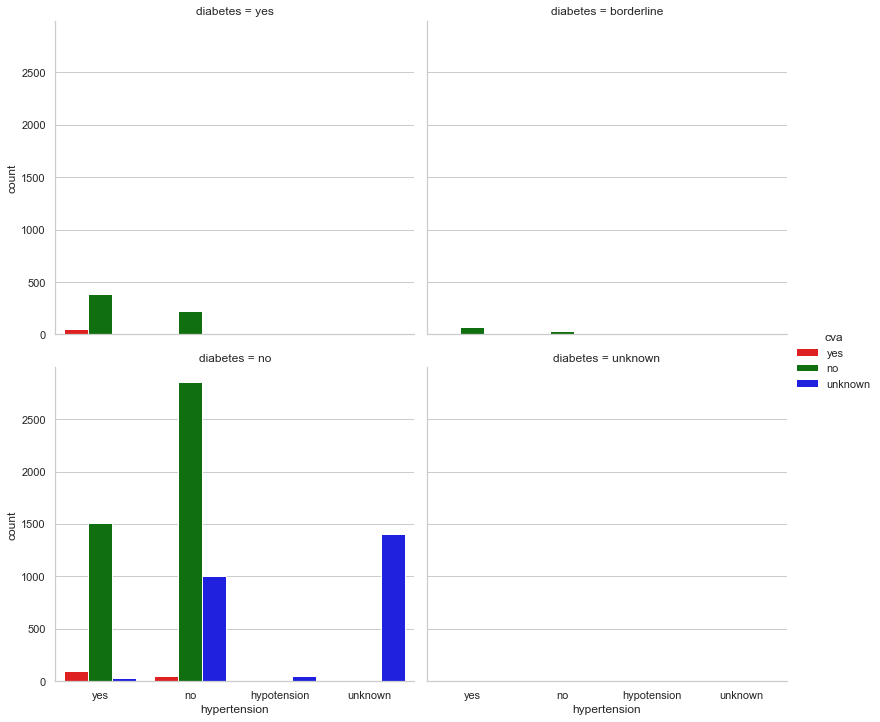

In [99]:
g = sb.catplot(data=df, x="hypertension", hue="cva", col="diabetes", col_wrap=2,kind="count",
                height=5, aspect=1.1, palette=['red', 'green', 'blue'])

g.set_xticklabels(rotation=0);